In [ ]:
!tar chvfz picoPI04_RC.tar.gz ../resource/asnlib/public/* *.ipynb
# in Vocareum: run only this Cell (in Python 3 Kernel) 
# after unzipping and running locally: Change Kernel to SoS

In [1]:
%use micropython
%serialconnect to --port="COM3" 
#ADD COM PORT ABOVE, e.g. --port="COM3"

Connecting to --port=COM3 --baud=115200 
Ready.


In [2]:
%use micropython
import nb2211
from machine import ADC,Pin
import utime
import time
#function that makes the buzzer beep
def buzz(x):
    buzzer = Pin(14, Pin.OUT)
    if x == 0:
        pass
    else:
        buzzer.value(0)
        time.sleep(x)
        buzzer.value(1)
        time.sleep(x)
        buzzer.value(0) 
#function that produces a countdown to give us a warning that the next measurement is about to start so we can change the setup quickly
def countdown():
    time.sleep(0.05)
    buzz(0.05)
    time.sleep(0.05)
    buzz(0.05)
    time.sleep(0.05)
    buzz(0.05)
    time.sleep(0.05)
    buzz(0.05)
    buzz(0.05)

In [16]:
%ls

Listing directory '/'.
        0    general_data.txt


In [17]:
import os
for file in os.listdir():
    os.remove('general_data.txt')

In [12]:
%use micropython
#importing all libraries that we use in this cell
import nb2211
from machine import ADC,Pin
import utime
import gc

gc.collect()
#initializing all the pins that have been connected to various components of our circuit
analog_in = ADC(Pin(26))
analog_in1=ADC(Pin(27))
RED = Pin(15, Pin.OUT) #Dout1
GREEN = Pin(16, Pin.OUT)#Dout2
BLUE = Pin(17, Pin.OUT)  #Dout3

pico = nb2211.Pico()
measurements= 1500 # with utime.sleep(0.01) you know how long it lasts
#initializing our lists
reading = []
tt=[]
Temp = []
t = []

start= utime.ticks_ms()
#for loop that switches on different colors of lights based on the measurement number.
#due to memory allocation problems we took the first 100 data points for red, a 100 more for green and around 99 for blue
#we also measure the time and temperature here.
#instead of storing the values of all of these measurements, we had to run and rerun this code and store the output in separate lists in python, once again due to the memory allocation error in micropython
#due to this, we thought it would be effective to instead manually redo the measurements for each solution and store the signal measurements for different solutions in lists readings1, readings2, readings3 and readings4
#we also thought that since we are reunning the cell multiple times, we do not need to rerun temperature and time readings multiple times so we also stored those values after the first run.
for i in range(measurements):
    if i==0:       
        RED.value(0.1)
        countdown()
    elif i==100:   
        RED.value(0)
    elif i==150:  
        GREEN.value(0.05)
        countdown()
    elif i==250:   
        GREEN.value(0)
    elif i==300:  
        BLUE.value(0.03)
        countdown()
    elif i==399: 
        BLUE.value(0)
    reading.append(analog_in.read_u16()*3.3/65535)
    tt.append(utime.ticks_ms()-start)
    readinga1 = analog_in1.read_u16()*3.3/65535
    reading_temp=readinga1/0.01
    Temp.append(reading_temp)
    #print(tt[-1],reading[-1]) # comment on/off if you want to display during the measurement
    utime.sleep(0.01)
print(reading)
# print(Temp)
print(tt)
buzz(1)
# pico.store_data("general_data.txt", parameters = None, samples = [reading,Temp,tt])
# pico.store_data("Temperature_data.txt", parameters = None, samples = [Temp,tt])
utime.sleep(1)

print("Measurent is done!")



...[1.06455, 1.049242, 1.065356, 1.045214, 1.073413, 1.065356, 1.074218, 1.083081, 1.042797, 1.047631, 1.065356, 1.054076, 1.059716, 1.066162, 1.067773, 1.037963, 1.06455, 1.055688, 1.038769, 1.057299, 1.057299, 1.063745, 1.083081, 1.077441, 1.052465, 1.053271, 1.076635, 1.083081, 1.061328, 1.053271, 1.06455, 1.043603, 1.043603, 1.043603, 1.04038, 1.054076, 1.06455, 1.063745, 1.059716, 1.048437, 1.071801, 1.071801, 1.096777, 1.062133, 1.042797, 1.037963, 1.060522, 1.039574, 1.058105, 1.049242, 1.073413, 1.044408, 1.065356, 1.044408, 1.059716, 1.073413, 1.071801, 1.06455, 1.068579, 1.063745, 1.057299, 1.073413, 1.051659, 1.044408, 1.054882, 1.091943, 1.073413, 1.055688, 1.073413, 1.087915, 1.070996, 1.068579, 1.052465, 1.031518, 1.073413, 1.092749, 1.060522, 1.085498, 1.073413, 1.068579, 1.04602, 1.058105, 1.029856, 1.072607, 1.055688, 1.039574, 1.050854, 1.046825, 1.070996, 1.054882, 1.068579, 1.066967, 1.074218, 1.062133, 1.07583, 1.070996, 1.054882, 1.061328, 1.058105, 1.059716, 0.06

[]
.Measurent is done!


In [19]:
reading1 = [0.2506157, 0.2667292, 0.1579126, 0.166775, 0.1611353, 0.2796201, 0.1264912, 0.1804715, 0.1587182, 0.1466331, 0.1724148, 0.1587182, 0.1401877, 0.1595239, 0.1675807, 0.1708034, 0.1635523, 0.1740261, 0.1208515, 0.1554955, 0.1724148, 0.08056764, 0.1949737, 0.2336965, 0.1828885, 0.1708034, 0.1901396, 0.1272969, 0.2385305, 0.2715633, 0.2272511, 0.1401877, 0.2393362, 0.1571069, 0.1659693, 0.2667292, 0.1901396, 0.07331655, 0.1619409, 0.1683864, 0.1514671, 0.2353078, 0.169192, 0.2127489, 0.1329366, 0.1377707, 0.1675807, 0.2707576, 0.1498558, 0.1571069, 0.1772488, 0.169192, 0.1305196, 0.1619409, 0.1490501, 0.1869169, 0.1595239, 0.1869169, 0.1699977, 0.1563012, 0.1836942, 0.1619409, 0.1716091, 0.1619409, 0.1764431, 0.1563012, 0.1683864, 0.1675807, 0.1554955, 0.1724148, 0.1764431, 0.1812772, 0.196585, 0.1619409, 0.1426047, 0.169192, 0.1240741, 0.1740261, 0.1563012, 0.2103319, 0.1426047, 0.1716091, 0.1514671, 0.1756374, 0.07573357, 0.2063035, 0.1635523, 0.1764431, 0.1434104, 0.2030304, 0.109572, 0.1764431, 0.1627466, 0.1740261, 0.1498558, 0.139382, 0.1546898, 0.1361593, 0.1611353, 0.1820828, 0.07573357, 0.08459601, 0.1055436, 0.0886244, 0.08540169, 0.08459601, 0.07573357, 0.08056764, 0.07412223, 0.1587182, 0.08137331, 0.08620738, 0.07089952, 0.07251087, 0.08217898, 0.06928816, 0.08540169, 0.07734492, 0.08137331, 0.07331655, 0.08137331, 0.08137331, 0.09023576, 0.08056764, 0.08540169, 0.07976195, 0.07976195, 0.07089952, 0.08620738, 0.08701304, 0.08701304, 0.08540169, 0.06767681, 0.07412223, 0.07573357, 0.09023576, 0.07089952, 0.0886244, 0.07976195, 0.08379034, 0.07331655, 0.08540169, 0.08701304, 0.07573357, 0.09023576, 0.07573357, 0.1256855, 0.0886244, 0.09345845, 0.07573357, 0.222417, 0.08620738, 0.2038361, 0.1740261, 0.1844999, 0.1554955, 0.2320852, 0.1627466, 0.277203, 0.1885283, 0.2538384, 0.1764431, 0.1949737, 0.08217898, 0.196585, 0.169192, 0.2071092, 0.2022248, 0.2071092, 0.1981964, 0.2183887, 0.2361135, 0.2393362, 0.1901396, 0.1708034, 0.3062074, 0.1820828, 0.2949279, 0.1256855, 0.2030304, 0.2691463, 0.1973907, 0.2151659, 0.2530327, 0.1949737, 0.196585, 0.2796201, 0.1925566, 0.194168, 0.2280568, 0.1957793, 0.1788601, 0.2143603, 0.164358, 0.2111376, 0.2030304, 0.2063035, 0.2095262, 0.2030304, 0.194168, 0.2353078, 0.2336965, 0.1853056, 0.1998077, 0.169192, 0.1981964, 0.2087205, 0.2167773, 0.2167773, 0.191751, 0.1869169, 0.1990021, 0.191751, 0.191751, 0.1981964, 0.1772488, 0.2167773, 0.1812772, 0.1861112, 0.2046418, 0.1909453, 0.1635523, 0.2135546, 0.2465873, 0.1772488, 0.196585, 0.191751, 0.2135546, 0.1836942, 0.2385305, 0.191751, 0.2345022, 0.1836942, 0.1957793, 0.1498558, 0.2683406, 0.1732204, 0.2296681, 0.1619409, 0.2345022, 0.1981964, 0.2119432, 0.1820828, 0.2272511, 0.1804715, 0.2272511, 0.1981964, 0.1828885, 0.169192, 0.1949737, 0.08217898, 0.08540169, 0.08056764, 0.08056764, 0.08620738, 0.07976195, 0.0749279, 0.0886244, 0.08620738, 0.08540169, 0.08217898, 0.07976195, 0.0886244, 0.07976195, 0.08620738, 0.08459601, 0.06928816, 0.08217898, 0.08056764, 0.07976195, 0.08379034, 0.07976195, 0.107155, 0.08137331, 0.08217898, 0.08701304, 0.07573357, 0.07573357, 0.08781872, 0.0886244, 0.09104142, 0.08056764, 0.07170519, 0.07815061, 0.09668117, 0.07573357, 0.09345845, 0.08540169, 0.08943007, 0.08540169, 0.08137331, 0.09345845, 0.07734492, 0.08379034, 0.09104142, 0.05881437, 0.09345845, 0.1168231, 0.09345845, 0.07976195, 0.2683406, 0.1289082, 0.2425589, 0.2216114, 0.1949737, 0.3505195, 0.2433646, 0.2095262, 0.2345022, 0.3424628, 0.3247379, 0.191751, 0.2441703, 0.2264454, 0.2659235, 0.2457816, 0.274786, 0.1538842, 0.2949279, 0.2844541, 0.2208057, 0.2530327, 0.2683406, 0.24981, 0.307013, 0.1281025, 0.2071092, 0.2401419, 0.3432685, 0.2538384, 0.2433646, 0.1361593, 0.2385305, 0.2264454, 0.2643122, 0.2393362, 0.2465873, 0.2538384, 0.2586725, 0.1949737, 0.2643122, 0.2707576, 0.2546441, 0.2151659, 0.2167773, 0.2425589, 0.2353078, 0.2280568, 0.2594781, 0.2731746, 0.2610895, 0.2361135, 0.247393, 0.2490043, 0.2320852, 0.2103319, 0.244976, 0.2691463, 0.2304738, 0.2586725, 0.2546441, 0.2417533, 0.2361135, 0.22, 0.217583, 0.252227, 0.2417533, 0.247393, 0.2683406, 0.2433646, 0.2586725, 0.2562554, 0.2353078, 0.2610895, 0.2264454, 0.2594781, 0.1377707, 0.2933166, 0.22, 0.304596, 0.3448798, 0.2715633, 0.2063035, 0.2530327, 0.1208515, 0.244976, 0.2288624, 0.2562554, 0.22, 0.2683406, 0.2280568, 0.2353078, 0.2256397, 0.2490043, 0.1909453, 0.2490043, 0.2336965, 0.2127489, 0.2280568, 0.09587547, 0.07331655, 0.0918471, 0.07251087, 0.09426414, 0.07653925, 0.07815061, 0.09426414, 0.0612314, 0.0749279, 0.07895628, 0.07653925, 0.05881437, 0.07815061, 0.08137331, 0.07976195, 0.08379034, 0.08620738, 0.06203708, 0.0612314, 0.09345845, 0.08620738, 0.07412223, 0.0749279, 0.07653925, 0.07734492, 0.08056764, 0.08056764, 0.08056764, 0.08056764, 0.08620738, 0.07331655, 0.07815061, 0.08217898, 0.07815061, 0.07573357, 0.09023576, 0.09023576, 0.0749279, 0.08701304, 0.07976195, 0.1015152, 0.07573357, 0.07089952, 0.08137331, 0.07331655, 0.08137331, 0.1039322, 0.08056764, 0.08137331, 0.07170519, 0.08540169, 0.07815061, 0.08781872, 0.07815061, 0.07976195, 0.07734492, 0.07895628, 0.07331655, 0.0886244, 0.06928816, 0.07976195, 0.05881437, 0.07734492, 0.07170519, 0.07653925, 0.07331655, 0.0918471, 0.0749279, 0.06928816, 0.07009385, 0.08781872, 0.06928816, 0.08620738, 0.07412223, 0.08459601, 0.05962005, 0.1015152, 0.06687114, 0.08781872, 0.08379034, 0.08540169, 0.0612314, 0.1039322, 0.07976195, 0.09506981, 0.07734492, 0.07170519, 0.0749279, 0.08056764, 0.07895628, 0.07976195, 0.0886244, 0.09104142, 0.07412223, 0.09345845, 0.07815061, 0.07734492, 0.07653925, 0.08540169, 0.1401877, 0.07009385, 0.136965, 0.07895628, 0.07815061, 0.08540169, 0.07976195, 0.08379034, 0.08620738, 0.07895628, 0.08459601, 0.07976195, 0.08620738, 0.08137331, 0.08379034, 0.07976195, 0.09265279, 0.08459601, 0.0886244, 0.08459601, 0.08620738, 0.08379034, 0.08217898, 0.08298466, 0.0886244, 0.07734492, 0.08459601, 0.09023576, 0.1039322, 0.07331655, 0.09345845, 0.07251087, 0.1208515, 0.0749279, 0.1031266, 0.07976195, 0.07331655, 0.07976195, 0.08217898, 0.05800869, 0.08379034, 0.07895628, 0.107155, 0.07976195, 0.0886244, 0.1482445, 0.1039322, 0.07412223, 0.0918471, 0.05962005, 0.08701304, 0.1272969, 0.08781872, 0.07573357, 0.1232685, 0.1240741, 0.07331655, 0.08137331, 0.08379034, 0.1200458, 0.08701304, 0.05962005, 0.1272969, 0.08056764, 0.07895628, 0.07815061, 0.1007095, 0.05800869, 0.07895628, 0.1031266, 0.1434104, 0.07734492, 0.08379034, 0.08781872, 0.08620738, 0.07331655, 0.0918471, 0.08379034, 0.06848249, 0.06848249, 0.08943007, 0.08540169, 0.08540169, 0.07976195, 0.0886244, 0.08217898, 0.06928816, 0.09023576, 0.07734492, 0.0886244, 0.08379034, 0.07976195, 0.08056764, 0.08217898, 0.08137331, 0.07653925, 0.08379034, 0.08298466, 0.07976195, 0.0918471, 0.0749279, 0.08701304, 0.09023576, 0.09104142, 0.07895628, 0.08540169, 0.09104142, 0.08137331, 0.08620738, 0.08056764, 0.07734492, 0.07895628, 0.07895628, 0.07895628, 0.07976195, 0.09345845, 0.07653925, 0.08298466, 0.07734492, 0.1200458, 0.0749279, 0.07573357, 0.07412223, 0.08781872, 0.09748684, 0.09265279, 0.07653925, 0.07734492, 0.09104142, 0.08137331, 0.0886244, 0.08137331, 0.07976195, 0.1015152, 0.0749279, 0.08701304, 0.08459601, 0.09426414, 0.08540169, 0.08943007, 0.06042573, 0.06767681, 0.08056764, 0.07653925, 0.07251087, 0.08620738, 0.07815061, 0.08620738, 0.08379034, 0.08781872, 0.08379034, 0.08781872, 0.09023576, 0.08540169, 0.09104142, 0.08217898, 0.08217898, 0.1683864, 0.07573357, 0.07573357, 0.08620738, 0.07734492, 0.08459601, 0.08137331, 0.08540169, 0.08137331, 0.08701304, 0.07976195, 0.0749279, 0.07815061, 0.08781872, 0.08701304, 0.08781872, 0.07895628, 0.08379034, 0.07170519, 0.07170519, 0.09023576, 0.08540169, 0.09104142, 0.08298466, 0.08540169, 0.09023576, 0.08137331, 0.08379034, 0.08379034, 0.08056764, 0.07976195, 0.09023576, 0.09506981, 0.07251087, 0.08701304, 0.07815061, 0.08379034, 0.08217898, 0.07251087, 0.07734492, 0.1136004, 0.0990982, 0.06203708, 0.09748684, 0.07412223, 0.09829252, 0.0749279, 0.09104142, 0.07331655, 0.09426414, 0.08217898, 0.08056764, 0.07734492, 0.1168231, 0.07331655, 0.09023576, 0.07653925, 0.08701304, 0.1442161, 0.111989, 0.06767681, 0.09829252, 0.07815061, 0.09104142, 0.07412223, 0.08701304, 0.08298466, 0.08379034, 0.07170519, 0.09023576, 0.0749279, 0.1136004, 0.07331655, 0.08540169, 0.07815061, 0.0886244, 0.0918471, 0.06445411, 0.0886244, 0.07734492, 0.08379034, 0.09023576, 0.07976195, 0.06445411, 0.08137331, 0.07251087, 0.07815061, 0.09748684, 0.07976195, 0.08137331, 0.07976195, 0.08701304, 0.07895628, 0.08056764, 0.08298466, 0.08217898, 0.09104142, 0.08701304, 0.0918471, 0.08459601, 0.07815061, 0.07653925, 0.06767681, 0.08540169, 0.07895628, 0.09265279, 0.09023576, 0.09506981, 0.09426414, 0.08540169, 0.07815061, 0.07895628, 0.0749279, 0.0886244, 0.07976195, 0.07976195, 0.09345845, 0.07976195, 0.08379034, 0.09023576, 0.07412223, 0.08137331, 0.08540169, 0.07251087, 0.09345845, 0.0749279, 0.1127947, 0.05881437, 0.09265279, 0.07412223, 0.08701304, 0.05881437, 0.07331655, 0.07251087, 0.08298466, 0.07815061, 0.1184344, 0.07895628, 0.08379034, 0.06928816, 0.08137331, 0.1385763, 0.09668117, 0.07412223, 0.0749279, 0.0749279, 0.08620738, 0.08459601, 0.09265279, 0.07734492, 0.08459601, 0.07976195, 0.0918471, 0.05881437, 0.0918471, 0.07976195, 0.07412223, 0.07251087, 0.0749279, 0.08137331, 0.0886244, 0.05881437, 0.08620738, 0.07815061, 0.08459601, 0.06928816, 0.09506981, 0.07976195, 0.06284276, 0.08298466, 0.07815061, 0.08137331, 0.07653925, 0.08781872, 0.07976195, 0.0918471, 0.07653925, 0.08781872, 0.08217898, 0.09345845, 0.08620738, 0.07815061, 0.09023576, 0.08056764, 0.08943007, 0.08620738, 0.08459601, 0.09023576, 0.08540169, 0.08620738, 0.08056764, 0.07815061, 0.08217898, 0.07895628, 0.08056764, 0.08217898, 0.08217898, 0.08620738, 0.08379034, 0.0886244, 0.08217898, 0.08217898, 0.08137331, 0.08701304, 0.06687114, 0.09265279, 0.08137331, 0.1039322, 0.07895628, 0.09506981, 0.06525979, 0.08379034, 0.08056764, 0.08379034, 0.07976195, 0.09506981, 0.06606546, 0.09426414, 0.07734492, 0.1168231, 0.07331655, 0.08137331, 0.1264912, 0.08459601, 0.08137331, 0.07895628, 0.07251087, 0.1007095, 0.07089952, 0.08137331, 0.07976195, 0.08459601, 0.1434104, 0.1103777, 0.07976195, 0.07412223, 0.08781872, 0.09104142, 0.1240741, 0.1385763, 0.09265279, 0.07412223, 0.08701304, 0.1111833, 0.05800869, 0.07734492, 0.08459601, 0.1458274, 0.08137331, 0.08459601, 0.07653925, 0.08137331, 0.08137331, 0.08781872, 0.08379034, 0.08298466, 0.07573357, 0.07734492, 0.08217898, 0.09265279, 0.0886244, 0.09990387, 0.06928816, 0.07573357, 0.08137331, 0.07734492, 0.07895628, 0.08701304, 0.07251087, 0.07895628, 0.09506981, 0.08056764, 0.08056764, 0.08056764, 0.08056764, 0.08620738, 0.07170519, 0.0918471, 0.08137331, 0.07412223, 0.08781872, 0.08540169, 0.08137331, 0.07815061, 0.0749279, 0.08056764, 0.08056764, 0.07815061, 0.109572, 0.07412223, 0.09426414, 0.07170519, 0.08540169, 0.07573357, 0.08620738, 0.06042573, 0.08781872, 0.05962005, 0.08701304, 0.06284276, 0.08459601, 0.07895628, 0.08781872, 0.1385763, 0.1007095, 0.05881437, 0.08379034, 0.08701304, 0.1160174, 0.09426414, 0.07331655, 0.07573357, 0.09023576, 0.08379034, 0.1063493, 0.07653925, 0.09748684, 0.07412223, 0.08217898, 0.08056764, 0.08379034, 0.08056764, 0.08781872, 0.08056764, 0.07573357, 0.08137331, 0.1434104, 0.07412223, 0.08620738, 0.114406, 0.08298466, 0.07653925, 0.07976195, 0.05962005, 0.08137331, 0.07734492, 0.08137331, 0.07976195, 0.08056764, 0.07815061, 0.08540169, 0.08137331, 0.08137331, 0.08540169, 0.08217898, 0.09265279, 0.09023576, 0.08379034, 0.08137331, 0.07976195, 0.07976195, 0.08379034, 0.09104142, 0.08137331, 0.08701304, 0.09023576, 0.07976195, 0.0886244, 0.08137331, 0.07653925, 0.08056764, 0.07976195, 0.08540169, 0.07976195, 0.07653925, 0.08379034, 0.0918471, 0.08298466, 0.08056764, 0.07895628, 0.07251087, 0.08379034, 0.07573357, 0.08701304, 0.0749279, 0.09265279, 0.0990982, 0.09345845, 0.08217898, 0.07976195, 0.08137331, 0.08459601, 0.08137331, 0.08459601, 0.08379034, 0.07976195, 0.08943007, 0.07815061, 0.08701304, 0.07251087, 0.1031266, 0.07815061, 0.0918471, 0.08137331, 0.07573357, 0.08943007, 0.08701304, 0.07815061, 0.07573357, 0.1127947, 0.05800869, 0.09426414, 0.0749279, 0.1289082, 0.1297139, 0.1015152, 0.07815061, 0.0886244, 0.07170519, 0.07412223, 0.1281025, 0.0918471, 0.07251087, 0.1208515, 0.06848249, 0.08379034, 0.07734492, 0.08701304, 0.1329366, 0.09668117, 0.06606546, 0.08540169, 0.07331655, 0.09345845, 0.07331655, 0.07815061, 0.1248798, 0.1063493, 0.08620738, 0.0886244, 0.07734492, 0.0749279, 0.0749279, 0.07895628, 0.06606546, 0.08379034, 0.136965, 0.1716091, 0.1289082, 0.07170519, 0.07170519, 0.08459601, 0.0749279, 0.08540169, 0.1152117, 0.07815061, 0.09104142, 0.06848249, 0.07895628, 0.08217898, 0.08137331, 0.07331655, 0.08540169, 0.08379034, 0.09104142, 0.08701304, 0.07815061, 0.0918471, 0.09506981, 0.0886244, 0.07976195, 0.07976195, 0.09829252, 0.06928816, 0.08137331, 0.08459601, 0.07412223, 0.08459601, 0.08701304, 0.07976195, 0.08540169, 0.09104142, 0.08137331, 0.08137331, 0.08137331, 0.08137331, 0.07895628, 0.08620738, 0.07815061, 0.08540169, 0.08701304, 0.109572, 0.1281025, 0.07815061, 0.08217898, 0.07815061, 0.08701304, 0.1200458, 0.08701304, 0.0749279, 0.0749279, 0.06848249, 0.08459601, 0.06928816, 0.09829252, 0.09265279, 0.09023576, 0.07089952, 0.07895628, 0.07815061, 0.07251087, 0.07815061, 0.1079606, 0.09345845, 0.07251087, 0.07815061, 0.09104142, 0.0749279, 0.08137331, 0.09426414, 0.07976195, 0.1168231, 0.08056764, 0.08379034, 0.07734492, 0.07895628, 0.164358, 0.08137331, 0.07573357, 0.08217898, 0.07412223, 0.07653925, 0.07331655, 0.07734492, 0.08217898, 0.07976195, 0.1337423, 0.05962005, 0.08620738, 0.08781872, 0.08781872, 0.07815061, 0.08701304, 0.07895628, 0.07895628, 0.0749279, 0.08379034, 0.07815061, 0.08379034, 0.08459601, 0.06767681, 0.08137331, 0.07331655, 0.09265279, 0.07331655, 0.08540169, 0.08459601, 0.08217898, 0.08943007, 0.09104142, 0.08781872, 0.08056764, 0.08379034, 0.08459601, 0.08137331, 0.08459601, 0.07412223, 0.07653925, 0.07895628, 0.09506981, 0.08056764, 0.09023576, 0.09748684, 0.09104142, 0.07734492, 0.07170519, 0.07653925, 0.09023576, 0.07895628, 0.08540169, 0.08137331, 0.1007095, 0.0749279, 0.08137331, 0.07089952, 0.1248798, 0.07573357, 0.08137331, 0.08056764, 0.09748684, 0.07895628, 0.111989, 0.06525979, 0.1103777, 0.07170519, 0.09023576, 0.08056764, 0.1160174, 0.07412223, 0.08379034, 0.07734492, 0.109572, 0.07412223, 0.07573357, 0.1039322, 0.111989, 0.08217898, 0.05962005, 0.08379034, 0.08379034, 0.09345845, 0.08217898, 0.0749279, 0.1506615, 0.07815061, 0.08379034, 0.0749279, 0.07734492, 0.06203708, 0.1329366, 0.111989, 0.06525979, 0.08379034, 0.07734492, 0.08459601, 0.08701304, 0.08781872, 0.08459601, 0.08379034, 0.09668117, 0.0749279, 0.07573357, 0.08701304, 0.09265279, 0.08217898, 0.08137331, 0.07815061, 0.08379034, 0.08056764, 0.09265279, 0.0749279, 0.07976195, 0.08056764, 0.08137331, 0.0886244, 0.08540169, 0.08781872, 0.08379034, 0.08620738, 0.08540169, 0.1055436, 0.0749279, 0.07734492, 0.08620738, 0.08217898, 0.07815061, 0.08781872, 0.07976195, 0.07089952, 0.08056764, 0.09023576, 0.0749279, 0.09668117, 0.06042573, 0.09265279, 0.0749279, 0.0918471, 0.08137331, 0.1031266, 0.07895628, 0.09748684, 0.0749279, 0.08701304, 0.1055436, 0.1047379, 0.07653925, 0.08459601, 0.08217898, 0.0749279, 0.09426414, 0.1297139, 0.08620738, 0.1192401, 0.07573357, 0.08620738, 0.09104142, 0.07412223, 0.08379034, 0.08137331, 0.07815061, 0.07170519, 0.1426047, 0.08056764, 0.06928816, 0.0612314, 0.111989, 0.1530785, 0.07251087, 0.0612314, 0.09345845, 0.08217898, 0.0886244, 0.07976195, 0.07895628, 0.07734492, 0.0886244, 0.08137331, 0.08379034, 0.08620738, 0.08781872, 0.0918471, 0.0990982, 0.07331655, 0.07976195, 0.08137331, 0.1007095, 0.09023576, 0.07895628, 0.07331655, 0.09265279, 0.08781872, 0.07412223, 0.07976195, 0.08620738, 0.07331655, 0.08620738, 0.08137331, 0.07089952, 0.08620738, 0.07895628, 0.07895628, 0.09265279, 0.0749279, 0.09104142, 0.07895628, 0.08459601, 0.08298466, 0.08620738, 0.08137331, 0.08540169, 0.08620738, 0.09668117, 0.07331655, 0.1039322, 0.06687114, 0.09506981, 0.08056764, 0.09265279, 0.06284276, 0.0886244, 0.08217898, 0.1385763, 0.06284276, 0.0886244, 0.07976195, 0.0990982, 0.09265279, 0.07895628, 0.1361593, 0.08620738, 0.07653925, 0.08620738, 0.07976195, 0.08620738, 0.05881437, 0.1127947, 0.07976195, 0.07815061, 0.06203708, 0.1063493, 0.08137331, 0.08620738, 0.07895628, 0.07331655, 0.141799, 0.08620738, 0.09023576, 0.06284276, 0.08781872, 0.07976195, 0.1208515, 0.08781872, 0.07089952, 0.1699977, 0.07895628, 0.07895628, 0.07895628, 0.07895628, 0.1015152, 0.0886244, 0.09023576, 0.07815061, 0.08056764, 0.08056764, 0.07412223, 0.09345845, 0.08137331, 0.0918471, 0.07653925, 0.1023209, 0.09023576, 0.08379034, 0.0918471, 0.08459601, 0.08701304, 0.07573357, 0.08540169, 0.07815061, 0.08459601, 0.08459601, 0.08701304, 0.08137331, 0.07895628, 0.08459601, 0.08217898, 0.08701304, 0.0886244, 0.08620738, 0.07331655, 0.07976195, 0.08137331, 0.07815061, 0.09506981, 0.07734492, 0.07734492, 0.08540169, 0.09748684, 0.1160174, 0.09265279, 0.06848249, 0.08781872, 0.06525979, 0.08701304, 0.06848249, 0.1377707, 0.05881437, 0.09265279, 0.09023576, 0.0990982, 0.06203708, 0.1289082, 0.111989, 0.08540169, 0.08056764, 0.09104142, 0.07815061, 0.07653925, 0.07815061, 0.07976195, 0.06687114, 0.09023576, 0.0749279, 0.08459601, 0.1313252]
Temp = [7.331655, 7.815061, 7.815061, 7.976195, 7.815061, 7.895628, 7.815061, 8.459601, 7.976195, 7.734493, 7.895628, 7.895628, 7.895628, 7.976195, 7.815061, 7.573358, 7.331655, 7.895628, 7.976195, 7.331655, 7.815061, 7.170519, 7.49279, 9.184711, 7.895628, 9.023576, 7.976195, 7.815061, 7.815061, 9.426414, 8.137331, 7.734493, 7.734493, 8.379034, 7.653926, 7.412223, 7.251088, 7.895628, 7.49279, 7.976195, 7.815061, 7.895628, 7.089952, 7.49279, 8.54017, 7.815061, 6.928817, 7.573358, 7.815061, 7.734493, 7.976195, 7.895628, 7.895628, 7.734493, 7.734493, 7.734493, 7.412223, 8.217899, 7.895628, 8.056764, 8.217899, 7.895628, 8.056764, 7.734493, 7.734493, 7.734493, 7.895628, 7.815061, 8.056764, 7.653926, 8.137331, 7.895628, 7.734493, 7.895628, 7.412223, 7.49279, 7.734493, 7.815061, 7.734493, 7.653926, 7.734493, 7.734493, 7.815061, 7.734493, 7.895628, 7.895628, 8.620738, 7.976195, 8.781872, 7.895628, 7.734493, 7.895628, 7.573358, 7.734493, 7.815061, 7.815061, 7.734493, 7.734493, 8.056764, 7.895628, 7.573358, 7.815061, 8.379034, 7.412223, 7.815061, 7.412223, 7.734493, 7.734493, 7.734493, 7.573358, 7.573358, 7.895628, 7.976195, 7.412223, 7.653926, 8.781872, 7.49279, 7.734493, 7.734493, 8.137331, 7.734493, 7.734493, 7.976195, 7.815061, 7.895628, 7.895628, 7.895628, 7.815061, 7.895628, 7.976195, 7.815061, 7.734493, 7.734493, 8.137331, 7.895628, 8.056764, 7.895628, 7.734493, 7.976195, 7.976195, 7.815061, 7.895628, 7.815061, 7.49279, 7.815061, 7.895628, 8.137331, 7.653926, 7.815061, 7.573358, 7.734493, 7.734493, 7.976195, 7.734493, 7.734493, 7.815061, 7.895628, 9.506981, 7.573358, 7.49279, 7.734493, 7.653926, 7.573358, 7.976195, 7.815061, 7.815061, 7.573358, 7.976195, 7.734493, 7.815061, 7.815061, 7.734493, 7.573358, 7.170519, 7.895628, 7.815061, 9.345845, 7.976195, 7.734493, 7.573358, 7.734493, 7.815061, 7.976195, 7.734493, 7.815061, 7.734493, 8.056764, 7.734493, 7.49279, 7.815061, 6.606546, 7.815061, 7.815061, 7.815061, 7.895628, 7.976195, 7.49279, 7.976195, 7.895628, 7.734493, 8.137331, 7.976195, 7.573358, 7.734493, 7.815061, 8.137331, 7.815061, 7.734493, 7.815061, 7.895628, 7.895628, 7.815061, 8.137331, 7.895628, 7.573358, 8.056764, 7.815061, 7.895628, 7.815061, 7.895628, 7.976195, 7.976195, 7.815061, 7.734493, 7.49279, 7.251088, 7.895628, 7.815061, 8.056764, 8.056764, 7.815061, 7.815061, 7.734493, 7.895628, 7.976195, 7.251088, 7.976195, 7.412223, 7.815061, 7.331655, 8.86244, 7.815061, 7.895628, 7.895628, 7.976195, 7.573358, 7.734493, 8.056764, 7.815061, 7.734493, 8.217899, 7.734493, 9.265279, 7.815061, 7.734493, 7.412223, 7.815061, 8.459601, 7.815061, 7.976195, 7.815061, 7.815061, 7.895628, 7.653926, 7.976195, 7.976195, 7.895628, 7.895628, 7.895628, 7.815061, 7.976195, 7.976195, 7.734493, 7.734493, 7.976195, 7.734493, 7.895628, 7.734493, 7.573358, 7.734493, 7.895628, 7.895628, 7.815061, 8.056764, 8.459601, 7.815061, 7.815061, 8.056764, 7.734493, 8.137331, 7.815061, 7.895628, 7.49279, 7.653926, 7.573358, 7.573358, 7.573358, 7.976195, 7.895628, 7.815061, 8.056764, 7.734493, 7.976195, 7.815061, 7.734493, 9.023576, 7.895628, 7.573358, 7.895628, 7.976195, 8.217899, 6.928817, 7.815061, 7.976195, 7.734493, 7.573358, 7.734493, 7.976195, 7.734493, 8.217899, 7.49279, 7.573358, 7.895628, 7.734493, 8.379034, 9.104142, 6.848249, 7.653926, 7.331655, 7.815061, 7.895628, 7.573358, 7.734493, 8.701304, 8.217899, 7.331655, 7.734493, 7.815061, 7.815061, 7.976195, 7.976195, 7.815061, 7.573358, 7.734493, 7.573358, 7.895628, 7.815061, 7.815061, 8.379034, 7.734493, 8.056764, 7.895628, 7.734493, 7.895628, 7.573358, 7.734493, 8.056764, 7.976195, 7.976195, 7.573358, 7.976195, 7.653926, 7.976195, 7.734493, 7.815061, 8.056764, 7.734493, 7.815061, 8.056764, 7.815061, 7.976195, 7.49279, 7.734493, 7.734493, 7.895628, 7.734493, 7.976195, 7.412223, 7.089952, 7.815061, 9.426414, 7.734493, 7.976195, 7.734493, 7.815061, 7.734493, 7.976195, 8.056764, 7.895628, 8.217899, 9.668117, 7.815061, 8.137331, 7.412223, 10.31266, 7.895628, 7.895628, 7.49279, 6.848249, 7.895628, 7.734493, 7.895628, 7.976195, 7.895628, 7.976195, 7.895628, 7.815061, 8.056764, 7.653926, 7.895628, 8.056764, 8.86244, 8.056764, 7.573358, 8.379034, 7.815061, 7.251088, 7.734493, 7.573358, 7.251088, 7.895628, 7.734493, 7.976195, 7.49279, 7.976195, 7.895628, 7.573358, 7.573358, 7.895628, 8.137331, 7.895628, 7.815061, 7.895628, 7.573358, 8.056764, 7.653926, 7.734493, 7.815061, 7.815061, 7.815061, 7.815061, 7.734493, 7.734493, 8.056764, 7.573358, 7.734493, 7.734493, 7.976195, 7.653926, 7.653926, 7.976195, 7.734493, 7.976195, 7.895628, 7.976195, 7.49279, 8.217899, 8.620738, 7.815061, 7.895628, 7.815061, 8.781872, 7.976195, 8.54017, 7.895628, 7.815061, 7.895628, 7.976195, 7.815061, 7.976195, 7.734493, 7.895628, 7.331655, 8.056764, 7.412223, 7.653926, 8.379034, 7.895628, 7.895628, 7.49279, 7.815061, 7.895628, 7.653926, 7.895628, 7.412223, 7.734493, 7.49279, 7.251088, 7.734493, 7.895628, 7.49279, 7.412223, 7.734493, 9.023576, 7.573358, 7.734493, 8.056764, 7.895628, 7.815061, 7.895628, 7.251088, 8.137331, 7.251088, 7.734493, 7.815061, 7.815061, 7.815061, 7.895628, 7.734493, 7.895628, 7.976195, 7.653926, 7.815061, 7.976195, 7.895628, 7.815061, 7.734493, 7.895628, 7.895628, 7.653926, 7.976195, 7.734493, 7.895628, 7.653926, 7.976195, 7.815061, 7.815061, 7.815061, 7.895628, 7.976195, 7.815061, 7.815061, 7.734493, 7.734493, 7.895628, 7.976195, 7.976195, 7.49279, 7.976195, 7.976195, 9.104142, 7.815061, 8.056764, 7.895628, 7.895628, 8.379034, 7.895628, 8.217899, 9.023576, 7.895628, 7.976195, 7.895628, 7.412223, 7.49279, 7.412223, 7.573358, 7.653926, 7.573358, 7.895628, 7.895628, 7.734493, 7.734493, 7.49279, 7.976195, 8.620738, 8.943007, 7.895628, 6.928817, 9.104142, 7.734493, 7.976195, 7.734493, 8.781872, 8.137331, 8.056764, 7.734493, 8.217899, 7.895628, 7.734493, 7.895628, 7.976195, 7.734493, 7.895628, 7.976195, 7.895628, 7.734493, 7.976195, 7.734493, 7.895628, 7.815061, 7.895628, 7.734493, 7.895628, 7.976195, 7.573358, 7.815061, 7.895628, 7.976195, 7.815061, 8.056764, 7.815061, 7.895628, 7.895628, 7.815061, 8.056764, 8.137331, 7.976195, 7.895628, 7.49279, 7.49279, 7.895628, 7.815061, 7.734493, 7.815061, 7.734493, 7.573358, 7.976195, 7.815061, 7.573358, 7.895628, 7.815061, 8.056764, 7.331655, 7.976195, 7.815061, 7.653926, 8.056764, 9.426414, 7.815061, 7.331655, 7.49279, 7.895628, 7.734493, 7.734493, 7.331655, 7.331655, 7.49279, 7.573358, 8.217899, 9.184711, 7.412223, 7.895628, 7.49279, 7.573358, 8.54017, 8.459601, 7.734493, 7.49279, 7.170519, 7.815061, 7.734493, 7.815061, 7.573358, 7.251088, 7.734493, 8.459601, 7.976195, 7.815061, 8.86244, 7.815061, 7.734493, 7.734493, 7.734493, 7.815061, 7.976195, 7.895628, 7.815061, 7.251088, 8.137331, 7.895628, 7.895628, 7.734493, 7.976195, 7.734493, 7.734493, 7.734493, 8.137331, 7.734493, 7.734493, 7.653926, 8.056764, 7.895628, 7.653926, 8.137331, 7.734493, 7.815061, 7.895628, 7.815061, 7.734493, 7.734493, 7.734493, 7.815061, 8.137331, 7.895628, 7.895628, 7.815061, 7.251088, 7.976195, 7.895628, 7.815061, 7.976195, 7.815061, 7.815061, 7.815061, 7.573358, 7.734493, 7.734493, 8.056764, 7.815061, 7.815061, 7.49279, 7.895628, 7.976195, 7.976195, 9.104142, 8.056764, 7.815061, 8.217899, 7.734493, 8.217899, 8.379034, 7.976195, 7.734493, 7.734493, 7.976195, 7.653926, 7.895628, 7.815061, 7.653926, 7.895628, 7.976195, 7.653926, 7.573358, 7.895628, 7.573358, 8.86244, 7.734493, 7.815061, 7.815061, 7.49279, 9.184711, 7.412223, 7.653926, 7.815061, 7.895628, 7.815061, 7.895628, 7.653926, 7.815061, 7.49279, 7.976195, 7.734493, 7.815061, 7.815061, 7.653926, 7.976195, 7.895628, 7.895628, 7.895628, 7.815061, 7.815061, 7.734493, 7.815061, 7.734493, 7.49279, 7.895628, 7.734493, 8.056764, 7.734493, 7.815061, 7.815061, 7.734493, 7.976195, 7.895628, 7.895628, 7.895628, 8.056764, 7.49279, 7.49279, 7.653926, 7.573358, 9.023576, 7.895628, 7.815061, 7.573358, 7.895628, 7.412223, 7.895628, 8.217899, 7.976195, 7.895628, 7.573358, 7.895628, 7.734493, 7.815061, 7.251088, 7.815061, 7.653926, 7.815061, 7.976195, 7.895628, 8.54017, 7.976195, 8.379034, 7.653926, 7.976195, 7.895628, 8.86244, 7.895628, 7.815061, 8.298467, 7.170519, 7.976195, 7.895628, 9.023576, 7.895628, 7.815061, 9.023576, 9.265279, 7.573358, 7.895628, 8.379034, 8.701304, 8.137331, 8.217899, 8.056764, 7.815061, 8.137331, 7.734493, 8.54017, 7.653926, 7.734493, 8.137331, 7.815061, 7.895628, 7.49279, 7.815061, 7.815061, 7.895628, 7.976195, 7.734493, 7.895628, 7.815061, 7.895628, 8.056764, 7.653926, 7.895628, 7.895628, 7.895628, 8.056764, 7.573358, 7.895628, 7.895628, 7.976195, 7.895628, 7.895628, 7.734493, 7.976195, 7.895628, 7.815061, 7.734493, 7.815061, 7.734493, 7.815061, 7.573358, 7.49279, 7.895628, 7.815061, 7.976195, 7.49279, 7.895628, 7.573358, 7.251088, 7.976195, 9.023576, 7.653926, 7.976195, 7.895628, 8.056764, 7.734493, 7.815061, 7.815061, 7.412223, 7.573358, 8.781872, 7.895628, 7.734493, 7.815061, 7.976195, 8.379034, 7.895628, 7.976195, 8.137331, 7.573358, 8.217899, 7.734493, 8.137331, 7.976195, 7.734493, 8.86244, 7.895628, 7.815061, 7.976195, 7.895628, 7.895628, 8.056764, 7.170519, 7.895628, 7.815061, 7.815061, 7.815061, 7.573358, 7.895628, 8.056764, 7.653926, 7.734493, 7.734493, 7.573358, 7.734493, 8.137331, 8.056764, 7.815061, 7.734493, 7.895628, 8.056764, 7.734493, 7.976195, 7.734493, 7.976195, 7.573358, 8.056764, 7.734493, 7.895628, 7.895628, 7.815061, 7.49279, 7.976195, 7.815061, 7.815061, 7.734493, 7.573358, 7.815061, 7.734493, 8.86244, 7.895628, 7.976195, 7.412223, 8.459601, 7.734493, 7.815061, 7.815061, 7.734493, 7.573358, 8.379034, 7.815061, 7.895628, 7.734493, 9.184711, 7.653926, 7.976195, 7.895628, 8.137331, 7.573358, 7.170519, 7.976195, 7.815061, 7.815061, 7.895628, 7.734493, 7.815061, 7.815061, 7.734493, 8.620738, 8.781872, 7.815061, 7.895628, 7.331655, 7.895628, 7.734493, 7.815061, 7.815061, 7.412223, 7.251088, 8.701304, 6.928817, 7.976195, 7.251088, 8.056764, 7.895628, 7.895628, 7.895628, 7.573358, 7.976195, 7.815061, 7.976195, 7.815061, 7.895628, 7.895628, 7.895628, 8.056764, 7.734493, 7.976195, 7.895628, 7.815061, 7.895628, 7.815061, 7.331655, 7.895628, 7.976195, 8.056764, 7.976195, 7.895628, 7.49279, 7.895628, 7.734493, 7.412223, 7.573358, 7.895628, 7.895628, 8.056764, 7.815061, 7.976195, 7.815061, 7.976195, 7.49279, 7.49279, 7.895628, 7.815061, 7.734493, 8.056764, 7.815061, 7.815061, 8.056764, 7.815061, 7.976195, 7.895628, 7.815061, 7.815061, 7.895628, 7.49279, 7.653926, 7.895628, 7.815061, 7.815061, 7.734493, 7.815061, 7.815061, 7.895628, 7.815061, 8.137331, 7.815061, 7.895628, 7.734493, 8.056764, 7.895628, 7.573358, 7.976195, 7.976195, 7.573358, 7.895628, 7.895628, 7.815061, 7.815061, 8.056764, 7.815061, 7.653926, 8.701304, 7.895628, 7.895628, 7.734493, 8.056764, 7.653926, 7.815061, 7.895628, 7.895628, 7.895628, 7.815061, 7.895628, 7.170519, 7.895628, 8.056764, 7.976195, 7.573358, 7.734493, 7.331655, 7.734493, 7.734493, 7.412223, 8.056764, 7.815061, 7.49279, 7.653926, 7.734493, 7.895628, 8.137331, 7.170519, 7.573358, 7.251088, 8.137331, 8.86244, 7.895628, 7.573358, 7.976195, 7.815061, 8.056764, 7.895628, 7.573358, 7.976195, 7.734493, 7.815061, 7.976195, 7.653926, 7.815061, 7.815061, 7.815061, 7.976195, 7.734493, 8.217899, 7.573358, 7.815061, 7.895628, 7.573358, 7.815061, 7.815061, 7.734493, 7.734493, 7.895628, 7.573358, 7.734493, 7.734493, 7.895628, 7.895628, 7.815061, 7.734493, 7.815061, 7.734493, 7.815061, 7.976195, 7.734493, 7.895628, 7.49279, 7.815061, 7.895628, 7.976195, 7.895628, 7.895628, 7.734493, 7.815061, 7.331655, 7.734493, 7.976195, 8.056764, 7.895628, 8.459601, 7.815061, 9.184711, 8.056764, 7.573358, 7.412223, 7.815061, 8.298467, 7.815061, 7.412223, 7.573358, 7.976195, 7.976195, 8.459601, 7.412223, 7.815061, 8.86244, 7.895628, 7.976195, 7.573358, 7.734493, 7.573358, 7.976195, 7.331655, 9.184711, 7.573358, 7.412223, 9.023576, 7.895628, 8.54017, 7.895628, 8.056764, 8.056764, 7.976195, 7.815061, 7.815061, 7.734493, 7.976195, 7.734493, 7.734493, 7.895628, 7.815061, 7.895628, 7.815061, 7.412223, 7.976195, 7.815061, 7.895628, 7.976195, 7.976195, 7.734493, 7.815061, 7.815061, 7.815061, 7.815061, 7.895628, 7.895628, 7.734493, 7.815061, 7.653926, 8.056764, 7.895628, 7.895628, 7.895628, 7.734493, 7.976195, 7.653926, 8.137331, 7.815061, 7.895628, 7.976195, 7.815061, 7.815061, 7.251088, 7.573358, 7.653926, 7.976195, 8.217899, 8.137331, 7.895628, 7.331655, 7.815061, 7.976195, 7.976195, 8.056764, 7.734493, 7.976195, 7.895628, 7.331655, 7.895628, 7.815061, 9.184711, 7.895628, 7.815061, 8.459601, 7.815061, 7.895628, 7.815061, 8.056764, 8.459601, 8.459601, 8.137331, 7.976195, 7.734493, 7.895628, 7.895628, 7.815061, 7.734493, 7.976195, 7.815061, 7.976195, 7.734493, 8.056764, 7.573358, 7.895628, 7.976195, 7.976195, 7.815061, 7.976195, 7.815061, 8.056764, 8.056764, 8.137331, 7.49279, 7.412223, 7.815061, 7.895628, 7.815061, 7.895628, 7.976195, 7.815061, 7.815061, 7.653926, 8.056764, 7.653926, 7.976195, 7.895628, 7.734493, 7.895628, 8.056764, 7.653926, 8.056764, 8.137331, 7.573358, 7.653926, 7.976195, 7.815061, 7.976195, 7.815061, 7.815061, 7.734493, 7.895628, 7.895628, 7.573358, 7.815061, 7.734493, 7.976195, 7.734493, 7.895628, 7.734493, 7.815061, 7.815061, 7.895628, 7.895628, 7.815061, 7.412223, 7.895628, 7.895628, 7.653926, 7.412223, 7.251088, 7.976195, 7.976195, 7.734493, 7.895628, 7.895628, 8.137331, 7.734493, 7.734493, 7.976195, 7.895628, 7.895628, 8.781872, 7.895628, 7.895628, 8.620738, 7.734493, 7.734493, 7.815061, 8.86244, 7.976195, 7.734493, 7.815061, 7.251088, 7.815061, 7.734493, 7.815061, 7.815061, 7.976195, 8.056764, 7.734493, 7.815061, 7.573358, 7.815061, 7.895628, 7.976195, 7.734493, 7.895628, 7.815061, 8.056764, 8.137331, 7.734493, 7.734493, 7.976195, 8.056764, 7.653926, 7.976195, 7.573358, 7.895628, 7.734493, 7.895628, 7.653926, 7.815061, 8.137331, 7.653926, 7.734493, 7.976195, 7.976195, 8.056764, 7.815061, 7.895628, 7.251088, 7.734493, 7.815061, 7.49279, 8.86244, 7.976195, 7.895628, 7.815061, 7.815061, 7.815061, 7.734493, 7.815061, 7.573358, 7.976195, 7.815061, 8.137331, 7.573358, 7.815061, 7.815061, 7.895628, 7.412223, 7.895628, 7.734493, 7.895628, 7.815061, 7.573358, 7.895628, 8.056764, 7.734493, 7.815061, 7.815061, 7.573358, 7.815061, 7.895628, 7.49279, 7.976195, 7.976195, 7.895628, 7.815061, 7.49279, 7.976195, 7.976195, 7.976195, 7.331655, 7.815061, 9.668117, 7.573358, 7.734493, 8.056764, 7.815061, 7.815061, 7.573358, 7.976195, 7.815061, 7.815061, 7.976195, 7.815061, 7.815061, 7.573358, 7.815061, 7.976195, 7.815061, 8.056764, 7.895628, 7.976195, 7.815061, 8.056764, 7.976195, 7.815061, 7.734493, 7.653926, 8.137331, 7.734493, 7.895628, 7.734493, 7.976195, 7.815061, 7.976195, 7.815061, 7.895628, 8.056764, 7.734493, 7.734493, 7.895628, 7.895628, 7.331655, 7.895628, 7.573358, 7.734493, 7.734493, 7.412223, 9.023576, 7.815061, 7.734493, 7.895628, 7.976195, 7.895628, 7.976195, 7.49279, 8.056764, 8.459601, 7.653926, 7.734493, 8.379034, 7.49279, 8.056764, 7.976195, 7.734493, 7.976195, 7.331655, 8.137331, 7.412223, 8.379034, 7.815061, 7.815061, 7.815061]
tt = [701, 712, 722, 732, 742, 752, 762, 772, 783, 793, 804, 814, 824, 834, 844, 854, 865, 877, 887, 897, 907, 917, 927, 937, 947, 958, 968, 978, 988, 998, 1008, 1018, 1029, 1041, 1051, 1061, 1071, 1081, 1091, 1102, 1112, 1122, 1132, 1142, 1152, 1162, 1172, 1183, 1193, 1203, 1213, 1223, 1233, 1243, 1253, 1264, 1274, 1284, 1294, 1304, 1314, 1324, 1335, 1345, 1355, 1366, 1376, 1387, 1397, 1407, 1417, 1427, 1437, 1447, 1457, 1468, 1478, 1488, 1498, 1508, 1518, 1528, 1538, 1549, 1559, 1569, 1579, 1589, 1599, 1609, 1619, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1701, 1711, 1721, 1731, 1741, 1751, 1761, 1771, 1782, 1792, 1802, 1812, 1822, 1832, 1842, 1852, 1863, 1873, 1883, 1893, 1903, 1913, 1923, 1934, 1944, 1954, 1964, 1974, 1984, 1994, 2005, 2016, 2026, 2036, 2046, 2056, 2067, 2077, 2087, 2097, 2107, 2117, 2127, 2137, 2148, 2158, 2168, 2178, 2188, 2198, 2208, 2218, 2929, 2939, 2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3031, 3041, 3051, 3061, 3071, 3081, 3091, 3101, 3112, 3122, 3132, 3142, 3152, 3162, 3172, 3183, 3193, 3203, 3213, 3223, 3233, 3243, 3253, 3264, 3274, 3284, 3294, 3304, 3314, 3324, 3334, 3345, 3355, 3365, 3375, 3385, 3395, 3405, 3415, 3426, 3436, 3446, 3456, 3466, 3476, 3486, 3496, 3507, 3517, 3527, 3537, 3547, 3557, 3567, 3578, 3588, 3598, 3608, 3618, 3628, 3638, 3648, 3659, 3669, 3679, 3689, 3699, 3709, 3719, 3729, 3740, 3750, 3760, 3770, 3780, 3790, 3800, 3810, 3821, 3831, 3841, 3851, 3861, 3871, 3881, 3892, 3902, 3912, 3922, 3932, 3942, 3952, 3962, 3973, 3983, 3993, 4004, 4014, 4024, 4035, 4045, 4055, 4065, 4075, 4085, 4095, 4106, 4116, 4126, 4136, 4146, 4156, 4166, 4176, 4187, 4197, 4207, 4217, 4227, 4237, 4247, 4257, 4268, 4278, 4288, 4298, 4308, 4318, 4328, 4338, 4349, 4359, 4369, 4379, 4389, 4399, 4409, 4419, 4430, 4440, 5151, 5161, 5171, 5181, 5191, 5201, 5211, 5222, 5232, 5242, 5252, 5262, 5272, 5282, 5292, 5303, 5313, 5323, 5333, 5343, 5353, 5363, 5373, 5384, 5394, 5404, 5414, 5424, 5434, 5444, 5454, 5465, 5475, 5485, 5495, 5505, 5515, 5525, 5535, 5546, 5556, 5566, 5576, 5586, 5596, 5606, 5617, 5627, 5637, 5647, 5657, 5667, 5677, 5687, 5698, 5708, 5718, 5728, 5738, 5748, 5758, 5768, 5779, 5789, 5799, 5809, 5819, 5829, 5839, 5849, 5860, 5870, 5880, 5890, 5900, 5910, 5920, 5930, 5941, 5951, 5961, 5971, 5981, 5991, 6001, 6012, 6022, 6032, 6042, 6052, 6062, 6072, 6082, 6093, 6103, 6113, 6123, 6133, 6143, 6153, 6163, 6174, 6184, 6194, 6204, 6214, 6224, 6234, 6244, 6255, 6265, 6275, 6285, 6295, 6305, 6315, 6326, 6336, 6346, 6356, 6366, 6376, 6386, 6396, 6407, 6417, 6427, 6437, 6447, 6457, 6467, 6477, 6488, 6498, 6508, 6518, 6528, 6538, 6548, 6558, 6569, 6579, 6589, 6599, 6609, 6619, 6629, 6640, 6650, 6660, 6670, 6680, 6690, 6700, 6710, 6721, 6731, 6741, 6751, 6761, 6771, 6781, 6791, 6802, 6812, 6822, 6832, 6842, 6852, 6862, 6872, 6883, 6893, 6903, 6913, 6923, 6933, 6943, 6953, 6964, 6974, 6984, 6994, 7004, 7014, 7024, 7035, 7045, 7055, 7065, 7075, 7085, 7095, 7105, 7116, 7126, 7136, 7146, 7156, 7166, 7176, 7186, 7197, 7207, 7217, 7227, 7237, 7247, 7257, 7267, 7278, 7288, 7298, 7309, 7319, 7329, 7340, 7350, 7360, 7370, 7380, 7390, 7400, 7410, 7421, 7431, 7441, 7451, 7461, 7471, 7481, 7491, 7502, 7512, 7522, 7532, 7542, 7552, 7562, 7572, 7583, 7593, 7603, 7613, 7623, 7633, 7643, 7654, 7664, 7674, 7684, 7694, 7704, 7714, 7724, 7735, 7745, 7755, 7765, 7775, 7785, 7795, 7805, 7816, 7826, 7836, 7846, 7856, 7866, 7876, 7886, 7897, 7907, 7917, 7927, 7937, 7947, 7957, 7967, 7978, 7988, 7998, 8008, 8018, 8028, 8038, 8049, 8059, 8069, 8079, 8089, 8099, 8109, 8119, 8130, 8140, 8150, 8160, 8170, 8180, 8190, 8200, 8211, 8221, 8231, 8241, 8251, 8261, 8271, 8281, 8292, 8302, 8312, 8322, 8332, 8342, 8352, 8362, 8373, 8383, 8393, 8403, 8413, 8423, 8433, 8444, 8454, 8464, 8474, 8484, 8494, 8504, 8514, 8525, 8535, 8545, 8555, 8565, 8575, 8585, 8595, 8606, 8616, 8626, 8636, 8646, 8656, 8666, 8676, 8687, 8697, 8707, 8717, 8727, 8737, 8747, 8757, 8768, 8778, 8788, 8798, 8808, 8818, 8828, 8838, 8849, 8859, 8869, 8879, 8889, 8899, 8909, 8920, 8930, 8940, 8950, 8960, 8970, 8980, 8990, 9001, 9011, 9021, 9031, 9041, 9051, 9061, 9071, 9082, 9092, 9102, 9112, 9122, 9132, 9142, 9152, 9163, 9173, 9183, 9193, 9203, 9213, 9223, 9233, 9244, 9254, 9264, 9274, 9284, 9294, 9304, 9315, 9325, 9335, 9345, 9355, 9365, 9375, 9385, 9396, 9406, 9416, 9426, 9436, 9446, 9456, 9466, 9477, 9487, 9497, 9507, 9517, 9527, 9537, 9547, 9558, 9568, 9578, 9588, 9598, 9608, 9618, 9628, 9639, 9649, 9659, 9669, 9679, 9689, 9699, 9710, 9720, 9730, 9740, 9750, 9760, 9770, 9780, 9791, 9801, 9811, 9821, 9831, 9841, 9851, 9861, 9872, 9882, 9892, 9902, 9912, 9922, 9932, 9942, 9953, 9963, 9973, 9983, 9993, 10003, 10013, 10023, 10034, 10044, 10054, 10064, 10074, 10084, 10094, 10105, 10115, 10125, 10135, 10145, 10155, 10165, 10175, 10186, 10196, 10206, 10216, 10226, 10236, 10246, 10256, 10267, 10277, 10287, 10297, 10307, 10317, 10327, 10337, 10348, 10358, 10368, 10378, 10388, 10398, 10408, 10419, 10429, 10439, 10449, 10459, 10469, 10479, 10489, 10500, 10510, 10520, 10530, 10540, 10550, 10560, 10571, 10581, 10591, 10601, 10611, 10621, 10631, 10641, 10652, 10662, 10672, 10682, 10692, 10702, 10712, 10722, 10733, 10743, 10753, 10763, 10773, 10783, 10793, 10803, 10814, 10824, 10834, 10844, 10854, 10864, 10874, 10884, 10895, 10905, 10915, 10925, 10935, 10945, 10955, 10965, 10976, 10986, 10996, 11006, 11016, 11026, 11036, 11047, 11057, 11067, 11077, 11087, 11097, 11107, 11117, 11128, 11138, 11148, 11158, 11168, 11178, 11188, 11198, 11209, 11219, 11229, 11239, 11249, 11259, 11269, 11279, 11290, 11300, 11310, 11320, 11330, 11340, 11350, 11360, 11371, 11381, 11391, 11401, 11411, 11421, 11431, 11442, 11452, 11462, 11472, 11482, 11492, 11502, 11512, 11523, 11533, 11543, 11553, 11563, 11573, 11583, 11593, 11604, 11614, 11624, 11634, 11644, 11654, 11664, 11674, 11685, 11695, 11705, 11715, 11725, 11735, 11745, 11755, 11766, 11776, 11786, 11796, 11806, 11816, 11826, 11837, 11847, 11857, 11867, 11877, 11887, 11897, 11907, 11918, 11928, 11938, 11948, 11958, 11968, 11978, 11988, 11999, 12009, 12019, 12029, 12039, 12049, 12059, 12069, 12080, 12090, 12100, 12110, 12120, 12130, 12140, 12151, 12161, 12171, 12181, 12191, 12201, 12211, 12221, 12232, 12242, 12252, 12262, 12272, 12282, 12292, 12302, 12313, 12323, 12333, 12343, 12353, 12363, 12373, 12383, 12394, 12404, 12414, 12424, 12434, 12444, 12454, 12464, 12475, 12500, 12512, 12522, 12532, 12542, 12552, 12562, 12572, 12582, 12593, 12603, 12613, 12623, 12633, 12643, 12653, 12664, 12674, 12684, 12694, 12704, 12714, 12724, 12734, 12745, 12755, 12765, 12775, 12785, 12795, 12805, 12815, 12826, 12836, 12846, 12856, 12866, 12876, 12886, 12896, 12907, 12917, 12927, 12937, 12947, 12957, 12967, 12977, 12988, 12998, 13008, 13018, 13028, 13038, 13048, 13059, 13069, 13079, 13089, 13099, 13109, 13119, 13129, 13140, 13150, 13160, 13170, 13180, 13190, 13200, 13210, 13221, 13231, 13241, 13251, 13261, 13271, 13281, 13291, 13302, 13312, 13322, 13332, 13342, 13352, 13362, 13372, 13383, 13393, 13403, 13413, 13423, 13433, 13443, 13454, 13464, 13474, 13484, 13494, 13504, 13514, 13524, 13535, 13545, 13555, 13565, 13575, 13585, 13595, 13605, 13616, 13626, 13636, 13646, 13656, 13666, 13676, 13686, 13697, 13707, 13717, 13727, 13737, 13747, 13757, 13767, 13778, 13788, 13798, 13808, 13818, 13828, 13838, 13849, 13859, 13869, 13879, 13889, 13899, 13909, 13919, 13930, 13940, 13950, 13960, 13970, 13980, 13990, 14000, 14011, 14021, 14031, 14041, 14051, 14061, 14071, 14081, 14092, 14102, 14112, 14122, 14132, 14142, 14152, 14162, 14173, 14183, 14193, 14203, 14213, 14223, 14233, 14243, 14254, 14264, 14274, 14284, 14294, 14304, 14314, 14325, 14335, 14345, 14355, 14365, 14375, 14385, 14395, 14406, 14416, 14426, 14436, 14446, 14456, 14466, 14476, 14487, 14497, 14507, 14517, 14527, 14537, 14547, 14557, 14568, 14578, 14588, 14598, 14608, 14618, 14628, 14638, 14649, 14659, 14669, 14679, 14689, 14699, 14709, 14720, 14730, 14740, 14750, 14760, 14770, 14780, 14790, 14801, 14811, 14821, 14831, 14841, 14851, 14861, 14871, 14882, 14892, 14902, 14912, 14922, 14932, 14942, 14952, 14963, 14973, 14983, 14993, 15003, 15013, 15023, 15033, 15044, 15054, 15064, 15074, 15084, 15094, 15104, 15115, 15125, 15135, 15145, 15155, 15165, 15175, 15185, 15196, 15206, 15216, 15226, 15236, 15246, 15256, 15266, 15277, 15287, 15297, 15307, 15317, 15327, 15337, 15347, 15358, 15368, 15378, 15388, 15398, 15408, 15418, 15428, 15439, 15449, 15459, 15469, 15479, 15489, 15499, 15510, 15520, 15530, 15540, 15550, 15560, 15570, 15580, 15591, 15601, 15611, 15621, 15631, 15641, 15651, 15661, 15672, 15682, 15692, 15702, 15712, 15722, 15732, 15742, 15753, 15763, 15773, 15783, 15793, 15803, 15813, 15823, 15834, 15844, 15854, 15864, 15874, 15884, 15894, 15904, 15915, 15925, 15935, 15945, 15955, 15965, 15975, 15986, 15996, 16006, 16016, 16026, 16036, 16046, 16056, 16067, 16077, 16087, 16097, 16107, 16117, 16127, 16137, 16148, 16158, 16168, 16178, 16188, 16198, 16208, 16218, 16229, 16239, 16249, 16259, 16269, 16279, 16289, 16299, 16310, 16320, 16330, 16340, 16350, 16360, 16370, 16381, 16391, 16401, 16411, 16421, 16431, 16441, 16451, 16462, 16472, 16482, 16492, 16502, 16512, 16522, 16532, 16543, 16553, 16563, 16573, 16583, 16593, 16603, 16613, 16624, 16634, 16644, 16654, 16664, 16674, 16684, 16694, 16705, 16715, 16725, 16735, 16745, 16755, 16765, 16775, 16786, 16796, 16806, 16816, 16826, 16836, 16846, 16857, 16867, 16877, 16887, 16897, 16907, 16917, 16927, 16938, 16948, 16958, 16968, 16978, 16988, 16998, 17008, 17019, 17029, 17039, 17049, 17059, 17069, 17079, 17089, 17100, 17110, 17120, 17130, 17140, 17150, 17160, 17170, 17181, 17191, 17201, 17211, 17221, 17231, 17241, 17252, 17262, 17272, 17282, 17292, 17302, 17312]

In [21]:
reading2=[0.2022248, 0.1401877, 0.2240284, 0.2103319, 0.1724148, 0.09104142, 0.2167773, 0.1740261, 0.1780545, 0.136965, 0.1619409, 0.1554955, 0.1619409, 0.1563012, 0.1514671, 0.1442161, 0.2272511, 0.1498558, 0.1514671, 0.1595239, 0.1635523, 0.1699977, 0.1828885, 0.1434104, 0.1659693, 0.09506981, 0.1828885, 0.1506615, 0.1289082, 0.1554955, 0.1651637, 0.114406, 0.1708034, 0.2554498, 0.1635523, 0.1329366, 0.1434104, 0.1530785, 0.1699977, 0.1603296, 0.1611353, 0.1812772, 0.1554955, 0.1716091, 0.1675807, 0.1756374, 0.1563012, 0.1563012, 0.1571069, 0.1554955, 0.1522728, 0.1579126, 0.1538842, 0.1498558, 0.1224628, 0.1426047, 0.1595239, 0.1353536, 0.1466331, 0.1635523, 0.1716091, 0.1611353, 0.141799, 0.1498558, 0.1627466, 0.1361593, 0.1635523, 0.1716091, 0.1796658, 0.1595239, 0.1474388, 0.1699977, 0.136965, 0.1546898, 0.1506615, 0.1708034, 0.1740261, 0.1490501, 0.1571069, 0.1506615, 0.1748318, 0.1635523, 0.1434104, 0.1184344, 0.1289082, 0.1716091, 0.1683864, 0.1756374, 0.164358, 0.1716091, 0.06606546, 0.1619409, 0.1675807, 0.1699977, 0.1498558, 0.194168, 0.1297139, 0.169192, 0.1490501, 0.1957793, 0.07734492, 0.111989, 0.05962005, 0.09426414, 0.0749279, 0.09104142, 0.07734492, 0.07976195, 0.05881437, 0.09990387, 0.1385763, 0.08701304, 0.07331655, 0.09748684, 0.07412223, 0.08701304, 0.07331655, 0.08540169, 0.07734492, 0.09104142, 0.06042573, 0.07412223, 0.08056764, 0.08701304, 0.07653925, 0.07573357, 0.06767681, 0.08217898, 0.0749279, 0.07412223, 0.08298466, 0.1111833, 0.06042573, 0.09104142, 0.07895628, 0.09104142, 0.07815061, 0.07653925, 0.07815061, 0.08217898, 0.07815061, 0.08379034, 0.1240741, 0.1651637, 0.09426414, 0.07653925, 0.09023576, 0.07573357, 0.08217898, 0.07734492, 0.1168231, 0.1458274, 0.1192401, 0.1530785, 0.1506615, 0.1595239, 0.141799, 0.1353536, 0.1595239, 0.1514671, 0.1708034, 0.1546898, 0.1627466, 0.141799, 0.1716091, 0.1675807, 0.1563012, 0.141799, 0.1434104, 0.1603296, 0.1450217, 0.1635523, 0.1611353, 0.164358, 0.1337423, 0.1651637, 0.1426047, 0.1756374, 0.1458274, 0.1563012, 0.1546898, 0.1474388, 0.1571069, 0.1554955, 0.1458274, 0.1522728, 0.1563012, 0.1498558, 0.1764431, 0.1708034, 0.1595239, 0.1611353, 0.1683864, 0.164358, 0.1546898, 0.169192, 0.1716091, 0.1587182, 0.166775, 0.1611353, 0.1563012, 0.1530785, 0.1579126, 0.2079149, 0.141799, 0.1530785, 0.1506615, 0.1522728, 0.1699977, 0.1337423, 0.2063035, 0.1998077, 0.2079149, 0.1563012, 0.169192, 0.1426047, 0.1297139, 0.1401877, 0.1828885, 0.1216571, 0.1828885, 0.1224628, 0.1828885, 0.1659693, 0.1675807, 0.1337423, 0.1651637, 0.2022248, 0.2191943, 0.08540169, 0.1885283, 0.1377707, 0.191751, 0.1313252, 0.1780545, 0.08379034, 0.1635523, 0.2288624, 0.1828885, 0.1530785, 0.1651637, 0.1434104, 0.1563012, 0.1546898, 0.1200458, 0.2296681, 0.2272511, 0.1901396, 0.1579126, 0.1844999, 0.08137331, 0.07412223, 0.0918471, 0.1168231, 0.07734492, 0.06042573, 0.1200458, 0.06687114, 0.1619409, 0.1007095, 0.09023576, 0.08137331, 0.0749279, 0.07895628, 0.06606546, 0.06928816, 0.09668117, 0.07815061, 0.08540169, 0.0749279, 0.08540169, 0.1136004, 0.0749279, 0.07976195, 0.06928816, 0.08217898, 0.08217898, 0.06445411, 0.06525979, 0.08217898, 0.07976195, 0.08379034, 0.07895628, 0.08459601, 0.07895628, 0.07976195, 0.08781872, 0.08540169, 0.1007095, 0.08459601, 0.08620738, 0.08298466, 0.07976195, 0.08781872, 0.09104142, 0.08056764, 0.0918471, 0.08137331, 0.09023576, 0.08620738, 0.1587182, 0.1756374, 0.1901396, 0.1748318, 0.1853056, 0.1683864, 0.1853056, 0.1844999, 0.1901396, 0.1901396, 0.1659693, 0.1724148, 0.1780545, 0.1699977, 0.1699977, 0.1820828, 0.1933623, 0.1933623, 0.1909453, 0.1595239, 0.1764431, 0.2280568, 0.2530327, 0.2135546, 0.1699977, 0.2014191, 0.1546898, 0.1522728, 0.1651637, 0.2030304, 0.1466331, 0.1973907, 0.1401877, 0.1683864, 0.1683864, 0.1844999, 0.1724148, 0.1973907, 0.1434104, 0.1788601, 0.1675807, 0.1877226, 0.1595239, 0.1844999, 0.1554955, 0.1764431, 0.1538842, 0.1619409, 0.1490501, 0.1764431, 0.1716091, 0.2038361, 0.1595239, 0.1885283, 0.2191943, 0.2280568, 0.1732204, 0.1869169, 0.1490501, 0.1885283, 0.2417533, 0.1482445, 0.1804715, 0.164358, 0.1788601, 0.1772488, 0.0990982, 0.1756374, 0.1812772, 0.1853056, 0.1683864, 0.222417, 0.1498558, 0.1853056, 0.1748318, 0.1039322, 0.1780545, 0.1522728, 0.1756374, 0.2046418, 0.1595239, 0.1877226, 0.107155, 0.1893339, 0.1909453, 0.1804715, 0.1756374, 0.1450217, 0.1450217, 0.1563012, 0.1635523, 0.1828885, 0.1820828, 0.1675807, 0.1740261, 0.1812772, 0.1957793, 0.1885283, 0.1885283, 0.0886244, 0.08540169, 0.08781872, 0.08379034, 0.06928816, 0.07895628, 0.08781872, 0.07976195, 0.09104142, 0.08217898, 0.0749279, 0.09990387, 0.0749279, 0.08056764, 0.0886244, 0.08781872, 0.08056764, 0.07170519, 0.08137331, 0.09506981, 0.08701304, 0.07170519, 0.07412223, 0.08701304, 0.08217898, 0.08459601, 0.08540169, 0.0918471, 0.07089952, 0.07331655, 0.08379034, 0.08620738, 0.09506981, 0.07976195, 0.08620738, 0.09023576, 0.07653925, 0.07976195, 0.08620738, 0.08217898, 0.08137331, 0.07976195, 0.07815061, 0.08540169, 0.08137331, 0.07734492, 0.08379034, 0.08701304, 0.07331655, 0.1007095, 0.09265279, 0.09990387, 0.05881437, 0.07573357, 0.07089952, 0.09023576, 0.09748684, 0.08459601, 0.07573357, 0.08781872, 0.07412223, 0.09104142, 0.0749279, 0.08459601, 0.07653925, 0.08781872, 0.07653925, 0.08217898, 0.09829252, 0.09426414, 0.1264912, 0.1063493, 0.05962005, 0.08298466, 0.0749279, 0.09426414, 0.07170519, 0.08379034, 0.07251087, 0.1208515, 0.08137331, 0.1127947, 0.07331655, 0.09104142, 0.07412223, 0.08701304, 0.06364842, 0.07815061, 0.07895628, 0.09345845, 0.09829252, 0.07170519, 0.08056764, 0.0749279, 0.1248798, 0.08056764, 0.08217898, 0.08540169, 0.08379034, 0.08137331, 0.07895628, 0.1579126, 0.1232685, 0.08379034, 0.1409934, 0.1200458, 0.0886244, 0.1619409, 0.08137331, 0.08701304, 0.08781872, 0.08298466, 0.08137331, 0.07251087, 0.08701304, 0.08459601, 0.07734492, 0.08137331, 0.08298466, 0.0749279, 0.09265279, 0.08459601, 0.08701304, 0.08540169, 0.07412223, 0.08781872, 0.07815061, 0.08056764, 0.07815061, 0.08459601, 0.07815061, 0.0918471, 0.08781872, 0.08540169, 0.06928816, 0.08056764, 0.08056764, 0.08056764, 0.09506981, 0.08701304, 0.08217898, 0.08056764, 0.09668117, 0.07734492, 0.0749279, 0.08540169, 0.07412223, 0.08379034, 0.09104142, 0.07331655, 0.08137331, 0.0886244, 0.08459601, 0.08701304, 0.0886244, 0.08379034, 0.08217898, 0.08056764, 0.08056764, 0.07976195, 0.08056764, 0.08701304, 0.08943007, 0.07412223, 0.08379034, 0.07815061, 0.09023576, 0.08540169, 0.07976195, 0.08540169, 0.09104142, 0.0918471, 0.07815061, 0.07895628, 0.07251087, 0.07573357, 0.09345845, 0.07734492, 0.08056764, 0.1248798, 0.0886244, 0.07895628, 0.08943007, 0.07976195, 0.09587547, 0.08056764, 0.0918471, 0.05962005, 0.0918471, 0.07331655, 0.09023576, 0.07573357, 0.08781872, 0.07331655, 0.08540169, 0.0749279, 0.1232685, 0.1305196, 0.08540169, 0.0749279, 0.1031266, 0.07412223, 0.08701304, 0.07170519, 0.09506981, 0.06928816, 0.07653925, 0.07251087, 0.07976195, 0.07734492, 0.08379034, 0.07573357, 0.1031266, 0.07573357, 0.09104142, 0.08379034, 0.0886244, 0.07734492, 0.07976195, 0.06848249, 0.1031266, 0.06606546, 0.08459601, 0.07251087, 0.08781872, 0.07412223, 0.07815061, 0.07251087, 0.07331655, 0.08056764, 0.0886244, 0.07976195, 0.07734492, 0.08056764, 0.0886244, 0.08620738, 0.08540169, 0.08620738, 0.07573357, 0.1442161, 0.07653925, 0.114406, 0.08620738, 0.07734492, 0.1224628, 0.07734492, 0.08540169, 0.07653925, 0.09345845, 0.0886244, 0.08217898, 0.08137331, 0.08540169, 0.07895628, 0.07895628, 0.07976195, 0.08137331, 0.07976195, 0.08056764, 0.08379034, 0.07251087, 0.08459601, 0.07895628, 0.07895628, 0.08379034, 0.08943007, 0.07653925, 0.08137331, 0.08056764, 0.07895628, 0.0918471, 0.07976195, 0.09506981, 0.08459601, 0.08379034, 0.07815061, 0.08620738, 0.09023576, 0.07895628, 0.07895628, 0.08217898, 0.08056764, 0.08056764, 0.08217898, 0.0918471, 0.07734492, 0.08379034, 0.07653925, 0.06767681, 0.08217898, 0.1015152, 0.08781872, 0.08137331, 0.07815061, 0.08137331, 0.09426414, 0.08379034, 0.08620738, 0.07734492, 0.07653925, 0.08379034, 0.07653925, 0.0990982, 0.09023576, 0.05881437, 0.09023576, 0.07412223, 0.08943007, 0.1103777, 0.08701304, 0.0749279, 0.07976195, 0.08217898, 0.07734492, 0.07412223, 0.08459601, 0.07412223, 0.08701304, 0.07895628, 0.08217898, 0.08540169, 0.08137331, 0.07976195, 0.07976195, 0.07976195, 0.0749279, 0.07251087, 0.07573357, 0.07331655, 0.09426414, 0.08217898, 0.1023209, 0.07170519, 0.08540169, 0.07573357, 0.07170519, 0.07976195, 0.1232685, 0.0749279, 0.1168231, 0.08298466, 0.07895628, 0.08540169, 0.07089952, 0.07895628, 0.107155, 0.05881437, 0.08217898, 0.07089952, 0.09023576, 0.08459601, 0.08217898, 0.06284276, 0.08137331, 0.0886244, 0.07573357, 0.07009385, 0.06928816, 0.07653925, 0.08056764, 0.06445411, 0.07976195, 0.08217898, 0.08137331, 0.1216571, 0.08217898, 0.0749279, 0.08379034, 0.0612314, 0.06928816, 0.06042573, 0.08459601, 0.07331655, 0.07976195, 0.08781872, 0.07734492, 0.08379034, 0.08781872, 0.08217898, 0.08298466, 0.07573357, 0.08459601, 0.08701304, 0.08379034, 0.07412223, 0.07170519, 0.07976195, 0.08943007, 0.08701304, 0.08137331, 0.07573357, 0.07251087, 0.08217898, 0.1047379, 0.08137331, 0.08701304, 0.08701304, 0.08701304, 0.08056764, 0.08540169, 0.07331655, 0.07573357, 0.0749279, 0.0886244, 0.0886244, 0.07815061, 0.08459601, 0.07734492, 0.08620738, 0.08379034, 0.08459601, 0.08217898, 0.07573357, 0.08056764, 0.08459601, 0.07734492, 0.08056764, 0.07895628, 0.07734492, 0.07895628, 0.09023576, 0.08701304, 0.08781872, 0.07331655, 0.0886244, 0.07815061, 0.07412223, 0.08781872, 0.09023576, 0.07895628, 0.111989, 0.1063493, 0.111989, 0.07089952, 0.08781872, 0.07734492, 0.0886244, 0.07573357, 0.0749279, 0.06928816, 0.08459601, 0.07170519, 0.08137331, 0.07734492, 0.09829252, 0.09506981, 0.08540169, 0.07170519, 0.08217898, 0.0918471, 0.1111833, 0.07170519, 0.0990982, 0.07331655, 0.08459601, 0.07976195, 0.1103777, 0.06848249, 0.09345845, 0.07976195, 0.09829252, 0.08137331, 0.08781872, 0.08137331, 0.08137331, 0.109572, 0.08217898, 0.08701304, 0.08459601, 0.07089952, 0.07170519, 0.07412223, 0.1007095, 0.1160174, 0.08540169, 0.06284276, 0.07573357, 0.08137331, 0.08137331, 0.1063493, 0.07573357, 0.09104142, 0.1063493, 0.08781872, 0.08056764, 0.08056764, 0.08217898, 0.08459601, 0.08379034, 0.07895628, 0.08701304, 0.08540169, 0.07895628, 0.08217898, 0.08137331, 0.07653925, 0.07573357, 0.1329366, 0.08540169, 0.06203708, 0.07815061, 0.08459601, 0.09829252, 0.08379034, 0.09345845, 0.08379034, 0.08056764, 0.07653925, 0.08137331, 0.08217898, 0.07653925, 0.08701304, 0.08137331, 0.08459601, 0.08379034, 0.07412223, 0.08056764, 0.08701304, 0.08217898, 0.08540169, 0.08540169, 0.07815061, 0.08056764, 0.08298466, 0.08056764, 0.08540169, 0.09426414, 0.08459601, 0.07815061, 0.07734492, 0.07653925, 0.09506981, 0.08056764, 0.08056764, 0.08379034, 0.06848249, 0.07734492, 0.08701304, 0.08379034, 0.08379034, 0.07895628, 0.08056764, 0.08943007, 0.08137331, 0.07976195, 0.09104142, 0.07815061, 0.08540169, 0.09023576, 0.08620738, 0.08298466, 0.08781872, 0.07976195, 0.07976195, 0.08217898, 0.0749279, 0.08217898, 0.09829252, 0.07412223, 0.09265279, 0.08540169, 0.09748684, 0.07170519, 0.07089952, 0.0918471, 0.09506981, 0.07573357, 0.0749279, 0.07251087, 0.08620738, 0.111989, 0.0886244, 0.0749279, 0.09104142, 0.07895628, 0.09426414, 0.07170519, 0.09023576, 0.07009385, 0.08056764, 0.06767681, 0.1160174, 0.1240741, 0.09345845, 0.0749279, 0.08781872, 0.06928816, 0.07331655, 0.09829252, 0.09104142, 0.06928816, 0.08217898, 0.07653925, 0.08459601, 0.07976195, 0.08056764, 0.07412223, 0.0918471, 0.07734492, 0.09668117, 0.0749279, 0.1055436, 0.109572, 0.07734492, 0.07815061, 0.0749279, 0.0749279, 0.08781872, 0.07573357, 0.08379034, 0.06767681, 0.08217898, 0.1136004, 0.08781872, 0.08137331, 0.1256855, 0.09345845, 0.08056764, 0.06687114, 0.1281025, 0.06445411, 0.08459601, 0.07815061, 0.07331655, 0.0749279, 0.0886244, 0.08620738, 0.07331655, 0.06606546, 0.08540169, 0.08137331, 0.08620738, 0.09023576, 0.08540169, 0.07895628, 0.08056764, 0.08379034, 0.08620738, 0.08379034, 0.0886244, 0.08781872, 0.07976195, 0.08056764, 0.0749279, 0.08701304, 0.07170519, 0.09104142, 0.07895628, 0.0886244, 0.07976195, 0.07734492, 0.08943007, 0.0886244, 0.08056764, 0.08379034, 0.08620738, 0.07653925, 0.08379034, 0.07412223, 0.08459601, 0.07976195, 0.07815061, 0.08379034, 0.08298466, 0.08701304, 0.07976195, 0.08298466, 0.08781872, 0.07734492, 0.08540169, 0.08459601, 0.08137331, 0.07734492, 0.07976195, 0.08781872, 0.08701304, 0.08459601, 0.0749279, 0.07089952, 0.07331655, 0.07815061, 0.09104142, 0.07815061, 0.0749279, 0.08620738, 0.07734492, 0.1015152, 0.07895628, 0.07089952, 0.1240741, 0.08379034, 0.07573357, 0.08781872, 0.06848249, 0.09104142, 0.0749279, 0.1039322, 0.07412223, 0.136965, 0.07573357, 0.0886244, 0.07170519, 0.09104142, 0.1563012, 0.08459601, 0.05881437, 0.08459601, 0.08056764, 0.09587547, 0.07412223, 0.09668117, 0.07170519, 0.0886244, 0.0749279, 0.08137331, 0.0749279, 0.08781872, 0.0990982, 0.07895628, 0.07573357, 0.09104142, 0.08217898, 0.08379034, 0.08379034, 0.08620738, 0.1087663, 0.09104142, 0.08217898, 0.08459601, 0.08379034, 0.08379034, 0.07895628, 0.08781872, 0.05881437, 0.09023576, 0.1111833, 0.08459601, 0.07331655, 0.07895628, 0.08459601, 0.07815061, 0.05962005, 0.07089952, 0.07895628, 0.07734492, 0.08137331, 0.08379034, 0.07895628, 0.08459601, 0.0749279, 0.06928816, 0.06928816, 0.07170519, 0.07976195, 0.07170519, 0.07089952, 0.07815061, 0.08056764, 0.08137331, 0.08137331, 0.08137331, 0.08540169, 0.08540169, 0.08217898, 0.07815061, 0.08217898, 0.07976195, 0.07815061, 0.07573357, 0.08701304, 0.08943007, 0.08379034, 0.06848249, 0.0749279, 0.08056764, 0.07734492, 0.08137331, 0.07412223, 0.08379034, 0.08056764, 0.07412223, 0.08459601, 0.07976195, 0.08217898, 0.09104142, 0.08620738, 0.08379034, 0.09426414, 0.09506981, 0.08379034, 0.07976195, 0.08540169, 0.0886244, 0.07653925, 0.08217898, 0.08137331, 0.08620738, 0.09506981, 0.09506981, 0.07815061, 0.07573357, 0.08620738, 0.08540169, 0.08781872, 0.07734492, 0.08781872, 0.09345845, 0.08701304, 0.07815061, 0.08781872, 0.08620738, 0.09668117, 0.08379034, 0.08540169, 0.08056764, 0.09104142, 0.07895628, 0.09265279, 0.06928816, 0.09265279, 0.07573357, 0.09023576, 0.08217898, 0.109572, 0.1281025, 0.1184344, 0.08379034, 0.07976195, 0.07976195, 0.09104142, 0.07089952, 0.08781872, 0.07734492, 0.09506981, 0.07895628, 0.0918471, 0.06767681, 0.08056764, 0.07815061, 0.08943007, 0.0749279, 0.08459601, 0.07412223, 0.0918471, 0.07412223, 0.09506981, 0.08943007, 0.07331655, 0.06606546, 0.08943007, 0.114406, 0.0918471, 0.0749279, 0.08701304, 0.08540169, 0.0918471, 0.06767681, 0.07412223, 0.06848249, 0.08379034, 0.07734492, 0.09104142, 0.0990982, 0.08217898, 0.07331655, 0.09506981, 0.07251087, 0.06284276, 0.1127947, 0.06848249, 0.06687114, 0.08540169, 0.07251087, 0.07573357, 0.07089952, 0.07170519, 0.08540169, 0.09104142, 0.1160174, 0.07895628, 0.07815061, 0.09104142, 0.1063493, 0.08620738, 0.07251087, 0.1297139, 0.07412223, 0.08459601, 0.09748684, 0.09265279, 0.08137331, 0.08056764, 0.07976195, 0.08217898, 0.08620738, 0.07573357, 0.09023576, 0.08379034, 0.09265279, 0.08379034, 0.08217898, 0.07331655, 0.08056764, 0.1039322, 0.08620738, 0.07815061, 0.08379034, 0.08943007, 0.08459601, 0.08217898, 0.09023576, 0.0749279, 0.08781872, 0.0749279, 0.0749279, 0.07815061, 0.0749279, 0.07895628, 0.08137331, 0.09104142, 0.07251087, 0.07734492, 0.08540169, 0.08137331, 0.0749279, 0.07895628, 0.09587547, 0.0990982, 0.07895628, 0.07895628, 0.0749279, 0.08137331, 0.0886244, 0.07895628, 0.0749279, 0.09587547, 0.08620738, 0.08701304, 0.07815061, 0.07815061, 0.08217898, 0.08217898, 0.08217898, 0.08056764, 0.09506981, 0.08137331, 0.08056764, 0.08459601, 0.08701304, 0.07976195, 0.09345845, 0.07976195, 0.09104142, 0.1015152, 0.09345845, 0.1103777, 0.0886244, 0.1176287, 0.09668117, 0.07895628, 0.08540169, 0.0612314, 0.08459601, 0.07976195, 0.09829252, 0.1127947, 0.1007095, 0.07895628, 0.07895628, 0.06445411, 0.08459601, 0.09426414, 0.1015152, 0.06606546, 0.08540169, 0.07251087, 0.07976195, 0.0749279, 0.09668117, 0.06284276, 0.09829252, 0.07089952, 0.08137331, 0.07653925, 0.08943007, 0.0749279, 0.07895628, 0.0612314, 0.1039322, 0.07734492, 0.08056764, 0.07895628, 0.07412223, 0.107155, 0.09668117, 0.08137331, 0.08056764, 0.07815061, 0.0886244, 0.07734492, 0.08379034, 0.08137331, 0.1490501, 0.07331655, 0.0749279, 0.08056764, 0.06848249, 0.08540169, 0.07895628, 0.1426047, 0.07734492, 0.08620738, 0.08620738, 0.08620738, 0.07331655, 0.07734492, 0.08701304, 0.08379034, 0.07573357, 0.08056764, 0.07815061, 0.08137331, 0.07573357, 0.08620738, 0.07895628, 0.07976195, 0.0918471, 0.09265279, 0.07815061, 0.07734492, 0.0749279, 0.08781872, 0.08137331, 0.08056764, 0.07734492, 0.08056764, 0.08459601, 0.08217898, 0.07089952, 0.08620738, 0.0990982, 0.07815061, 0.07331655, 0.08137331, 0.09023576, 0.08217898, 0.0886244, 0.1055436, 0.08137331, 0.08781872, 0.07170519, 0.0918471, 0.08540169, 0.08459601, 0.08056764, 0.09345845, 0.08781872, 0.07573357, 0.08781872, 0.0886244, 0.08379034, 0.07734492, 0.07170519, 0.08137331, 0.07734492, 0.08540169, 0.08620738, 0.0886244, 0.08056764, 0.08459601, 0.08701304, 0.0886244, 0.07412223, 0.09829252, 0.07251087, 0.08379034, 0.1297139, 0.08459601, 0.07734492, 0.1015152, 0.1168231, 0.08701304, 0.07089952, 0.09345845, 0.07815061, 0.1055436, 0.05962005, 0.0749279, 0.07412223, 0.08137331, 0.08056764, 0.09023576, 0.07089952, 0.08620738, 0.06525979, 0.0918471, 0.08137331, 0.09265279, 0.07734492, 0.1136004, 0.07573357]

In [24]:
reading3=[0.1748318, 0.1740261, 0.1659693, 0.1699977, 0.1828885, 0.166775, 0.1844999, 0.1603296, 0.1732204, 0.1853056, 0.1909453, 0.1651637, 0.1683864, 0.1804715, 0.1844999, 0.1780545, 0.1828885, 0.1877226, 0.164358, 0.1780545, 0.1683864, 0.196585, 0.1619409, 0.1683864, 0.1740261, 0.1820828, 0.1587182, 0.1780545, 0.1893339, 0.1740261, 0.1909453, 0.1522728, 0.1853056, 0.1949737, 0.164358, 0.1780545, 0.1683864, 0.1683864, 0.1909453, 0.1869169, 0.1853056, 0.1828885, 0.1699977, 0.1820828, 0.1724148, 0.1780545, 0.1877226, 0.1885283, 0.1563012, 0.1587182, 0.1675807, 0.1933623, 0.1820828, 0.1659693, 0.1675807, 0.1740261, 0.1571069, 0.1619409, 0.1909453, 0.1804715, 0.1812772, 0.1675807, 0.1708034, 0.1716091, 0.1820828, 0.1764431, 0.191751, 0.1635523, 0.1732204, 0.1780545, 0.1780545, 0.1764431, 0.1981964, 0.1619409, 0.1740261, 0.1716091, 0.1571069, 0.1869169, 0.1772488, 0.1973907, 0.1780545, 0.1748318, 0.1740261, 0.1699977, 0.1772488, 0.1740261, 0.1812772, 0.1909453, 0.1756374, 0.1828885, 0.1659693, 0.1554955, 0.1828885, 0.1893339, 0.1772488, 0.164358, 0.1804715, 0.1812772, 0.1659693, 0.1844999, 0.08217898, 0.07815061, 0.07815061, 0.07895628, 0.07976195, 0.08620738, 0.08540169, 0.07976195, 0.08620738, 0.09104142, 0.08217898, 0.08459601, 0.08540169, 0.07734492, 0.08459601, 0.07573357, 0.08137331, 0.08620738, 0.08459601, 0.07734492, 0.07895628, 0.07976195, 0.08137331, 0.07976195, 0.08298466, 0.07895628, 0.08056764, 0.08379034, 0.07573357, 0.08701304, 0.08781872, 0.08701304, 0.07895628, 0.08056764, 0.08217898, 0.08781872, 0.08620738, 0.0749279, 0.08459601, 0.08781872, 0.07815061, 0.0886244, 0.08943007, 0.07895628, 0.07815061, 0.08137331, 0.07976195, 0.08137331, 0.09023576, 0.07815061, 0.2087205, 0.1973907, 0.2191943, 0.2143603, 0.1877226, 0.194168, 0.2095262, 0.196585, 0.1804715, 0.1844999, 0.1973907, 0.2063035, 0.2054475, 0.1828885, 0.1973907, 0.2038361, 0.1909453, 0.2159716, 0.1740261, 0.2030304, 0.1877226, 0.2095262, 0.2127489, 0.2030304, 0.1893339, 0.1901396, 0.2103319, 0.196585, 0.2046418, 0.1885283, 0.1893339, 0.2151659, 0.2103319, 0.2022248, 0.1949737, 0.191751, 0.2006134, 0.194168, 0.1933623, 0.1981964, 0.2103319, 0.1925566, 0.1893339, 0.1981964, 0.2054475, 0.2103319, 0.2071092, 0.1820828, 0.2095262, 0.191751, 0.1885283, 0.2038361, 0.2143603, 0.1957793, 0.1957793, 0.2127489, 0.2030304, 0.1990021, 0.2030304, 0.1981964, 0.1909453, 0.2127489, 0.1909453, 0.2022248, 0.2046418, 0.1909453, 0.1998077, 0.2135546, 0.1973907, 0.2046418, 0.2159716, 0.1990021, 0.217583, 0.194168, 0.1933623, 0.2127489, 0.2135546, 0.1973907, 0.1933623, 0.1901396, 0.194168, 0.217583, 0.1973907, 0.1869169, 0.2119432, 0.2006134, 0.2095262, 0.1877226, 0.1933623, 0.2159716, 0.1885283, 0.1909453, 0.196585, 0.1925566, 0.1998077, 0.2071092, 0.2006134, 0.1949737, 0.191751, 0.1933623, 0.0749279, 0.08459601, 0.08056764, 0.07815061, 0.07815061, 0.08298466, 0.08620738, 0.07976195, 0.08540169, 0.08137331, 0.0749279, 0.08540169, 0.08056764, 0.07815061, 0.08701304, 0.08379034, 0.0749279, 0.08620738, 0.08056764, 0.0749279, 0.09426414, 0.08056764, 0.08137331, 0.08217898, 0.08701304, 0.07976195, 0.08056764, 0.08620738, 0.07331655, 0.08056764, 0.08540169, 0.08056764, 0.08620738, 0.08540169, 0.0886244, 0.08459601, 0.08056764, 0.0886244, 0.07895628, 0.07734492, 0.08781872, 0.08459601, 0.08781872, 0.07734492, 0.07895628, 0.08217898, 0.08137331, 0.07815061, 0.08217898, 0.08620738, 0.2087205, 0.2191943, 0.2288624, 0.2038361, 0.2079149, 0.2087205, 0.2103319, 0.2191943, 0.2111376, 0.222417, 0.22, 0.2240284, 0.2127489, 0.2369192, 0.2328908, 0.2038361, 0.2296681, 0.2111376, 0.2127489, 0.2232227, 0.2095262, 0.2159716, 0.2159716, 0.217583, 0.2264454, 0.22, 0.2336965, 0.1844999, 0.217583, 0.2030304, 0.2280568, 0.2345022, 0.2296681, 0.1998077, 0.2159716, 0.2393362, 0.2183887, 0.2240284, 0.2054475, 0.1949737, 0.2280568, 0.1877226, 0.217583, 0.2336965, 0.2095262, 0.2320852, 0.2320852, 0.2208057, 0.2159716, 0.1973907, 0.2256397, 0.2135546, 0.2328908, 0.2087205, 0.22, 0.2054475, 0.2191943, 0.222417, 0.2087205, 0.2143603, 0.2127489, 0.2296681, 0.2264454, 0.2232227, 0.2127489, 0.2280568, 0.222417, 0.2296681, 0.2111376, 0.2054475, 0.2103319, 0.2256397, 0.2336965, 0.2063035, 0.2288624, 0.2030304, 0.2127489, 0.2191943, 0.2191943, 0.2208057, 0.2063035, 0.2071092, 0.2087205, 0.2345022, 0.2095262, 0.2304738, 0.2320852, 0.2006134, 0.2054475, 0.2103319, 0.2216114, 0.2046418, 0.2071092, 0.2296681, 0.2103319, 0.2183887, 0.2030304, 0.1998077, 0.2240284, 0.07815061, 0.08137331, 0.07815061, 0.0886244, 0.09345845, 0.08701304, 0.07895628, 0.08701304, 0.07815061, 0.07734492, 0.09265279, 0.07815061, 0.08217898, 0.0918471, 0.08781872, 0.08137331, 0.08137331, 0.07734492, 0.07976195, 0.07653925, 0.08701304, 0.07815061, 0.08701304, 0.08459601, 0.08056764, 0.07815061, 0.07734492, 0.08540169, 0.08540169, 0.08056764, 0.08217898, 0.08137331, 0.08217898, 0.08137331, 0.08943007, 0.08217898, 0.07815061, 0.07895628, 0.0886244, 0.08137331, 0.08217898, 0.0918471, 0.08056764, 0.08701304, 0.07734492, 0.08781872, 0.07815061, 0.08137331, 0.09104142, 0.08459601, 0.07573357, 0.08056764, 0.08701304, 0.0886244, 0.08459601, 0.08056764, 0.08701304, 0.07976195, 0.08379034, 0.08459601, 0.07976195, 0.08620738, 0.08701304, 0.07895628, 0.08701304, 0.07734492, 0.08540169, 0.08540169, 0.07815061, 0.07815061, 0.0886244, 0.08137331, 0.08620738, 0.07976195, 0.08781872, 0.08540169, 0.08379034, 0.08217898, 0.07573357, 0.08137331, 0.08137331, 0.08459601, 0.08943007, 0.08217898, 0.07573357, 0.08781872, 0.07653925, 0.07815061, 0.07895628, 0.08379034, 0.09023576, 0.07895628, 0.08620738, 0.08056764, 0.08459601, 0.08379034, 0.08217898, 0.08540169, 0.07734492, 0.08379034, 0.08459601, 0.08701304, 0.08459601, 0.08459601, 0.08459601, 0.07573357, 0.08459601, 0.0886244, 0.08459601, 0.08217898, 0.08217898, 0.07734492, 0.0749279, 0.07895628, 0.08620738, 0.08459601, 0.08056764, 0.07734492, 0.07976195, 0.08217898, 0.07412223, 0.09104142, 0.08781872, 0.08137331, 0.08459601, 0.07895628, 0.08217898, 0.08217898, 0.08137331, 0.08056764, 0.07815061, 0.08620738, 0.07734492, 0.08137331, 0.08459601, 0.07573357, 0.07734492, 0.07815061, 0.08943007, 0.07815061, 0.07815061, 0.08056764, 0.08459601, 0.07734492, 0.08137331, 0.08217898, 0.08620738, 0.07895628, 0.07815061, 0.08781872, 0.07976195, 0.07734492, 0.07895628, 0.07895628, 0.07895628, 0.08701304, 0.07895628, 0.0886244, 0.08620738, 0.08701304, 0.08459601, 0.07895628, 0.07412223, 0.08056764, 0.0886244, 0.07895628, 0.07976195, 0.07734492, 0.08620738, 0.08379034, 0.08459601, 0.09426414, 0.08459601, 0.07815061, 0.0749279, 0.08217898, 0.08137331, 0.07573357, 0.08620738, 0.08379034, 0.08781872, 0.08701304, 0.08217898, 0.08620738, 0.09104142, 0.07815061, 0.07976195, 0.08459601, 0.09104142, 0.07895628, 0.08459601, 0.08379034, 0.08701304, 0.08943007, 0.07734492, 0.08056764, 0.08056764, 0.09265279, 0.08217898, 0.08781872, 0.08701304, 0.08217898, 0.08620738, 0.08056764, 0.08137331, 0.08056764, 0.07734492, 0.07734492, 0.08459601, 0.08943007, 0.07815061, 0.07734492, 0.08540169, 0.07734492, 0.08379034, 0.08540169, 0.07976195, 0.08459601, 0.08459601, 0.08701304, 0.09104142, 0.07573357, 0.08217898, 0.08379034, 0.0886244, 0.08217898, 0.07895628, 0.07734492, 0.07653925, 0.08137331, 0.07895628, 0.08217898, 0.08701304, 0.08781872, 0.08137331, 0.0749279, 0.08056764, 0.08379034, 0.08056764, 0.08620738, 0.08620738, 0.07895628, 0.08701304, 0.07895628, 0.07976195, 0.08459601, 0.07734492, 0.08217898, 0.07331655, 0.08056764, 0.08459601, 0.08137331, 0.07815061, 0.07976195, 0.07895628, 0.08217898, 0.07734492, 0.08459601, 0.08459601, 0.07976195, 0.08379034, 0.08056764, 0.08137331, 0.07976195, 0.08379034, 0.09023576, 0.08540169, 0.07815061, 0.08540169, 0.07734492, 0.08217898, 0.08781872, 0.07895628, 0.08620738, 0.08056764, 0.07815061, 0.08459601, 0.07895628, 0.08298466, 0.0886244, 0.08540169, 0.08056764, 0.08459601, 0.08137331, 0.07734492, 0.08701304, 0.07815061, 0.08540169, 0.08298466, 0.07976195, 0.08379034, 0.08943007, 0.08056764, 0.0918471, 0.08781872, 0.07815061, 0.0886244, 0.07976195, 0.07976195, 0.07895628, 0.08701304, 0.08459601, 0.08298466, 0.08379034, 0.08379034, 0.08620738, 0.08379034, 0.08137331, 0.08137331, 0.07976195, 0.07976195, 0.0886244, 0.08620738, 0.08137331, 0.0886244, 0.08056764, 0.08459601, 0.08298466, 0.07815061, 0.0886244, 0.08540169, 0.07976195, 0.07815061, 0.07976195, 0.08137331, 0.07895628, 0.08379034, 0.07976195, 0.07976195, 0.08137331, 0.07976195, 0.08540169, 0.08459601, 0.0918471, 0.08540169, 0.0886244, 0.08620738, 0.0749279, 0.08056764, 0.08217898, 0.08459601, 0.08298466, 0.08540169, 0.07734492, 0.08056764, 0.08701304, 0.08217898, 0.07815061, 0.09023576, 0.07573357, 0.08620738, 0.08217898, 0.08137331, 0.07895628, 0.08379034, 0.08781872, 0.08056764, 0.07734492, 0.07895628, 0.0749279, 0.07976195, 0.08459601, 0.08459601, 0.08056764, 0.08137331, 0.08781872, 0.07653925, 0.07895628, 0.09104142, 0.08379034, 0.07895628, 0.08620738, 0.07895628, 0.08943007, 0.08217898, 0.07976195, 0.07653925, 0.08781872, 0.0749279, 0.07976195, 0.07976195, 0.0886244, 0.08943007, 0.08620738, 0.08137331, 0.0749279, 0.08620738, 0.08620738, 0.08379034, 0.07734492, 0.08379034, 0.08459601, 0.07815061, 0.09104142, 0.08137331, 0.08056764, 0.09265279, 0.08217898, 0.07815061, 0.07573357, 0.08056764, 0.08781872, 0.08217898, 0.08056764, 0.08459601, 0.0749279, 0.07895628, 0.08137331, 0.07976195, 0.08056764, 0.0886244, 0.08217898, 0.08056764, 0.08459601, 0.08459601, 0.07895628, 0.08137331, 0.08459601, 0.07815061, 0.08701304, 0.08379034, 0.08217898, 0.08701304, 0.09104142, 0.08701304, 0.07734492, 0.08540169, 0.07976195, 0.08540169, 0.08540169, 0.07976195, 0.0886244, 0.07976195, 0.08217898, 0.08137331, 0.08540169, 0.08379034, 0.07734492, 0.07895628, 0.07895628, 0.07573357, 0.09023576, 0.07734492, 0.08701304, 0.07815061, 0.08056764, 0.09023576, 0.09506981, 0.08379034, 0.08217898, 0.08137331, 0.08137331, 0.07734492, 0.08943007, 0.0886244, 0.08056764, 0.08217898, 0.07976195, 0.08137331, 0.07734492, 0.07895628, 0.08701304, 0.07976195, 0.08620738, 0.07815061, 0.07653925, 0.08217898, 0.08056764, 0.08620738, 0.07573357, 0.08379034, 0.07815061, 0.07895628, 0.08056764, 0.08620738, 0.08459601, 0.08137331, 0.07573357, 0.08459601, 0.07815061, 0.07573357, 0.08459601, 0.09023576, 0.08056764, 0.07976195, 0.0886244, 0.08459601, 0.07734492, 0.08459601, 0.07573357, 0.08298466, 0.08701304, 0.08056764, 0.09265279, 0.07815061, 0.08459601, 0.08379034, 0.08620738, 0.08459601, 0.07734492, 0.08701304, 0.08379034, 0.0886244, 0.07976195, 0.0749279, 0.08620738, 0.0918471, 0.08459601, 0.08137331, 0.08137331, 0.08620738, 0.07895628, 0.08540169, 0.09265279, 0.07976195, 0.08056764, 0.08056764, 0.07895628, 0.07815061, 0.07976195, 0.08701304, 0.08620738, 0.07976195, 0.0749279, 0.08379034, 0.08701304, 0.08056764, 0.08217898, 0.08701304, 0.09104142, 0.07895628, 0.07895628, 0.08620738, 0.08459601, 0.08379034, 0.07573357, 0.08540169, 0.07412223, 0.08620738, 0.07895628, 0.07653925, 0.08701304, 0.08137331, 0.07653925, 0.08056764, 0.08540169, 0.07251087, 0.07895628, 0.08781872, 0.08459601, 0.07976195, 0.07573357, 0.08217898, 0.08701304, 0.08540169, 0.07734492, 0.08137331, 0.07815061, 0.0749279, 0.08459601, 0.08056764, 0.08056764, 0.09104142, 0.08620738, 0.08056764, 0.08137331, 0.08137331, 0.08540169, 0.08056764, 0.08781872, 0.08781872, 0.08217898, 0.08217898, 0.09023576, 0.08781872, 0.07815061, 0.08781872, 0.08137331, 0.07815061, 0.08701304, 0.08781872, 0.08540169, 0.08056764, 0.07976195, 0.07734492, 0.08540169, 0.08540169, 0.07895628, 0.07976195, 0.0886244, 0.08540169, 0.08217898, 0.08137331, 0.08781872, 0.0749279, 0.08620738, 0.08298466, 0.07734492, 0.08379034, 0.07895628, 0.07573357, 0.07815061, 0.08056764, 0.07895628, 0.08056764, 0.07895628, 0.07734492, 0.07815061, 0.08620738, 0.08943007, 0.07895628, 0.08540169, 0.07976195, 0.07412223, 0.08620738, 0.08620738, 0.08620738, 0.07734492, 0.07815061, 0.08540169, 0.09023576, 0.08217898, 0.08701304, 0.08459601, 0.07573357, 0.07734492, 0.08298466, 0.08056764, 0.09023576, 0.08459601, 0.08137331, 0.07573357, 0.07815061, 0.07412223, 0.07815061, 0.08540169, 0.08379034, 0.08781872, 0.08540169, 0.07976195, 0.07734492, 0.08217898, 0.07976195, 0.07976195, 0.08781872, 0.08701304, 0.09023576, 0.08056764, 0.07734492, 0.08056764, 0.08540169, 0.07734492, 0.08137331, 0.07734492, 0.08459601, 0.07653925, 0.07976195, 0.07895628, 0.08379034, 0.08540169, 0.08379034, 0.07734492, 0.0886244, 0.08459601, 0.08137331, 0.08056764, 0.07895628, 0.08701304, 0.08298466, 0.08620738, 0.07976195, 0.08620738, 0.08781872, 0.07976195, 0.07653925, 0.08137331, 0.07976195, 0.07734492, 0.08620738, 0.08701304, 0.07895628, 0.09023576, 0.07976195, 0.08217898, 0.08056764, 0.0749279, 0.08217898, 0.08217898, 0.08701304, 0.07815061, 0.07976195, 0.08620738, 0.07734492, 0.07895628, 0.08540169, 0.08056764, 0.08137331, 0.08056764, 0.08540169, 0.07976195, 0.08379034, 0.08459601, 0.08781872, 0.08459601, 0.08137331, 0.07895628, 0.0886244, 0.08701304, 0.08056764, 0.07815061, 0.08781872, 0.07895628, 0.08620738, 0.08056764, 0.07573357, 0.08137331, 0.08137331, 0.07653925, 0.08701304, 0.07815061, 0.0749279, 0.07895628, 0.08459601, 0.07815061, 0.0749279, 0.08943007, 0.07412223, 0.08379034, 0.08217898, 0.07653925, 0.08459601, 0.0886244, 0.0749279, 0.08217898, 0.08379034, 0.0749279, 0.08620738, 0.09023576, 0.07976195, 0.08137331, 0.08379034, 0.07653925, 0.07734492, 0.07976195, 0.08217898, 0.08137331, 0.08379034, 0.08620738, 0.08217898, 0.08540169, 0.07976195, 0.07976195, 0.07976195, 0.08056764, 0.0886244, 0.07573357, 0.08379034, 0.08056764, 0.08459601, 0.07573357, 0.08056764, 0.09265279, 0.08217898, 0.07734492, 0.08620738, 0.08137331, 0.08056764, 0.07976195, 0.07815061, 0.08137331, 0.09668117, 0.07734492, 0.08379034, 0.07895628, 0.08620738, 0.08781872, 0.07331655, 0.07573357, 0.08459601, 0.07976195, 0.07895628, 0.08217898, 0.07976195, 0.07895628, 0.07653925, 0.08379034, 0.08459601, 0.08137331, 0.08217898, 0.08217898, 0.07895628, 0.08298466, 0.08379034, 0.07412223, 0.07895628, 0.09104142, 0.08620738, 0.07895628, 0.08056764, 0.07976195, 0.07976195, 0.08379034, 0.08056764, 0.08701304, 0.09104142, 0.08137331, 0.08540169, 0.08137331, 0.07815061, 0.08620738, 0.07976195, 0.0749279, 0.08620738, 0.08379034, 0.08217898, 0.0886244, 0.08459601, 0.07976195, 0.07976195, 0.07331655, 0.08298466, 0.08217898, 0.08379034, 0.08459601, 0.07815061, 0.07573357, 0.08540169, 0.08620738, 0.08056764, 0.08943007, 0.09265279, 0.08217898, 0.07573357, 0.08379034, 0.07815061, 0.08701304, 0.07895628, 0.07815061, 0.08781872, 0.08056764, 0.07895628, 0.08379034, 0.07976195, 0.07653925, 0.08620738, 0.07976195, 0.08379034, 0.07976195, 0.08056764, 0.08379034, 0.08056764, 0.08298466, 0.07976195, 0.08217898, 0.08540169, 0.0749279, 0.08620738, 0.07895628, 0.08620738, 0.07573357, 0.07976195, 0.09023576, 0.08137331, 0.08459601, 0.08459601, 0.07734492, 0.08701304, 0.09104142, 0.0749279, 0.08137331, 0.09104142, 0.08379034, 0.08781872, 0.08459601, 0.08137331, 0.08379034, 0.0749279, 0.08217898, 0.08540169, 0.07653925, 0.08459601, 0.08701304, 0.08620738, 0.07653925, 0.08137331, 0.07653925, 0.08379034, 0.08701304, 0.08379034, 0.08540169, 0.07734492, 0.07976195, 0.09023576, 0.08056764, 0.08217898, 0.08620738, 0.08137331, 0.07976195, 0.08540169, 0.08781872, 0.09023576, 0.07815061, 0.0749279, 0.0749279, 0.08379034, 0.08781872, 0.07815061, 0.07976195, 0.08459601, 0.08781872, 0.0749279, 0.07895628, 0.08217898, 0.07895628, 0.07815061, 0.08217898, 0.07976195, 0.07895628, 0.08459601, 0.07976195, 0.07976195, 0.08701304, 0.07734492, 0.08620738, 0.08217898, 0.08137331, 0.07734492, 0.07815061, 0.07895628, 0.07976195, 0.08137331, 0.08540169, 0.07815061, 0.08620738, 0.08540169, 0.07734492, 0.07815061, 0.08540169, 0.08540169, 0.0886244, 0.08379034, 0.08701304, 0.08137331, 0.0918471, 0.07734492, 0.07331655, 0.08781872, 0.08137331, 0.08056764, 0.09023576, 0.08540169, 0.07976195, 0.08217898, 0.07815061, 0.07895628, 0.08379034, 0.08540169, 0.08620738, 0.07976195, 0.07895628, 0.07976195, 0.07895628, 0.07976195, 0.08781872, 0.08379034, 0.07734492, 0.07976195, 0.08217898, 0.07734492, 0.08056764, 0.08298466, 0.07653925, 0.08459601, 0.07895628, 0.08217898, 0.08137331, 0.07653925, 0.07815061, 0.07976195, 0.08379034, 0.08056764, 0.08781872, 0.07734492, 0.08379034, 0.09265279, 0.07815061, 0.07734492, 0.08781872, 0.07734492, 0.07573357, 0.08620738, 0.08459601, 0.07573357, 0.08137331, 0.08459601, 0.07815061, 0.08217898, 0.08056764, 0.07573357, 0.08540169, 0.08459601, 0.08137331, 0.08056764, 0.08620738, 0.08056764, 0.08459601, 0.08701304, 0.08781872, 0.07653925, 0.08137331, 0.08217898, 0.08298466, 0.08056764, 0.07734492, 0.07653925, 0.08459601, 0.08137331, 0.08217898, 0.08137331, 0.08540169, 0.08540169, 0.07895628, 0.08056764, 0.08620738, 0.07734492, 0.08137331, 0.08540169, 0.08056764, 0.09104142, 0.08781872, 0.07573357, 0.08701304, 0.08379034, 0.07412223, 0.09587547, 0.09668117, 0.08379034, 0.07895628, 0.07976195, 0.07976195, 0.09023576, 0.08137331, 0.07815061, 0.09104142, 0.07734492, 0.07895628, 0.08056764, 0.08620738, 0.08137331, 0.08056764, 0.07976195, 0.08701304, 0.08056764, 0.07815061, 0.07734492, 0.08217898, 0.07895628, 0.08701304, 0.08217898, 0.08781872, 0.08540169, 0.08781872, 0.08459601, 0.09023576, 0.08056764, 0.08217898, 0.08379034, 0.08459601, 0.08379034, 0.09265279, 0.08459601, 0.08540169, 0.07734492, 0.0749279, 0.08620738, 0.08056764, 0.09023576, 0.08701304, 0.07653925, 0.08217898, 0.08137331, 0.08137331, 0.07815061, 0.08540169, 0.07734492, 0.07653925, 0.09104142, 0.08217898, 0.0749279, 0.08459601, 0.08540169, 0.08781872, 0.08701304, 0.07895628, 0.08217898, 0.07815061, 0.08217898, 0.07815061, 0.09023576, 0.07976195, 0.07815061]

In [27]:
reading4=[0.2514214, 0.247393, 0.2538384, 0.2425589, 0.2514214, 0.252227, 0.2554498, 0.2393362, 0.2409476, 0.244976, 0.2353078, 0.2216114, 0.2433646, 0.2304738, 0.2353078, 0.2417533, 0.2546441, 0.2296681, 0.2538384, 0.2417533, 0.2336965, 0.2264454, 0.2320852, 0.2417533, 0.2328908, 0.2328908, 0.2514214, 0.2328908, 0.2481987, 0.24981, 0.2554498, 0.2345022, 0.2457816, 0.2369192, 0.2554498, 0.2425589, 0.2336965, 0.247393, 0.244976, 0.244976, 0.2369192, 0.2530327, 0.2208057, 0.2675349, 0.2457816, 0.2135546, 0.2425589, 0.2304738, 0.252227, 0.2393362, 0.2369192, 0.2538384, 0.2353078, 0.2409476, 0.24981, 0.2385305, 0.2425589, 0.2610895, 0.252227, 0.2328908, 0.2256397, 0.2586725, 0.2401419, 0.244976, 0.22, 0.2240284, 0.24981, 0.244976, 0.2345022, 0.2530327, 0.2578668, 0.2336965, 0.2554498, 0.2530327, 0.2546441, 0.2320852, 0.2304738, 0.24981, 0.222417, 0.244976, 0.2393362, 0.2361135, 0.2361135, 0.2256397, 0.2425589, 0.2643122, 0.2353078, 0.2465873, 0.2425589, 0.2602838, 0.2345022, 0.2336965, 0.2441703, 0.2465873, 0.2393362, 0.2320852, 0.24981, 0.2345022, 0.2264454, 0.2457816, 0.07976195, 0.0749279, 0.08701304, 0.07895628, 0.08379034, 0.08298466, 0.08217898, 0.08056764, 0.08379034, 0.08540169, 0.07895628, 0.07895628, 0.08943007, 0.09265279, 0.08217898, 0.08459601, 0.08379034, 0.0749279, 0.08781872, 0.08459601, 0.08056764, 0.08701304, 0.08459601, 0.08056764, 0.08137331, 0.08217898, 0.07573357, 0.07895628, 0.08620738, 0.08701304, 0.08056764, 0.08137331, 0.08459601, 0.07815061, 0.0918471, 0.08781872, 0.08137331, 0.0749279, 0.08459601, 0.09023576, 0.08459601, 0.0886244, 0.08781872, 0.07412223, 0.08137331, 0.08540169, 0.07734492, 0.07895628, 0.07734492, 0.07734492, 0.22, 0.22, 0.2240284, 0.2353078, 0.2087205, 0.2272511, 0.2304738, 0.2232227, 0.2038361, 0.2167773, 0.22, 0.2103319, 0.2280568, 0.1949737, 0.222417, 0.2054475, 0.217583, 0.1998077, 0.2030304, 0.2159716, 0.217583, 0.2103319, 0.2280568, 0.2216114, 0.2103319, 0.217583, 0.2280568, 0.2272511, 0.2151659, 0.2087205, 0.2345022, 0.2159716, 0.2087205, 0.2304738, 0.2336965, 0.2127489, 0.196585, 0.2304738, 0.2296681, 0.222417, 0.2328908, 0.2296681, 0.196585, 0.1981964, 0.2232227, 0.2256397, 0.2256397, 0.2328908, 0.2095262, 0.2151659, 0.2280568, 0.1973907, 0.2280568, 0.2216114, 0.1957793, 0.217583, 0.2111376, 0.2111376, 0.2345022, 0.2288624, 0.2087205, 0.2353078, 0.2216114, 0.2071092, 0.217583, 0.2159716, 0.2079149, 0.2280568, 0.2232227, 0.2232227, 0.2054475, 0.2127489, 0.2103319, 0.2143603, 0.2393362, 0.222417, 0.217583, 0.2167773, 0.2304738, 0.2272511, 0.2159716, 0.2135546, 0.2393362, 0.2232227, 0.2208057, 0.2111376, 0.2191943, 0.2208057, 0.2425589, 0.2272511, 0.2320852, 0.2312795, 0.2232227, 0.22, 0.2385305, 0.2111376, 0.2143603, 0.2046418, 0.2030304, 0.2361135, 0.08781872, 0.08056764, 0.08217898, 0.08620738, 0.08137331, 0.08379034, 0.07815061, 0.08217898, 0.08540169, 0.08540169, 0.08459601, 0.08459601, 0.07976195, 0.08379034, 0.07976195, 0.08620738, 0.08137331, 0.08056764, 0.08056764, 0.08781872, 0.08540169, 0.08459601, 0.08620738, 0.08379034, 0.08379034, 0.08781872, 0.07734492, 0.08056764, 0.07815061, 0.07976195, 0.08379034, 0.08459601, 0.07573357, 0.08379034, 0.08137331, 0.07734492, 0.08540169, 0.08781872, 0.07976195, 0.07895628, 0.08137331, 0.07976195, 0.07895628, 0.07734492, 0.07895628, 0.09023576, 0.08056764, 0.07734492, 0.08217898, 0.0886244, 0.252227, 0.2578668, 0.2409476, 0.2804257, 0.2554498, 0.2586725, 0.2514214, 0.2691463, 0.2514214, 0.2635065, 0.2602838, 0.2828428, 0.274786, 0.2586725, 0.2900939, 0.2900939, 0.2707576, 0.2683406, 0.2707576, 0.2707576, 0.252227, 0.2627008, 0.2667292, 0.2675349, 0.2635065, 0.2755917, 0.2860654, 0.2691463, 0.2723689, 0.2844541, 0.2739803, 0.2618952, 0.2635065, 0.2788144, 0.2578668, 0.2715633, 0.2788144, 0.2780087, 0.2562554, 0.2755917, 0.2780087, 0.2627008, 0.2627008, 0.274786, 0.2739803, 0.2594781, 0.2675349, 0.2763973, 0.2739803, 0.252227, 0.274786, 0.274786, 0.2796201, 0.2659235, 0.2578668, 0.2715633, 0.2514214, 0.2788144, 0.2836484, 0.2683406, 0.2908995, 0.2780087, 0.2804257, 0.2481987, 0.2578668, 0.2796201, 0.274786, 0.2804257, 0.2538384, 0.282037, 0.2715633, 0.2715633, 0.2876768, 0.2610895, 0.2481987, 0.2691463, 0.2804257, 0.2796201, 0.2804257, 0.277203, 0.2691463, 0.2538384, 0.2610895, 0.2788144, 0.2707576, 0.2836484, 0.2409476, 0.2763973, 0.252227, 0.2643122, 0.2860654, 0.2755917, 0.2602838, 0.2780087, 0.2594781, 0.2554498, 0.2683406, 0.2900939, 0.2602838, 0.07734492, 0.0886244, 0.08217898, 0.07734492, 0.08620738, 0.08620738, 0.07653925, 0.07734492, 0.07734492, 0.08459601, 0.08701304, 0.07412223, 0.08540169, 0.08379034, 0.09506981, 0.08056764, 0.0886244, 0.08701304, 0.08540169, 0.08701304, 0.08217898, 0.08056764, 0.08217898, 0.07895628, 0.08459601, 0.08137331, 0.07895628, 0.07573357, 0.08379034, 0.08379034, 0.07573357, 0.08217898, 0.07734492, 0.08540169, 0.08540169, 0.07976195, 0.07653925, 0.08459601, 0.07815061, 0.07976195, 0.07734492, 0.08701304, 0.08540169, 0.07895628, 0.08459601, 0.08540169, 0.07089952, 0.08217898, 0.07976195, 0.08379034, 0.08379034, 0.08137331, 0.07815061, 0.07573357, 0.08459601, 0.07815061, 0.08701304, 0.08217898, 0.07734492, 0.08943007, 0.08620738, 0.07895628, 0.08540169, 0.08540169, 0.08137331, 0.08459601, 0.07734492, 0.07895628, 0.08379034, 0.08540169, 0.08379034, 0.07895628, 0.07734492, 0.09506981, 0.09426414, 0.07815061, 0.0749279, 0.08217898, 0.0886244, 0.08137331, 0.08459601, 0.08540169, 0.08056764, 0.08056764, 0.08459601, 0.08459601, 0.08379034, 0.07815061, 0.08056764, 0.08459601, 0.08217898, 0.07976195, 0.08781872, 0.08459601, 0.07815061, 0.08137331, 0.0749279, 0.07573357, 0.08620738, 0.07573357, 0.08540169, 0.08540169, 0.08459601, 0.08540169, 0.07815061, 0.08137331, 0.07976195, 0.08056764, 0.07734492, 0.08217898, 0.07976195, 0.07734492, 0.08459601, 0.08459601, 0.07976195, 0.08540169, 0.07976195, 0.07815061, 0.08781872, 0.08056764, 0.08620738, 0.08379034, 0.08056764, 0.08056764, 0.0918471, 0.07895628, 0.08217898, 0.09265279, 0.08056764, 0.08781872, 0.0886244, 0.08137331, 0.09345845, 0.07895628, 0.08217898, 0.08781872, 0.08781872, 0.08137331, 0.08217898, 0.08137331, 0.07734492, 0.08701304, 0.07734492, 0.08620738, 0.07815061, 0.08459601, 0.08056764, 0.08379034, 0.08781872, 0.07734492, 0.07573357, 0.08540169, 0.07895628, 0.08137331, 0.08540169, 0.08217898, 0.08056764, 0.07734492, 0.09023576, 0.08379034, 0.07895628, 0.08217898, 0.08540169, 0.07976195, 0.08540169, 0.08056764, 0.07734492, 0.08701304, 0.08540169, 0.08781872, 0.09023576, 0.08379034, 0.08459601, 0.0886244, 0.07734492, 0.07815061, 0.07895628, 0.07815061, 0.07734492, 0.07734492, 0.08379034, 0.08056764, 0.08540169, 0.0886244, 0.08298466, 0.07895628, 0.08620738, 0.08379034, 0.07653925, 0.08620738, 0.0886244, 0.07976195, 0.08379034, 0.08056764, 0.07815061, 0.07895628, 0.07895628, 0.08943007, 0.07815061, 0.08137331, 0.08540169, 0.08056764, 0.07573357, 0.07895628, 0.08217898, 0.08620738, 0.07895628, 0.07815061, 0.08781872, 0.07815061, 0.0918471, 0.08459601, 0.0749279, 0.08217898, 0.08459601, 0.08701304, 0.08137331, 0.08217898, 0.08701304, 0.09104142, 0.08701304, 0.08056764, 0.07815061, 0.08540169, 0.08379034, 0.07976195, 0.0886244, 0.08620738, 0.08781872, 0.0749279, 0.07895628, 0.08781872, 0.08379034, 0.07895628, 0.08137331, 0.08459601, 0.08137331, 0.08217898, 0.08217898, 0.09023576, 0.07895628, 0.07734492, 0.07976195, 0.07653925, 0.08620738, 0.08379034, 0.08217898, 0.08540169, 0.08540169, 0.08217898, 0.08459601, 0.07895628, 0.07976195, 0.07734492, 0.07734492, 0.08137331, 0.07976195, 0.07895628, 0.08056764, 0.08943007, 0.08620738, 0.07815061, 0.09023576, 0.07976195, 0.07815061, 0.07734492, 0.08620738, 0.0886244, 0.09265279, 0.08137331, 0.08379034, 0.07412223, 0.07573357, 0.08137331, 0.0886244, 0.08056764, 0.09023576, 0.08379034, 0.07815061, 0.08540169, 0.08620738, 0.08056764, 0.0886244, 0.08056764, 0.07976195, 0.08781872, 0.08298466, 0.08540169, 0.09104142, 0.08137331, 0.08701304, 0.08459601, 0.07976195, 0.08620738, 0.08620738, 0.08620738, 0.08459601, 0.09023576, 0.08781872, 0.07895628, 0.07734492, 0.08056764, 0.07815061, 0.07976195, 0.0886244, 0.07734492, 0.08620738, 0.08459601, 0.08056764, 0.07734492, 0.08217898, 0.09506981, 0.07895628, 0.08540169, 0.08137331, 0.08620738, 0.08459601, 0.0749279, 0.08137331, 0.08540169, 0.09104142, 0.07815061, 0.08701304, 0.08137331, 0.08459601, 0.08781872, 0.08379034, 0.08217898, 0.08056764, 0.0918471, 0.08540169, 0.08298466, 0.08620738, 0.08540169, 0.07976195, 0.08137331, 0.0886244, 0.08620738, 0.07895628, 0.0886244, 0.08781872, 0.07976195, 0.07895628, 0.0749279, 0.08137331, 0.08781872, 0.07976195, 0.07895628, 0.08217898, 0.08540169, 0.08781872, 0.08459601, 0.08298466, 0.08379034, 0.08540169, 0.07815061, 0.09104142, 0.08459601, 0.08459601, 0.08379034, 0.08137331, 0.08379034, 0.08701304, 0.07734492, 0.08459601, 0.08540169, 0.08459601, 0.07734492, 0.07815061, 0.08137331, 0.08379034, 0.08620738, 0.08620738, 0.07815061, 0.08540169, 0.07653925, 0.08781872, 0.07976195, 0.09023576, 0.08701304, 0.08056764, 0.08379034, 0.08217898, 0.07895628, 0.07976195, 0.08620738, 0.08056764, 0.08459601, 0.08459601, 0.08137331, 0.08379034, 0.08540169, 0.07815061, 0.07412223, 0.08298466, 0.08620738, 0.0918471, 0.08217898, 0.08459601, 0.0886244, 0.08137331, 0.08056764, 0.07976195, 0.08217898, 0.09265279, 0.08379034, 0.08137331, 0.08379034, 0.08056764, 0.07573357, 0.07895628, 0.0886244, 0.08217898, 0.08379034, 0.07895628, 0.08620738, 0.08620738, 0.08459601, 0.08298466, 0.08137331, 0.08701304, 0.08540169, 0.08540169, 0.08540169, 0.08137331, 0.07815061, 0.07895628, 0.08056764, 0.07815061, 0.08540169, 0.08217898, 0.08781872, 0.08540169, 0.08459601, 0.07815061, 0.08540169, 0.08459601, 0.08540169, 0.08379034, 0.08943007, 0.07895628, 0.07412223, 0.09426414, 0.08056764, 0.08540169, 0.08137331, 0.07976195, 0.09023576, 0.08540169, 0.08459601, 0.07573357, 0.08701304, 0.07815061, 0.08781872, 0.09345845, 0.08137331, 0.08056764, 0.08217898, 0.08056764, 0.0749279, 0.09104142, 0.08540169, 0.07815061, 0.09023576, 0.08379034, 0.08459601, 0.07089952, 0.08217898, 0.08459601, 0.08137331, 0.08701304, 0.08781872, 0.07895628, 0.0749279, 0.08137331, 0.07734492, 0.08459601, 0.08540169, 0.08137331, 0.0886244, 0.08137331, 0.07976195, 0.08459601, 0.07653925, 0.0749279, 0.0886244, 0.07815061, 0.07976195, 0.08217898, 0.08459601, 0.07815061, 0.08137331, 0.09265279, 0.07573357, 0.08540169, 0.0886244, 0.07734492, 0.07815061, 0.09023576, 0.07734492, 0.08137331, 0.08217898, 0.07895628, 0.08379034, 0.07895628, 0.08217898, 0.08943007, 0.08701304, 0.08217898, 0.08137331, 0.08137331, 0.07815061, 0.08459601, 0.0749279, 0.09023576, 0.08217898, 0.0886244, 0.07573357, 0.08137331, 0.08379034, 0.07815061, 0.08217898, 0.08217898, 0.08379034, 0.0918471, 0.07976195, 0.08459601, 0.08137331, 0.07815061, 0.07734492, 0.08298466, 0.0886244, 0.08137331, 0.08459601, 0.08620738, 0.07815061, 0.08701304, 0.08540169, 0.07573357, 0.08459601, 0.08379034, 0.07653925, 0.08781872, 0.08137331, 0.08137331, 0.07895628, 0.08540169, 0.08217898, 0.07573357, 0.08379034, 0.07734492, 0.07976195, 0.08540169, 0.08459601, 0.08459601, 0.08379034, 0.08459601, 0.07573357, 0.08540169, 0.0886244, 0.08781872, 0.08217898, 0.07976195, 0.09023576, 0.08459601, 0.07734492, 0.07976195, 0.0918471, 0.08217898, 0.08459601, 0.08620738, 0.07734492, 0.08137331, 0.07895628, 0.07895628, 0.07734492, 0.0918471, 0.08459601, 0.07976195, 0.07815061, 0.08701304, 0.08298466, 0.08137331, 0.08056764, 0.08459601, 0.08298466, 0.07976195, 0.09023576, 0.09023576, 0.08379034, 0.07895628, 0.08701304, 0.08056764, 0.08459601, 0.07815061, 0.08137331, 0.08137331, 0.08217898, 0.07895628, 0.08459601, 0.08540169, 0.07412223, 0.08137331, 0.08137331, 0.07895628, 0.08459601, 0.08459601, 0.08298466, 0.08137331, 0.07412223, 0.07976195, 0.07734492, 0.07976195, 0.08540169, 0.08701304, 0.0886244, 0.07734492, 0.07895628, 0.08056764, 0.0886244, 0.07976195, 0.07895628, 0.08217898, 0.07573357, 0.07573357, 0.08137331, 0.0886244, 0.08459601, 0.07976195, 0.08137331, 0.08217898, 0.07734492, 0.08379034, 0.07895628, 0.08459601, 0.08379034, 0.08056764, 0.08217898, 0.08459601, 0.08056764, 0.08137331, 0.07976195, 0.07734492, 0.07976195, 0.08298466, 0.08217898, 0.08379034, 0.08379034, 0.07815061, 0.07976195, 0.08137331, 0.08056764, 0.08701304, 0.07815061, 0.08137331, 0.07976195, 0.09023576, 0.07412223, 0.07653925, 0.08540169, 0.09023576, 0.08459601, 0.09426414, 0.08781872, 0.08137331, 0.08137331, 0.07815061, 0.0749279, 0.08056764, 0.08298466, 0.09104142, 0.07573357, 0.07815061, 0.08459601, 0.08137331, 0.07573357, 0.08620738, 0.08379034, 0.07976195, 0.08137331, 0.08217898, 0.07976195, 0.07734492, 0.08298466, 0.08701304, 0.0749279, 0.08379034, 0.07815061, 0.0749279, 0.07976195, 0.08217898, 0.08298466, 0.08781872, 0.07976195, 0.07895628, 0.08379034, 0.07895628, 0.08620738, 0.07895628, 0.0886244, 0.07895628, 0.07976195, 0.07734492, 0.08620738, 0.08540169, 0.08137331, 0.08781872, 0.08379034, 0.07573357, 0.08620738, 0.08459601, 0.08217898, 0.08540169, 0.07815061, 0.09023576, 0.08459601, 0.08379034, 0.07573357, 0.08701304, 0.07573357, 0.08056764, 0.08701304, 0.09104142, 0.08701304, 0.08137331, 0.07331655, 0.08540169, 0.08056764, 0.08217898, 0.08217898, 0.08137331, 0.07653925, 0.08217898, 0.08459601, 0.08620738, 0.08379034, 0.08459601, 0.08459601, 0.08459601, 0.07573357, 0.09023576, 0.07895628, 0.07573357, 0.09668117, 0.08620738, 0.08379034, 0.08459601, 0.08540169, 0.0886244, 0.08056764, 0.08137331, 0.09023576, 0.07815061, 0.08701304, 0.09265279, 0.08056764, 0.08620738, 0.08781872, 0.0749279, 0.08379034, 0.08459601, 0.08137331, 0.08459601, 0.08701304, 0.07734492, 0.07976195, 0.08056764, 0.08137331, 0.09506981, 0.07895628, 0.08298466, 0.08540169, 0.08540169, 0.08217898, 0.08056764, 0.08459601, 0.07412223, 0.07412223, 0.08379034, 0.08217898, 0.07815061, 0.08620738, 0.07734492, 0.07815061, 0.08459601, 0.08379034, 0.07976195, 0.08137331, 0.08217898, 0.08056764, 0.08459601, 0.08701304, 0.07815061, 0.08217898, 0.08620738, 0.08137331, 0.08379034, 0.08943007, 0.07895628, 0.07976195, 0.08943007, 0.07815061, 0.0918471, 0.07895628, 0.07734492, 0.09023576, 0.07976195, 0.07331655, 0.08379034, 0.08540169, 0.07573357, 0.08540169, 0.08056764, 0.08379034, 0.08540169, 0.08459601, 0.08540169, 0.08620738, 0.08459601, 0.07653925, 0.08137331, 0.08701304, 0.07895628, 0.09023576, 0.08540169, 0.07734492, 0.08379034, 0.08056764, 0.07895628, 0.08781872, 0.08540169, 0.07573357, 0.08620738, 0.07734492, 0.08781872, 0.07976195, 0.08540169, 0.08056764, 0.08056764, 0.08137331, 0.08056764, 0.09023576, 0.07976195, 0.08459601, 0.09104142, 0.07976195, 0.07734492, 0.09023576, 0.07573357, 0.08701304, 0.08540169, 0.07734492, 0.08056764, 0.08379034, 0.07573357, 0.08620738, 0.07734492, 0.08217898, 0.07976195, 0.07815061, 0.09023576, 0.07976195, 0.08137331, 0.08620738, 0.07976195, 0.08459601, 0.08056764, 0.08620738, 0.07976195, 0.07895628, 0.07815061, 0.08217898, 0.08137331, 0.08137331, 0.08137331, 0.07976195, 0.07976195, 0.08056764, 0.08459601, 0.07573357, 0.09023576, 0.08701304, 0.08056764, 0.08701304, 0.08540169, 0.08540169, 0.08137331, 0.08379034, 0.07734492, 0.08459601, 0.08540169, 0.07976195, 0.08379034, 0.07412223, 0.08056764, 0.08620738, 0.08056764, 0.07734492, 0.08459601, 0.08379034, 0.08701304, 0.08298466, 0.08701304, 0.07976195, 0.08137331, 0.07815061, 0.0918471, 0.08540169, 0.08379034, 0.08459601, 0.08701304, 0.07734492, 0.08459601, 0.07573357, 0.07412223, 0.08217898, 0.09265279, 0.08217898, 0.08379034, 0.0749279, 0.08459601, 0.08379034, 0.07573357, 0.0886244, 0.08056764, 0.07895628, 0.07170519, 0.09023576, 0.08620738, 0.07734492, 0.08540169, 0.08620738, 0.07815061, 0.08217898, 0.09345845, 0.0749279, 0.07653925, 0.09345845, 0.08217898, 0.08540169, 0.08379034, 0.07653925, 0.08379034, 0.07573357, 0.07412223, 0.08137331, 0.08137331, 0.08379034, 0.07734492, 0.08701304, 0.08217898, 0.08137331, 0.07895628, 0.08137331, 0.08217898, 0.07895628, 0.08056764, 0.0749279, 0.08620738, 0.07815061, 0.08056764, 0.08217898, 0.07976195, 0.08620738, 0.08056764, 0.07815061, 0.08620738, 0.08781872, 0.08056764, 0.07815061, 0.09023576, 0.08540169, 0.08056764, 0.08620738, 0.08137331, 0.07976195, 0.07895628, 0.09104142, 0.07815061, 0.08540169, 0.08620738, 0.08217898, 0.08137331, 0.08217898, 0.0886244, 0.08701304, 0.08379034, 0.07976195, 0.08217898, 0.07734492, 0.07734492, 0.08459601, 0.08701304, 0.09023576, 0.07976195, 0.08620738, 0.07734492, 0.08137331, 0.07573357, 0.07895628, 0.08459601, 0.07895628, 0.07815061, 0.08459601, 0.0886244, 0.07815061, 0.07573357, 0.07815061, 0.08701304, 0.07976195, 0.09023576, 0.08540169, 0.07331655, 0.08459601, 0.07815061, 0.08137331, 0.08540169, 0.08137331, 0.09104142, 0.08217898, 0.08137331, 0.08056764, 0.08540169, 0.09023576, 0.08701304, 0.07895628, 0.07734492, 0.08620738, 0.07815061, 0.07976195, 0.08540169, 0.08379034, 0.07976195, 0.08620738, 0.07815061, 0.0749279, 0.08137331, 0.0749279, 0.08781872, 0.08540169, 0.08217898, 0.08056764, 0.0886244, 0.07895628, 0.08379034, 0.08379034, 0.08137331, 0.08217898, 0.08056764, 0.08217898, 0.08943007, 0.08379034, 0.08056764, 0.08217898, 0.08620738, 0.0749279, 0.07895628, 0.0886244, 0.08217898, 0.07573357, 0.08056764, 0.08137331, 0.08459601, 0.08379034, 0.08540169, 0.08056764, 0.07976195, 0.08620738, 0.0749279, 0.08137331, 0.07573357, 0.08056764, 0.08943007, 0.08137331, 0.08620738, 0.07976195, 0.07895628, 0.08137331, 0.07895628, 0.07895628, 0.08217898, 0.0886244, 0.08540169, 0.08379034, 0.07895628, 0.0886244, 0.08379034, 0.07734492, 0.09104142, 0.08217898, 0.08298466, 0.08781872, 0.08540169, 0.07976195, 0.08217898, 0.08379034, 0.08781872, 0.08379034, 0.07734492, 0.07734492, 0.08701304]

In [40]:
import numpy as np
#Each element of Absorbance_red has the mean of readings in different cuvettes with red light, following similar fashion in Absorbance_green and Absorbance_blue
Absorbance_red=np.zeros(4)
Absorbance_red[0]=np.mean(np.array(reading1[0:100]))
Absorbance_green=np.zeros(4)
Absorbance_green[0]=np.mean(np.array(reading1[150:250]))
Absorbance_blue=np.zeros(4)
Absorbance_blue[0]=np.mean(np.array(reading1[300:399]))
Absorbance_red[1]=np.mean(np.array(reading2[0:100]))
Absorbance_green[1]=np.mean(np.array(reading2[150:250]))
Absorbance_blue[1]=np.mean(np.array(reading2[300:399]))
Absorbance_red[2]=np.mean(np.array(reading3[0:100]))
Absorbance_green[2]=np.mean(np.array(reading3[150:250]))
Absorbance_blue[2]=np.mean(np.array(reading3[300:399]))
Absorbance_red[3]=np.mean(np.array(reading4[0:100]))
Absorbance_green[3]=np.mean(np.array(reading4[150:250]))
Absorbance_blue[3]=np.mean(np.array(reading4[300:399]))
print(Absorbance_red)

[0.17088294 0.15948615 0.17615308 0.24183383]


[[7.653926e+00 7.895628e+00 7.895628e+00 ... 7.412223e+00 7.573358e+00
  7.815061e+00]
 [7.010000e+02 7.110000e+02 7.210000e+02 ... 1.728400e+04 1.729400e+04
  1.730400e+04]]


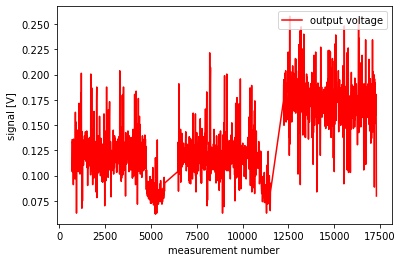

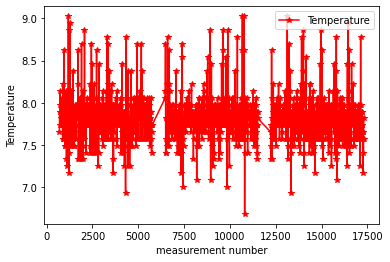

In [34]:
%use python3

import matplotlib.pyplot as plt
import numpy as np

# Retrieving data
# parameters_stored = False
# filename = "FA_measurement.txt"
# parameters = np.loadtxt(filename, max_rows = parameters_stored)
# samples = np.loadtxt(filename, skiprows = parameters_stored)
# parameters_stored3 = False
# filename3 = "FA_measurements3.txt"
# parameters3 = np.loadtxt(filename3, max_rows = parameters_stored3)
# samples3 = np.loadtxt(filename3, skiprows = parameters_stored3)
data = np.array([[0, 5.05e4],
       [1.25e-6, 4.17e4],
       [2.5e-6,3.47e4],
       [5e-6, 2.6e4]])

# Processing data
print((samples3))
reading = samples[0,:]
tt = samples[1,:]
Temp=samples3[0,:/

plt.plot(tt,reading,color='red', label='output voltage')
plt.ylabel('signal [V]')
plt.xlabel('measurement number')
plt.legend(loc=1)
plt.show()
plt.plot(tt,Temp,'*-',color='red', label='Temperature')
plt.ylabel('Temperature')
plt.xlabel('measurement number')
plt.legend(loc=1)
plt.show()

[0.10819428 0.13582091 0.36706815 0.1956157 ]
[0.10819428 0.13582091 0.36706815 0.1956157 ]
[3. 6. 8. 9.]
[[3.00e+00 5.05e+04]
 [6.00e+00 4.17e+04]
 [8.00e+00 3.47e+04]
 [9.00e+00 2.60e+04]]


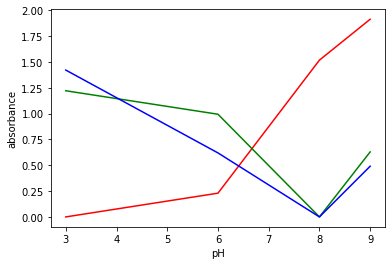

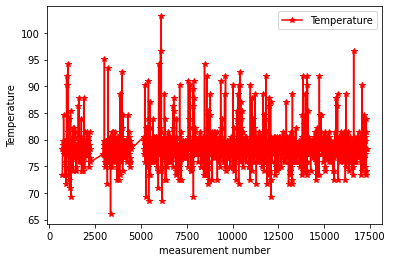

In [13]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([[3, 5.05e4],
       [6, 4.17e4],
       [8,3.47e4],
       [9, 2.6e4]])
pH=data[:,0]
reading1 = [1.328057, 1.333696, 1.328057, 1.337725, 1.330474, 1.308721, 1.361089, 1.349004, 1.344976, 1.341753, 1.362701, 1.35545, 1.326445, 1.326445, 1.329668, 1.340142, 1.337725, 1.340948, 1.311138, 1.324834, 1.348199, 1.319194, 1.330474, 1.315166, 1.34981, 1.343365, 1.342559, 1.331279, 1.327251, 1.341753, 1.327251, 1.373175, 1.318389, 1.353033, 1.332085, 1.344976, 1.308721, 1.339336, 1.338531, 1.336919, 1.328862, 1.360284, 1.348199, 1.327251, 1.328862, 1.334502, 1.332085, 1.347393, 1.336113, 1.332891, 1.350616, 1.328057, 1.341753, 1.324028, 1.32564, 1.318389, 1.34981, 1.338531, 1.34981, 1.315166, 1.336919, 1.354644, 1.340948, 1.339336, 1.324028, 1.352227, 1.354644, 1.361089, 1.336113, 1.334502, 1.331279, 1.315971, 1.321611, 1.320806, 1.324834, 1.329668, 1.317583, 1.329668, 1.315971, 1.340948, 1.29583, 1.326445, 1.358672, 1.340948, 1.337725, 1.35545, 1.338531, 1.319194, 1.363507, 1.324834, 1.347393, 1.306304, 1.331279, 1.353033, 1.302275, 1.316777, 1.350616, 1.357867, 1.336113, 1.334502, 0.07331655, 0.08459601, 0.08379034, 0.07895628, 0.07815061, 0.08137331, 0.07976195, 0.08459601, 0.09023576, 0.07815061, 0.07573357, 0.08217898, 0.07895628, 0.07976195, 0.0886244, 0.06848249, 0.09506981, 0.07734492, 0.08056764, 0.07815061, 0.07734492, 0.07895628, 0.08701304, 0.08217898, 0.08137331, 0.07976195, 0.08620738, 0.07331655, 0.08056764, 0.07573357, 0.08701304, 0.06525979, 0.08137331, 0.08217898, 0.08781872, 0.08217898, 0.08540169, 0.07895628, 0.08620738, 0.0749279, 0.08540169, 0.08379034, 0.09345845, 0.08137331, 0.07573357, 0.07895628, 0.09104142, 0.0749279, 0.07895628, 0.08217898, 0.107155, 0.1047379, 0.0886244, 0.1007095, 0.1152117, 0.109572, 0.1015152, 0.1160174, 0.1039322, 0.1136004, 0.1063493, 0.107155, 0.1127947, 0.1055436, 0.1031266, 0.1184344, 0.1007095, 0.09748684, 0.1031266, 0.1127947, 0.107155, 0.1160174, 0.1031266, 0.09506981, 0.1031266, 0.0990982, 0.1031266, 0.1015152, 0.1007095, 0.09426414, 0.1047379, 0.1031266, 0.1152117, 0.1136004, 0.1007095, 0.1055436, 0.107155, 0.09829252, 0.1023209, 0.1152117, 0.1007095, 0.1103777, 0.1087663, 0.111989, 0.1031266, 0.1031266, 0.0918471, 0.0990982, 0.1031266, 0.109572, 0.1055436, 0.111989, 0.1176287, 0.1176287, 0.1224628, 0.1176287, 0.1224628, 0.1111833, 0.1160174, 0.1079606, 0.1168231, 0.1272969, 0.1184344, 0.1031266, 0.1176287, 0.1289082, 0.09104142, 0.1127947, 0.114406, 0.1047379, 0.1184344, 0.1264912, 0.1079606, 0.1047379, 0.1055436, 0.1031266, 0.09668117, 0.09506981, 0.107155, 0.1160174, 0.0990982, 0.1136004, 0.1015152, 0.1152117, 0.09506981, 0.109572, 0.1256855, 0.109572, 0.1087663, 0.1015152, 0.1111833, 0.1208515, 0.1111833, 0.1208515, 0.1160174, 0.1079606, 0.1031266, 0.114406, 0.09426414, 0.1136004, 0.08620738, 0.08459601, 0.08459601, 0.07895628, 0.0749279, 0.08137331, 0.0749279, 0.08701304, 0.07734492, 0.08540169, 0.07815061, 0.08137331, 0.08781872, 0.07976195, 0.07170519, 0.08056764, 0.07815061, 0.08379034, 0.07412223, 0.09345845, 0.07653925, 0.07170519, 0.07815061, 0.08137331, 0.07573357, 0.0886244, 0.08540169, 0.1031266, 0.07895628, 0.08379034, 0.07976195, 0.09023576, 0.07573357, 0.07815061, 0.08620738, 0.08701304, 0.07976195, 0.07573357, 0.08379034, 0.08620738, 0.0749279, 0.07895628, 0.0886244, 0.07573357, 0.07895628, 0.07976195, 0.08217898, 0.08540169, 0.08056764, 0.07976195, 0.2731746, 0.247393, 0.2562554, 0.2465873, 0.2514214, 0.2401419, 0.2465873, 0.2627008, 0.2562554, 0.2546441, 0.252227, 0.2602838, 0.2651179, 0.2457816, 0.2562554, 0.2256397, 0.2385305, 0.2763973, 0.2723689, 0.2627008, 0.2570611, 0.2715633, 0.2627008, 0.2643122, 0.2739803, 0.2715633, 0.2409476, 0.2578668, 0.2900939, 0.2490043, 0.2699519, 0.2739803, 0.2385305, 0.2393362, 0.2667292, 0.2731746, 0.274786, 0.2804257, 0.2925109, 0.2602838, 0.2739803, 0.2627008, 0.2562554, 0.2345022, 0.2554498, 0.2361135, 0.2554498, 0.2618952, 0.252227, 0.22, 0.2780087, 0.2651179, 0.252227, 0.2610895, 0.2594781, 0.2433646, 0.2755917, 0.2562554, 0.2457816, 0.2618952, 0.2481987, 0.2401419, 0.2490043, 0.2369192, 0.252227, 0.2538384, 0.2530327, 0.247393, 0.247393, 0.2490043, 0.2610895, 0.2369192, 0.2481987, 0.2490043, 0.2610895, 0.2401419, 0.2578668, 0.2562554, 0.2610895, 0.2715633, 0.2715633, 0.2490043, 0.2602838, 0.2562554, 0.2570611, 0.2933166, 0.2417533, 0.2465873, 0.247393, 0.2465873, 0.2506157, 0.2884825, 0.2433646, 0.2546441, 0.2675349, 0.2908995, 0.2610895, 0.2643122, 0.2602838, 0.07170519, 0.08620738, 0.08459601, 0.07734492, 0.08217898, 0.08379034, 0.08701304, 0.08056764, 0.08298466, 0.08540169, 0.08137331, 0.09265279, 0.08701304, 0.08620738, 0.08620738, 0.08217898, 0.08459601, 0.08540169, 0.08056764, 0.08459601, 0.08943007, 0.07895628, 0.08298466, 0.07573357, 0.08217898, 0.08459601, 0.08379034, 0.08379034, 0.08459601, 0.08459601, 0.08217898, 0.08137331, 0.08217898, 0.08137331, 0.08701304, 0.07734492, 0.07734492, 0.08379034, 0.08459601, 0.07976195, 0.07976195, 0.0886244, 0.09023576, 0.07895628, 0.08701304, 0.0886244, 0.07895628, 0.08217898, 0.0886244, 0.08056764, 0.08540169, 0.08459601, 0.07573357, 0.07734492, 0.08701304, 0.0749279, 0.08379034, 0.08620738, 0.07412223, 0.07653925, 0.08137331, 0.08620738, 0.07815061, 0.07895628, 0.08459601, 0.08137331, 0.07976195, 0.08620738, 0.08701304, 0.08217898, 0.08459601, 0.07976195, 0.08137331, 0.07573357, 0.08217898, 0.07815061, 0.07815061, 0.08620738, 0.07734492, 0.08781872, 0.08781872, 0.07895628, 0.08781872, 0.08459601, 0.08943007, 0.08379034, 0.08379034, 0.08217898, 0.07653925, 0.07815061, 0.08217898, 0.06928816, 0.0749279, 0.07734492, 0.07976195, 0.07815061, 0.07734492, 0.07734492, 0.07412223, 0.08217898, 0.08137331, 0.08459601, 0.08943007, 0.07895628, 0.09104142, 0.08701304, 0.07815061, 0.08459601, 0.09829252, 0.08781872, 0.08701304, 0.07734492, 0.08137331, 0.08379034, 0.07573357, 0.07653925, 0.08056764, 0.07170519, 0.07573357, 0.07251087, 0.08137331, 0.08056764, 0.07573357, 0.08540169, 0.07653925, 0.07815061, 0.09506981, 0.07653925, 0.0990982, 0.08620738, 0.07412223, 0.08540169, 0.07976195, 0.08379034, 0.07815061, 0.07815061, 0.07734492, 0.0886244, 0.08056764, 0.09023576, 0.08459601, 0.08137331, 0.08540169, 0.07895628, 0.07573357, 0.07653925, 0.08620738, 0.0886244, 0.07573357, 0.07976195, 0.07976195, 0.08620738, 0.07251087, 0.07815061, 0.07573357, 0.07895628, 0.07976195, 0.08781872, 0.07895628, 0.08379034, 0.07976195, 0.08298466, 0.08217898, 0.08137331, 0.08056764, 0.08459601, 0.07573357, 0.07976195, 0.0886244, 0.07653925, 0.08701304, 0.08137331, 0.08701304, 0.09023576, 0.07815061, 0.08701304, 0.08459601, 0.0749279, 0.08056764, 0.0886244, 0.07976195, 0.08781872, 0.08379034, 0.08943007, 0.08137331, 0.09345845, 0.08056764, 0.08137331, 0.07170519, 0.07573357, 0.07895628, 0.08379034, 0.09426414, 0.07976195, 0.07895628, 0.08540169, 0.08217898, 0.08701304, 0.08620738, 0.08379034, 0.08620738, 0.09265279, 0.08379034, 0.08701304, 0.07412223, 0.07895628, 0.07734492, 0.08379034, 0.07815061, 0.07895628, 0.08379034, 0.07976195, 0.07815061, 0.07976195, 0.08217898, 0.07976195, 0.07170519, 0.07815061, 0.08056764, 0.0886244, 0.08701304, 0.08459601, 0.08620738, 0.09829252, 0.0886244, 0.08137331, 0.07734492, 0.08137331, 0.08056764, 0.07573357, 0.08379034, 0.07815061, 0.07815061, 0.07734492, 0.07815061, 0.0749279, 0.08056764, 0.08137331, 0.07573357, 0.07815061, 0.08056764, 0.07331655, 0.08137331, 0.08943007, 0.09104142, 0.0749279, 0.07573357, 0.07734492, 0.07895628, 0.07895628, 0.08056764, 0.07976195, 0.07331655, 0.08379034, 0.0918471, 0.08137331, 0.09104142, 0.09104142, 0.07976195, 0.08217898, 0.08379034, 0.0918471, 0.0918471, 0.09104142, 0.07895628, 0.08217898, 0.08701304, 0.07089952, 0.08217898, 0.08620738, 0.08540169, 0.08781872, 0.07815061, 0.08620738, 0.08137331, 0.07734492, 0.07734492, 0.07573357, 0.0749279, 0.07815061, 0.07815061, 0.07653925, 0.07653925, 0.08056764, 0.07895628, 0.08056764, 0.08056764, 0.08137331, 0.07895628, 0.07815061, 0.07331655, 0.07815061, 0.08620738, 0.08137331, 0.08459601, 0.07815061, 0.07815061, 0.07976195, 0.09023576, 0.08379034, 0.08379034, 0.0749279, 0.08620738, 0.08540169, 0.08379034, 0.08137331, 0.08056764, 0.08298466, 0.08379034, 0.08459601, 0.08217898, 0.08217898, 0.08459601, 0.08540169, 0.08620738, 0.09104142, 0.08379034, 0.09023576, 0.09426414, 0.08540169, 0.07895628, 0.07815061, 0.07815061, 0.08540169, 0.07734492, 0.08459601, 0.07976195, 0.07734492, 0.07734492, 0.07815061, 0.08217898, 0.08056764, 0.08701304, 0.08701304, 0.08459601, 0.08781872, 0.07976195, 0.07412223, 0.08620738, 0.07815061, 0.07895628, 0.07412223, 0.09104142, 0.08137331, 0.08781872, 0.08056764, 0.07895628, 0.08540169, 0.08459601, 0.07734492, 0.07976195, 0.07895628, 0.07573357, 0.07412223, 0.07573357, 0.0749279, 0.08056764, 0.07815061, 0.08056764, 0.07815061, 0.08217898, 0.08540169, 0.07895628, 0.08056764, 0.08620738, 0.07815061, 0.08620738, 0.08137331, 0.08459601, 0.08540169, 0.08217898, 0.08620738, 0.08540169, 0.09506981, 0.07815061, 0.08137331, 0.07815061, 0.08540169, 0.08217898, 0.08379034, 0.0749279, 0.08620738, 0.09104142, 0.07089952, 0.08459601, 0.07734492, 0.0749279, 0.07653925, 0.08781872, 0.08137331, 0.08379034, 0.08298466, 0.07573357, 0.08540169, 0.07815061, 0.08217898, 0.08459601, 0.07331655, 0.08379034, 0.08701304, 0.0749279, 0.08056764, 0.07976195, 0.07895628, 0.07573357, 0.07734492, 0.07815061, 0.08540169, 0.07895628, 0.07815061, 0.08459601, 0.08217898, 0.07895628, 0.08540169, 0.08620738, 0.0749279, 0.08137331, 0.08540169, 0.08459601, 0.08620738, 0.08379034, 0.08137331, 0.0886244, 0.07895628, 0.08459601, 0.08459601, 0.08620738, 0.09104142, 0.09104142, 0.07976195, 0.08701304, 0.08459601, 0.08459601, 0.08620738, 0.07815061, 0.08217898, 0.08379034, 0.07815061, 0.07815061, 0.07734492, 0.07815061, 0.08459601, 0.08701304, 0.07895628, 0.07653925, 0.08459601, 0.08459601, 0.08540169, 0.09104142, 0.08379034, 0.08298466, 0.08056764, 0.07412223, 0.07734492, 0.07976195, 0.08379034, 0.07976195, 0.07815061, 0.08379034, 0.07976195, 0.09104142, 0.07895628, 0.08459601, 0.0886244, 0.07170519, 0.08620738, 0.08056764, 0.07976195, 0.08459601, 0.08459601, 0.07412223, 0.08056764, 0.08056764, 0.07976195, 0.08137331, 0.07895628, 0.07815061, 0.08056764, 0.08459601, 0.07976195, 0.08781872, 0.08056764, 0.07976195, 0.08540169, 0.08298466, 0.07815061, 0.08701304, 0.08379034, 0.08379034, 0.08056764, 0.07895628, 0.0886244, 0.09345845, 0.07895628, 0.08701304, 0.08540169, 0.09104142, 0.08540169, 0.07815061, 0.09023576, 0.08459601, 0.07976195, 0.08379034, 0.08781872, 0.0749279, 0.07976195, 0.07815061, 0.08620738, 0.07734492, 0.08620738, 0.07815061, 0.07895628, 0.08620738, 0.08459601, 0.08056764, 0.07734492, 0.08137331, 0.07895628, 0.08540169, 0.08943007, 0.07573357, 0.08459601, 0.08379034, 0.07734492, 0.08620738, 0.07895628, 0.08540169, 0.09023576, 0.08540169, 0.08620738, 0.08459601, 0.07895628, 0.09023576, 0.07976195, 0.07895628, 0.07412223, 0.07573357, 0.08137331, 0.08620738, 0.08056764, 0.0749279, 0.07895628, 0.07573357, 0.07815061, 0.07895628, 0.07573357, 0.07895628, 0.07734492, 0.07815061, 0.07895628, 0.07653925, 0.07976195, 0.08540169, 0.08943007, 0.08781872, 0.07815061, 0.08137331, 0.07976195, 0.08056764, 0.08781872, 0.07976195, 0.08540169, 0.08701304, 0.09506981, 0.08056764, 0.07976195, 0.08056764, 0.08217898, 0.08137331, 0.0918471, 0.08379034, 0.07895628, 0.0918471, 0.08943007, 0.08701304, 0.08137331, 0.08620738, 0.08137331, 0.07895628, 0.09265279, 0.08379034, 0.07734492, 0.08701304, 0.08540169, 0.08459601, 0.08459601, 0.08701304, 0.08298466, 0.08701304, 0.07976195, 0.0749279, 0.07734492, 0.07895628, 0.07170519, 0.07573357, 0.07412223, 0.07331655, 0.0886244, 0.08459601, 0.07815061, 0.08137331, 0.07815061, 0.08540169, 0.08137331, 0.08540169, 0.0918471, 0.0749279, 0.08540169, 0.08620738, 0.07815061, 0.08056764, 0.0749279, 0.0749279, 0.07251087, 0.08137331, 0.08540169, 0.08056764, 0.08459601, 0.08781872, 0.08056764, 0.09104142, 0.08056764, 0.08701304, 0.08540169, 0.07976195, 0.07895628, 0.08298466, 0.07895628, 0.07815061, 0.07573357, 0.07815061, 0.0886244, 0.08056764, 0.07734492, 0.07412223, 0.07331655, 0.08943007, 0.07653925, 0.07976195, 0.07331655, 0.08379034, 0.08781872, 0.08379034, 0.08620738, 0.07976195, 0.07734492, 0.08943007, 0.07573357, 0.08379034, 0.08620738, 0.08137331, 0.07815061, 0.08137331, 0.08540169, 0.08781872, 0.08540169, 0.08620738, 0.08620738, 0.08620738, 0.08056764, 0.08379034, 0.08217898, 0.0886244, 0.08620738, 0.07976195, 0.08540169, 0.07976195, 0.08056764, 0.07976195, 0.09104142, 0.08459601, 0.07251087, 0.08540169, 0.08217898, 0.09426414, 0.08540169, 0.08217898, 0.08701304, 0.08540169, 0.08701304, 0.07976195, 0.08701304, 0.08137331, 0.08701304, 0.09506981, 0.08379034, 0.07815061, 0.07815061, 0.07815061, 0.07734492, 0.0749279, 0.09023576, 0.08379034, 0.09023576, 0.07976195, 0.08217898, 0.07895628, 0.07734492, 0.07412223, 0.07653925, 0.07251087, 0.08379034, 0.08379034, 0.08217898, 0.07573357, 0.08056764, 0.07976195, 0.07170519, 0.07653925, 0.08137331, 0.08056764, 0.08781872, 0.08217898, 0.07895628, 0.07895628, 0.08056764, 0.08540169, 0.08701304, 0.07976195, 0.07895628, 0.07815061, 0.08379034, 0.08701304, 0.08298466, 0.0886244, 0.09345845, 0.08379034, 0.07734492, 0.08701304, 0.08379034, 0.07895628, 0.08137331, 0.08217898, 0.0886244, 0.07251087, 0.0918471, 0.08056764, 0.09104142, 0.08217898, 0.07573357, 0.08137331, 0.08620738, 0.08217898, 0.07573357, 0.07976195, 0.07734492, 0.07573357, 0.07815061, 0.07331655, 0.0749279, 0.08620738, 0.08137331, 0.08540169, 0.07895628, 0.08620738, 0.08459601, 0.09023576, 0.08620738, 0.09023576, 0.07976195, 0.09104142, 0.08620738, 0.07895628, 0.07734492, 0.0918471, 0.08137331, 0.08540169, 0.08056764, 0.09023576, 0.08379034, 0.08459601, 0.08459601, 0.0886244, 0.08137331, 0.08459601, 0.08701304, 0.08056764, 0.07895628, 0.07734492, 0.08459601, 0.08217898, 0.08056764, 0.07573357, 0.07976195, 0.0749279, 0.08620738, 0.08781872, 0.0886244, 0.08459601, 0.09104142, 0.09023576, 0.07895628, 0.08137331, 0.08620738, 0.08701304, 0.08217898, 0.08137331, 0.08217898, 0.08620738, 0.08379034, 0.08217898, 0.08459601, 0.08056764, 0.08137331, 0.1039322, 0.08620738, 0.07976195, 0.08056764, 0.08701304, 0.08459601, 0.08459601, 0.08056764, 0.08620738, 0.08781872, 0.08056764, 0.07573357, 0.07573357, 0.07412223, 0.08137331, 0.08137331, 0.08137331, 0.07976195, 0.08379034, 0.08379034, 0.07976195, 0.08379034, 0.07895628, 0.08459601, 0.0990982, 0.08217898, 0.08379034, 0.06848249, 0.0886244, 0.0749279, 0.07815061, 0.07573357, 0.07734492, 0.07895628, 0.0918471, 0.08217898, 0.08379034, 0.08137331, 0.08620738, 0.07815061, 0.08379034, 0.09587547, 0.08540169, 0.07976195, 0.08620738, 0.07331655, 0.08459601, 0.07815061, 0.08056764, 0.08379034, 0.08540169, 0.07976195, 0.08781872, 0.0886244, 0.07895628, 0.08217898, 0.0886244, 0.07573357, 0.07895628, 0.07573357, 0.08781872, 0.0886244, 0.07412223, 0.08137331, 0.08459601, 0.08620738, 0.07976195, 0.07331655, 0.0886244, 0.07815061, 0.08540169, 0.0886244, 0.08701304, 0.08056764, 0.08781872, 0.0886244, 0.08217898, 0.07815061, 0.0886244, 0.07653925, 0.08781872, 0.07895628, 0.07251087, 0.08056764, 0.07976195, 0.08056764, 0.08620738, 0.07573357, 0.07815061, 0.07734492, 0.07734492, 0.07976195, 0.07734492, 0.08137331, 0.07976195, 0.08620738, 0.07734492, 0.09023576, 0.08540169, 0.08056764, 0.07895628, 0.07815061, 0.08217898, 0.08459601, 0.07734492, 0.08540169, 0.08379034, 0.08540169, 0.07734492, 0.07573357, 0.08701304, 0.07251087, 0.08056764, 0.08056764, 0.07734492, 0.08620738, 0.08459601, 0.08137331, 0.07815061, 0.07734492, 0.08056764, 0.08217898, 0.08701304, 0.07976195, 0.07976195, 0.08217898, 0.07573357, 0.07653925, 0.08137331, 0.08056764, 0.09023576, 0.09023576, 0.07815061, 0.08217898, 0.08701304, 0.08701304, 0.08781872, 0.07895628, 0.08943007, 0.08459601, 0.08620738, 0.09023576, 0.08379034, 0.07734492, 0.08620738, 0.07573357, 0.08056764, 0.07734492, 0.07815061, 0.07412223, 0.08379034, 0.0749279, 0.08056764, 0.08137331, 0.08620738, 0.09345845, 0.07573357, 0.07976195, 0.07331655, 0.07976195, 0.07573357, 0.07653925, 0.07734492, 0.0886244, 0.07976195, 0.08379034, 0.0749279, 0.08217898, 0.0749279, 0.09023576, 0.08217898, 0.08137331, 0.08379034, 0.08459601, 0.08217898, 0.0918471, 0.09345845, 0.08137331, 0.07331655, 0.0886244, 0.08217898, 0.08459601, 0.08056764, 0.08459601, 0.08943007, 0.09345845, 0.09104142, 0.08459601, 0.08701304, 0.08217898, 0.07815061, 0.08540169, 0.08056764, 0.08459601, 0.08620738, 0.08217898, 0.08701304, 0.08459601, 0.08056764, 0.08701304, 0.07895628, 0.08056764, 0.08620738, 0.07815061, 0.07976195, 0.08540169, 0.08620738, 0.08459601, 0.08781872, 0.08379034, 0.08379034, 0.08379034, 0.07573357, 0.09668117, 0.07653925, 0.08459601, 0.07976195, 0.08540169, 0.08459601, 0.07895628, 0.09104142, 0.08379034, 0.07895628, 0.07976195, 0.08298466, 0.0749279, 0.08217898, 0.09345845, 0.08379034, 0.07815061, 0.07815061, 0.08137331, 0.08620738, 0.07895628, 0.07895628, 0.09023576, 0.07895628, 0.07976195, 0.08781872, 0.07895628, 0.08137331, 0.08056764, 0.07976195, 0.08379034, 0.07573357, 0.0749279, 0.07653925, 0.08137331, 0.08217898, 0.08217898, 0.08217898, 0.07895628, 0.08781872, 0.08701304, 0.08137331, 0.07412223, 0.09023576, 0.0749279, 0.08217898, 0.08137331, 0.07815061, 0.07895628, 0.07815061, 0.09023576, 0.08056764, 0.07895628, 0.07815061, 0.08056764, 0.08137331, 0.07653925, 0.07573357, 0.08056764, 0.07815061, 0.07734492, 0.08137331, 0.07734492, 0.0886244, 0.07815061, 0.07331655, 0.07815061, 0.08137331, 0.08620738, 0.08056764, 0.09104142, 0.08540169, 0.07653925, 0.08056764, 0.08459601, 0.08540169, 0.07976195, 0.0918471, 0.07734492, 0.07573357, 0.07734492, 0.0886244, 0.08459601, 0.08056764]
Temp = [7.331655, 7.815061, 7.815061, 7.976195, 7.815061, 7.895628, 7.815061, 8.459601, 7.976195, 7.734493, 7.895628, 7.895628, 7.895628, 7.976195, 7.815061, 7.573358, 7.331655, 7.895628, 7.976195, 7.331655, 7.815061, 7.170519, 7.49279, 9.184711, 7.895628, 9.023576, 7.976195, 7.815061, 7.815061, 9.426414, 8.137331, 7.734493, 7.734493, 8.379034, 7.653926, 7.412223, 7.251088, 7.895628, 7.49279, 7.976195, 7.815061, 7.895628, 7.089952, 7.49279, 8.54017, 7.815061, 6.928817, 7.573358, 7.815061, 7.734493, 7.976195, 7.895628, 7.895628, 7.734493, 7.734493, 7.734493, 7.412223, 8.217899, 7.895628, 8.056764, 8.217899, 7.895628, 8.056764, 7.734493, 7.734493, 7.734493, 7.895628, 7.815061, 8.056764, 7.653926, 8.137331, 7.895628, 7.734493, 7.895628, 7.412223, 7.49279, 7.734493, 7.815061, 7.734493, 7.653926, 7.734493, 7.734493, 7.815061, 7.734493, 7.895628, 7.895628, 8.620738, 7.976195, 8.781872, 7.895628, 7.734493, 7.895628, 7.573358, 7.734493, 7.815061, 7.815061, 7.734493, 7.734493, 8.056764, 7.895628, 7.573358, 7.815061, 8.379034, 7.412223, 7.815061, 7.412223, 7.734493, 7.734493, 7.734493, 7.573358, 7.573358, 7.895628, 7.976195, 7.412223, 7.653926, 8.781872, 7.49279, 7.734493, 7.734493, 8.137331, 7.734493, 7.734493, 7.976195, 7.815061, 7.895628, 7.895628, 7.895628, 7.815061, 7.895628, 7.976195, 7.815061, 7.734493, 7.734493, 8.137331, 7.895628, 8.056764, 7.895628, 7.734493, 7.976195, 7.976195, 7.815061, 7.895628, 7.815061, 7.49279, 7.815061, 7.895628, 8.137331, 7.653926, 7.815061, 7.573358, 7.734493, 7.734493, 7.976195, 7.734493, 7.734493, 7.815061, 7.895628, 9.506981, 7.573358, 7.49279, 7.734493, 7.653926, 7.573358, 7.976195, 7.815061, 7.815061, 7.573358, 7.976195, 7.734493, 7.815061, 7.815061, 7.734493, 7.573358, 7.170519, 7.895628, 7.815061, 9.345845, 7.976195, 7.734493, 7.573358, 7.734493, 7.815061, 7.976195, 7.734493, 7.815061, 7.734493, 8.056764, 7.734493, 7.49279, 7.815061, 6.606546, 7.815061, 7.815061, 7.815061, 7.895628, 7.976195, 7.49279, 7.976195, 7.895628, 7.734493, 8.137331, 7.976195, 7.573358, 7.734493, 7.815061, 8.137331, 7.815061, 7.734493, 7.815061, 7.895628, 7.895628, 7.815061, 8.137331, 7.895628, 7.573358, 8.056764, 7.815061, 7.895628, 7.815061, 7.895628, 7.976195, 7.976195, 7.815061, 7.734493, 7.49279, 7.251088, 7.895628, 7.815061, 8.056764, 8.056764, 7.815061, 7.815061, 7.734493, 7.895628, 7.976195, 7.251088, 7.976195, 7.412223, 7.815061, 7.331655, 8.86244, 7.815061, 7.895628, 7.895628, 7.976195, 7.573358, 7.734493, 8.056764, 7.815061, 7.734493, 8.217899, 7.734493, 9.265279, 7.815061, 7.734493, 7.412223, 7.815061, 8.459601, 7.815061, 7.976195, 7.815061, 7.815061, 7.895628, 7.653926, 7.976195, 7.976195, 7.895628, 7.895628, 7.895628, 7.815061, 7.976195, 7.976195, 7.734493, 7.734493, 7.976195, 7.734493, 7.895628, 7.734493, 7.573358, 7.734493, 7.895628, 7.895628, 7.815061, 8.056764, 8.459601, 7.815061, 7.815061, 8.056764, 7.734493, 8.137331, 7.815061, 7.895628, 7.49279, 7.653926, 7.573358, 7.573358, 7.573358, 7.976195, 7.895628, 7.815061, 8.056764, 7.734493, 7.976195, 7.815061, 7.734493, 9.023576, 7.895628, 7.573358, 7.895628, 7.976195, 8.217899, 6.928817, 7.815061, 7.976195, 7.734493, 7.573358, 7.734493, 7.976195, 7.734493, 8.217899, 7.49279, 7.573358, 7.895628, 7.734493, 8.379034, 9.104142, 6.848249, 7.653926, 7.331655, 7.815061, 7.895628, 7.573358, 7.734493, 8.701304, 8.217899, 7.331655, 7.734493, 7.815061, 7.815061, 7.976195, 7.976195, 7.815061, 7.573358, 7.734493, 7.573358, 7.895628, 7.815061, 7.815061, 8.379034, 7.734493, 8.056764, 7.895628, 7.734493, 7.895628, 7.573358, 7.734493, 8.056764, 7.976195, 7.976195, 7.573358, 7.976195, 7.653926, 7.976195, 7.734493, 7.815061, 8.056764, 7.734493, 7.815061, 8.056764, 7.815061, 7.976195, 7.49279, 7.734493, 7.734493, 7.895628, 7.734493, 7.976195, 7.412223, 7.089952, 7.815061, 9.426414, 7.734493, 7.976195, 7.734493, 7.815061, 7.734493, 7.976195, 8.056764, 7.895628, 8.217899, 9.668117, 7.815061, 8.137331, 7.412223, 10.31266, 7.895628, 7.895628, 7.49279, 6.848249, 7.895628, 7.734493, 7.895628, 7.976195, 7.895628, 7.976195, 7.895628, 7.815061, 8.056764, 7.653926, 7.895628, 8.056764, 8.86244, 8.056764, 7.573358, 8.379034, 7.815061, 7.251088, 7.734493, 7.573358, 7.251088, 7.895628, 7.734493, 7.976195, 7.49279, 7.976195, 7.895628, 7.573358, 7.573358, 7.895628, 8.137331, 7.895628, 7.815061, 7.895628, 7.573358, 8.056764, 7.653926, 7.734493, 7.815061, 7.815061, 7.815061, 7.815061, 7.734493, 7.734493, 8.056764, 7.573358, 7.734493, 7.734493, 7.976195, 7.653926, 7.653926, 7.976195, 7.734493, 7.976195, 7.895628, 7.976195, 7.49279, 8.217899, 8.620738, 7.815061, 7.895628, 7.815061, 8.781872, 7.976195, 8.54017, 7.895628, 7.815061, 7.895628, 7.976195, 7.815061, 7.976195, 7.734493, 7.895628, 7.331655, 8.056764, 7.412223, 7.653926, 8.379034, 7.895628, 7.895628, 7.49279, 7.815061, 7.895628, 7.653926, 7.895628, 7.412223, 7.734493, 7.49279, 7.251088, 7.734493, 7.895628, 7.49279, 7.412223, 7.734493, 9.023576, 7.573358, 7.734493, 8.056764, 7.895628, 7.815061, 7.895628, 7.251088, 8.137331, 7.251088, 7.734493, 7.815061, 7.815061, 7.815061, 7.895628, 7.734493, 7.895628, 7.976195, 7.653926, 7.815061, 7.976195, 7.895628, 7.815061, 7.734493, 7.895628, 7.895628, 7.653926, 7.976195, 7.734493, 7.895628, 7.653926, 7.976195, 7.815061, 7.815061, 7.815061, 7.895628, 7.976195, 7.815061, 7.815061, 7.734493, 7.734493, 7.895628, 7.976195, 7.976195, 7.49279, 7.976195, 7.976195, 9.104142, 7.815061, 8.056764, 7.895628, 7.895628, 8.379034, 7.895628, 8.217899, 9.023576, 7.895628, 7.976195, 7.895628, 7.412223, 7.49279, 7.412223, 7.573358, 7.653926, 7.573358, 7.895628, 7.895628, 7.734493, 7.734493, 7.49279, 7.976195, 8.620738, 8.943007, 7.895628, 6.928817, 9.104142, 7.734493, 7.976195, 7.734493, 8.781872, 8.137331, 8.056764, 7.734493, 8.217899, 7.895628, 7.734493, 7.895628, 7.976195, 7.734493, 7.895628, 7.976195, 7.895628, 7.734493, 7.976195, 7.734493, 7.895628, 7.815061, 7.895628, 7.734493, 7.895628, 7.976195, 7.573358, 7.815061, 7.895628, 7.976195, 7.815061, 8.056764, 7.815061, 7.895628, 7.895628, 7.815061, 8.056764, 8.137331, 7.976195, 7.895628, 7.49279, 7.49279, 7.895628, 7.815061, 7.734493, 7.815061, 7.734493, 7.573358, 7.976195, 7.815061, 7.573358, 7.895628, 7.815061, 8.056764, 7.331655, 7.976195, 7.815061, 7.653926, 8.056764, 9.426414, 7.815061, 7.331655, 7.49279, 7.895628, 7.734493, 7.734493, 7.331655, 7.331655, 7.49279, 7.573358, 8.217899, 9.184711, 7.412223, 7.895628, 7.49279, 7.573358, 8.54017, 8.459601, 7.734493, 7.49279, 7.170519, 7.815061, 7.734493, 7.815061, 7.573358, 7.251088, 7.734493, 8.459601, 7.976195, 7.815061, 8.86244, 7.815061, 7.734493, 7.734493, 7.734493, 7.815061, 7.976195, 7.895628, 7.815061, 7.251088, 8.137331, 7.895628, 7.895628, 7.734493, 7.976195, 7.734493, 7.734493, 7.734493, 8.137331, 7.734493, 7.734493, 7.653926, 8.056764, 7.895628, 7.653926, 8.137331, 7.734493, 7.815061, 7.895628, 7.815061, 7.734493, 7.734493, 7.734493, 7.815061, 8.137331, 7.895628, 7.895628, 7.815061, 7.251088, 7.976195, 7.895628, 7.815061, 7.976195, 7.815061, 7.815061, 7.815061, 7.573358, 7.734493, 7.734493, 8.056764, 7.815061, 7.815061, 7.49279, 7.895628, 7.976195, 7.976195, 9.104142, 8.056764, 7.815061, 8.217899, 7.734493, 8.217899, 8.379034, 7.976195, 7.734493, 7.734493, 7.976195, 7.653926, 7.895628, 7.815061, 7.653926, 7.895628, 7.976195, 7.653926, 7.573358, 7.895628, 7.573358, 8.86244, 7.734493, 7.815061, 7.815061, 7.49279, 9.184711, 7.412223, 7.653926, 7.815061, 7.895628, 7.815061, 7.895628, 7.653926, 7.815061, 7.49279, 7.976195, 7.734493, 7.815061, 7.815061, 7.653926, 7.976195, 7.895628, 7.895628, 7.895628, 7.815061, 7.815061, 7.734493, 7.815061, 7.734493, 7.49279, 7.895628, 7.734493, 8.056764, 7.734493, 7.815061, 7.815061, 7.734493, 7.976195, 7.895628, 7.895628, 7.895628, 8.056764, 7.49279, 7.49279, 7.653926, 7.573358, 9.023576, 7.895628, 7.815061, 7.573358, 7.895628, 7.412223, 7.895628, 8.217899, 7.976195, 7.895628, 7.573358, 7.895628, 7.734493, 7.815061, 7.251088, 7.815061, 7.653926, 7.815061, 7.976195, 7.895628, 8.54017, 7.976195, 8.379034, 7.653926, 7.976195, 7.895628, 8.86244, 7.895628, 7.815061, 8.298467, 7.170519, 7.976195, 7.895628, 9.023576, 7.895628, 7.815061, 9.023576, 9.265279, 7.573358, 7.895628, 8.379034, 8.701304, 8.137331, 8.217899, 8.056764, 7.815061, 8.137331, 7.734493, 8.54017, 7.653926, 7.734493, 8.137331, 7.815061, 7.895628, 7.49279, 7.815061, 7.815061, 7.895628, 7.976195, 7.734493, 7.895628, 7.815061, 7.895628, 8.056764, 7.653926, 7.895628, 7.895628, 7.895628, 8.056764, 7.573358, 7.895628, 7.895628, 7.976195, 7.895628, 7.895628, 7.734493, 7.976195, 7.895628, 7.815061, 7.734493, 7.815061, 7.734493, 7.815061, 7.573358, 7.49279, 7.895628, 7.815061, 7.976195, 7.49279, 7.895628, 7.573358, 7.251088, 7.976195, 9.023576, 7.653926, 7.976195, 7.895628, 8.056764, 7.734493, 7.815061, 7.815061, 7.412223, 7.573358, 8.781872, 7.895628, 7.734493, 7.815061, 7.976195, 8.379034, 7.895628, 7.976195, 8.137331, 7.573358, 8.217899, 7.734493, 8.137331, 7.976195, 7.734493, 8.86244, 7.895628, 7.815061, 7.976195, 7.895628, 7.895628, 8.056764, 7.170519, 7.895628, 7.815061, 7.815061, 7.815061, 7.573358, 7.895628, 8.056764, 7.653926, 7.734493, 7.734493, 7.573358, 7.734493, 8.137331, 8.056764, 7.815061, 7.734493, 7.895628, 8.056764, 7.734493, 7.976195, 7.734493, 7.976195, 7.573358, 8.056764, 7.734493, 7.895628, 7.895628, 7.815061, 7.49279, 7.976195, 7.815061, 7.815061, 7.734493, 7.573358, 7.815061, 7.734493, 8.86244, 7.895628, 7.976195, 7.412223, 8.459601, 7.734493, 7.815061, 7.815061, 7.734493, 7.573358, 8.379034, 7.815061, 7.895628, 7.734493, 9.184711, 7.653926, 7.976195, 7.895628, 8.137331, 7.573358, 7.170519, 7.976195, 7.815061, 7.815061, 7.895628, 7.734493, 7.815061, 7.815061, 7.734493, 8.620738, 8.781872, 7.815061, 7.895628, 7.331655, 7.895628, 7.734493, 7.815061, 7.815061, 7.412223, 7.251088, 8.701304, 6.928817, 7.976195, 7.251088, 8.056764, 7.895628, 7.895628, 7.895628, 7.573358, 7.976195, 7.815061, 7.976195, 7.815061, 7.895628, 7.895628, 7.895628, 8.056764, 7.734493, 7.976195, 7.895628, 7.815061, 7.895628, 7.815061, 7.331655, 7.895628, 7.976195, 8.056764, 7.976195, 7.895628, 7.49279, 7.895628, 7.734493, 7.412223, 7.573358, 7.895628, 7.895628, 8.056764, 7.815061, 7.976195, 7.815061, 7.976195, 7.49279, 7.49279, 7.895628, 7.815061, 7.734493, 8.056764, 7.815061, 7.815061, 8.056764, 7.815061, 7.976195, 7.895628, 7.815061, 7.815061, 7.895628, 7.49279, 7.653926, 7.895628, 7.815061, 7.815061, 7.734493, 7.815061, 7.815061, 7.895628, 7.815061, 8.137331, 7.815061, 7.895628, 7.734493, 8.056764, 7.895628, 7.573358, 7.976195, 7.976195, 7.573358, 7.895628, 7.895628, 7.815061, 7.815061, 8.056764, 7.815061, 7.653926, 8.701304, 7.895628, 7.895628, 7.734493, 8.056764, 7.653926, 7.815061, 7.895628, 7.895628, 7.895628, 7.815061, 7.895628, 7.170519, 7.895628, 8.056764, 7.976195, 7.573358, 7.734493, 7.331655, 7.734493, 7.734493, 7.412223, 8.056764, 7.815061, 7.49279, 7.653926, 7.734493, 7.895628, 8.137331, 7.170519, 7.573358, 7.251088, 8.137331, 8.86244, 7.895628, 7.573358, 7.976195, 7.815061, 8.056764, 7.895628, 7.573358, 7.976195, 7.734493, 7.815061, 7.976195, 7.653926, 7.815061, 7.815061, 7.815061, 7.976195, 7.734493, 8.217899, 7.573358, 7.815061, 7.895628, 7.573358, 7.815061, 7.815061, 7.734493, 7.734493, 7.895628, 7.573358, 7.734493, 7.734493, 7.895628, 7.895628, 7.815061, 7.734493, 7.815061, 7.734493, 7.815061, 7.976195, 7.734493, 7.895628, 7.49279, 7.815061, 7.895628, 7.976195, 7.895628, 7.895628, 7.734493, 7.815061, 7.331655, 7.734493, 7.976195, 8.056764, 7.895628, 8.459601, 7.815061, 9.184711, 8.056764, 7.573358, 7.412223, 7.815061, 8.298467, 7.815061, 7.412223, 7.573358, 7.976195, 7.976195, 8.459601, 7.412223, 7.815061, 8.86244, 7.895628, 7.976195, 7.573358, 7.734493, 7.573358, 7.976195, 7.331655, 9.184711, 7.573358, 7.412223, 9.023576, 7.895628, 8.54017, 7.895628, 8.056764, 8.056764, 7.976195, 7.815061, 7.815061, 7.734493, 7.976195, 7.734493, 7.734493, 7.895628, 7.815061, 7.895628, 7.815061, 7.412223, 7.976195, 7.815061, 7.895628, 7.976195, 7.976195, 7.734493, 7.815061, 7.815061, 7.815061, 7.815061, 7.895628, 7.895628, 7.734493, 7.815061, 7.653926, 8.056764, 7.895628, 7.895628, 7.895628, 7.734493, 7.976195, 7.653926, 8.137331, 7.815061, 7.895628, 7.976195, 7.815061, 7.815061, 7.251088, 7.573358, 7.653926, 7.976195, 8.217899, 8.137331, 7.895628, 7.331655, 7.815061, 7.976195, 7.976195, 8.056764, 7.734493, 7.976195, 7.895628, 7.331655, 7.895628, 7.815061, 9.184711, 7.895628, 7.815061, 8.459601, 7.815061, 7.895628, 7.815061, 8.056764, 8.459601, 8.459601, 8.137331, 7.976195, 7.734493, 7.895628, 7.895628, 7.815061, 7.734493, 7.976195, 7.815061, 7.976195, 7.734493, 8.056764, 7.573358, 7.895628, 7.976195, 7.976195, 7.815061, 7.976195, 7.815061, 8.056764, 8.056764, 8.137331, 7.49279, 7.412223, 7.815061, 7.895628, 7.815061, 7.895628, 7.976195, 7.815061, 7.815061, 7.653926, 8.056764, 7.653926, 7.976195, 7.895628, 7.734493, 7.895628, 8.056764, 7.653926, 8.056764, 8.137331, 7.573358, 7.653926, 7.976195, 7.815061, 7.976195, 7.815061, 7.815061, 7.734493, 7.895628, 7.895628, 7.573358, 7.815061, 7.734493, 7.976195, 7.734493, 7.895628, 7.734493, 7.815061, 7.815061, 7.895628, 7.895628, 7.815061, 7.412223, 7.895628, 7.895628, 7.653926, 7.412223, 7.251088, 7.976195, 7.976195, 7.734493, 7.895628, 7.895628, 8.137331, 7.734493, 7.734493, 7.976195, 7.895628, 7.895628, 8.781872, 7.895628, 7.895628, 8.620738, 7.734493, 7.734493, 7.815061, 8.86244, 7.976195, 7.734493, 7.815061, 7.251088, 7.815061, 7.734493, 7.815061, 7.815061, 7.976195, 8.056764, 7.734493, 7.815061, 7.573358, 7.815061, 7.895628, 7.976195, 7.734493, 7.895628, 7.815061, 8.056764, 8.137331, 7.734493, 7.734493, 7.976195, 8.056764, 7.653926, 7.976195, 7.573358, 7.895628, 7.734493, 7.895628, 7.653926, 7.815061, 8.137331, 7.653926, 7.734493, 7.976195, 7.976195, 8.056764, 7.815061, 7.895628, 7.251088, 7.734493, 7.815061, 7.49279, 8.86244, 7.976195, 7.895628, 7.815061, 7.815061, 7.815061, 7.734493, 7.815061, 7.573358, 7.976195, 7.815061, 8.137331, 7.573358, 7.815061, 7.815061, 7.895628, 7.412223, 7.895628, 7.734493, 7.895628, 7.815061, 7.573358, 7.895628, 8.056764, 7.734493, 7.815061, 7.815061, 7.573358, 7.815061, 7.895628, 7.49279, 7.976195, 7.976195, 7.895628, 7.815061, 7.49279, 7.976195, 7.976195, 7.976195, 7.331655, 7.815061, 9.668117, 7.573358, 7.734493, 8.056764, 7.815061, 7.815061, 7.573358, 7.976195, 7.815061, 7.815061, 7.976195, 7.815061, 7.815061, 7.573358, 7.815061, 7.976195, 7.815061, 8.056764, 7.895628, 7.976195, 7.815061, 8.056764, 7.976195, 7.815061, 7.734493, 7.653926, 8.137331, 7.734493, 7.895628, 7.734493, 7.976195, 7.815061, 7.976195, 7.815061, 7.895628, 8.056764, 7.734493, 7.734493, 7.895628, 7.895628, 7.331655, 7.895628, 7.573358, 7.734493, 7.734493, 7.412223, 9.023576, 7.815061, 7.734493, 7.895628, 7.976195, 7.895628, 7.976195, 7.49279, 8.056764, 8.459601, 7.653926, 7.734493, 8.379034, 7.49279, 8.056764, 7.976195, 7.734493, 7.976195, 7.331655, 8.137331, 7.412223, 8.379034, 7.815061, 7.815061, 7.815061]
tt = [701, 712, 722, 732, 742, 752, 762, 772, 783, 793, 804, 814, 824, 834, 844, 854, 865, 877, 887, 897, 907, 917, 927, 937, 947, 958, 968, 978, 988, 998, 1008, 1018, 1029, 1041, 1051, 1061, 1071, 1081, 1091, 1102, 1112, 1122, 1132, 1142, 1152, 1162, 1172, 1183, 1193, 1203, 1213, 1223, 1233, 1243, 1253, 1264, 1274, 1284, 1294, 1304, 1314, 1324, 1335, 1345, 1355, 1366, 1376, 1387, 1397, 1407, 1417, 1427, 1437, 1447, 1457, 1468, 1478, 1488, 1498, 1508, 1518, 1528, 1538, 1549, 1559, 1569, 1579, 1589, 1599, 1609, 1619, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1701, 1711, 1721, 1731, 1741, 1751, 1761, 1771, 1782, 1792, 1802, 1812, 1822, 1832, 1842, 1852, 1863, 1873, 1883, 1893, 1903, 1913, 1923, 1934, 1944, 1954, 1964, 1974, 1984, 1994, 2005, 2016, 2026, 2036, 2046, 2056, 2067, 2077, 2087, 2097, 2107, 2117, 2127, 2137, 2148, 2158, 2168, 2178, 2188, 2198, 2208, 2218, 2929, 2939, 2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3031, 3041, 3051, 3061, 3071, 3081, 3091, 3101, 3112, 3122, 3132, 3142, 3152, 3162, 3172, 3183, 3193, 3203, 3213, 3223, 3233, 3243, 3253, 3264, 3274, 3284, 3294, 3304, 3314, 3324, 3334, 3345, 3355, 3365, 3375, 3385, 3395, 3405, 3415, 3426, 3436, 3446, 3456, 3466, 3476, 3486, 3496, 3507, 3517, 3527, 3537, 3547, 3557, 3567, 3578, 3588, 3598, 3608, 3618, 3628, 3638, 3648, 3659, 3669, 3679, 3689, 3699, 3709, 3719, 3729, 3740, 3750, 3760, 3770, 3780, 3790, 3800, 3810, 3821, 3831, 3841, 3851, 3861, 3871, 3881, 3892, 3902, 3912, 3922, 3932, 3942, 3952, 3962, 3973, 3983, 3993, 4004, 4014, 4024, 4035, 4045, 4055, 4065, 4075, 4085, 4095, 4106, 4116, 4126, 4136, 4146, 4156, 4166, 4176, 4187, 4197, 4207, 4217, 4227, 4237, 4247, 4257, 4268, 4278, 4288, 4298, 4308, 4318, 4328, 4338, 4349, 4359, 4369, 4379, 4389, 4399, 4409, 4419, 4430, 4440, 5151, 5161, 5171, 5181, 5191, 5201, 5211, 5222, 5232, 5242, 5252, 5262, 5272, 5282, 5292, 5303, 5313, 5323, 5333, 5343, 5353, 5363, 5373, 5384, 5394, 5404, 5414, 5424, 5434, 5444, 5454, 5465, 5475, 5485, 5495, 5505, 5515, 5525, 5535, 5546, 5556, 5566, 5576, 5586, 5596, 5606, 5617, 5627, 5637, 5647, 5657, 5667, 5677, 5687, 5698, 5708, 5718, 5728, 5738, 5748, 5758, 5768, 5779, 5789, 5799, 5809, 5819, 5829, 5839, 5849, 5860, 5870, 5880, 5890, 5900, 5910, 5920, 5930, 5941, 5951, 5961, 5971, 5981, 5991, 6001, 6012, 6022, 6032, 6042, 6052, 6062, 6072, 6082, 6093, 6103, 6113, 6123, 6133, 6143, 6153, 6163, 6174, 6184, 6194, 6204, 6214, 6224, 6234, 6244, 6255, 6265, 6275, 6285, 6295, 6305, 6315, 6326, 6336, 6346, 6356, 6366, 6376, 6386, 6396, 6407, 6417, 6427, 6437, 6447, 6457, 6467, 6477, 6488, 6498, 6508, 6518, 6528, 6538, 6548, 6558, 6569, 6579, 6589, 6599, 6609, 6619, 6629, 6640, 6650, 6660, 6670, 6680, 6690, 6700, 6710, 6721, 6731, 6741, 6751, 6761, 6771, 6781, 6791, 6802, 6812, 6822, 6832, 6842, 6852, 6862, 6872, 6883, 6893, 6903, 6913, 6923, 6933, 6943, 6953, 6964, 6974, 6984, 6994, 7004, 7014, 7024, 7035, 7045, 7055, 7065, 7075, 7085, 7095, 7105, 7116, 7126, 7136, 7146, 7156, 7166, 7176, 7186, 7197, 7207, 7217, 7227, 7237, 7247, 7257, 7267, 7278, 7288, 7298, 7309, 7319, 7329, 7340, 7350, 7360, 7370, 7380, 7390, 7400, 7410, 7421, 7431, 7441, 7451, 7461, 7471, 7481, 7491, 7502, 7512, 7522, 7532, 7542, 7552, 7562, 7572, 7583, 7593, 7603, 7613, 7623, 7633, 7643, 7654, 7664, 7674, 7684, 7694, 7704, 7714, 7724, 7735, 7745, 7755, 7765, 7775, 7785, 7795, 7805, 7816, 7826, 7836, 7846, 7856, 7866, 7876, 7886, 7897, 7907, 7917, 7927, 7937, 7947, 7957, 7967, 7978, 7988, 7998, 8008, 8018, 8028, 8038, 8049, 8059, 8069, 8079, 8089, 8099, 8109, 8119, 8130, 8140, 8150, 8160, 8170, 8180, 8190, 8200, 8211, 8221, 8231, 8241, 8251, 8261, 8271, 8281, 8292, 8302, 8312, 8322, 8332, 8342, 8352, 8362, 8373, 8383, 8393, 8403, 8413, 8423, 8433, 8444, 8454, 8464, 8474, 8484, 8494, 8504, 8514, 8525, 8535, 8545, 8555, 8565, 8575, 8585, 8595, 8606, 8616, 8626, 8636, 8646, 8656, 8666, 8676, 8687, 8697, 8707, 8717, 8727, 8737, 8747, 8757, 8768, 8778, 8788, 8798, 8808, 8818, 8828, 8838, 8849, 8859, 8869, 8879, 8889, 8899, 8909, 8920, 8930, 8940, 8950, 8960, 8970, 8980, 8990, 9001, 9011, 9021, 9031, 9041, 9051, 9061, 9071, 9082, 9092, 9102, 9112, 9122, 9132, 9142, 9152, 9163, 9173, 9183, 9193, 9203, 9213, 9223, 9233, 9244, 9254, 9264, 9274, 9284, 9294, 9304, 9315, 9325, 9335, 9345, 9355, 9365, 9375, 9385, 9396, 9406, 9416, 9426, 9436, 9446, 9456, 9466, 9477, 9487, 9497, 9507, 9517, 9527, 9537, 9547, 9558, 9568, 9578, 9588, 9598, 9608, 9618, 9628, 9639, 9649, 9659, 9669, 9679, 9689, 9699, 9710, 9720, 9730, 9740, 9750, 9760, 9770, 9780, 9791, 9801, 9811, 9821, 9831, 9841, 9851, 9861, 9872, 9882, 9892, 9902, 9912, 9922, 9932, 9942, 9953, 9963, 9973, 9983, 9993, 10003, 10013, 10023, 10034, 10044, 10054, 10064, 10074, 10084, 10094, 10105, 10115, 10125, 10135, 10145, 10155, 10165, 10175, 10186, 10196, 10206, 10216, 10226, 10236, 10246, 10256, 10267, 10277, 10287, 10297, 10307, 10317, 10327, 10337, 10348, 10358, 10368, 10378, 10388, 10398, 10408, 10419, 10429, 10439, 10449, 10459, 10469, 10479, 10489, 10500, 10510, 10520, 10530, 10540, 10550, 10560, 10571, 10581, 10591, 10601, 10611, 10621, 10631, 10641, 10652, 10662, 10672, 10682, 10692, 10702, 10712, 10722, 10733, 10743, 10753, 10763, 10773, 10783, 10793, 10803, 10814, 10824, 10834, 10844, 10854, 10864, 10874, 10884, 10895, 10905, 10915, 10925, 10935, 10945, 10955, 10965, 10976, 10986, 10996, 11006, 11016, 11026, 11036, 11047, 11057, 11067, 11077, 11087, 11097, 11107, 11117, 11128, 11138, 11148, 11158, 11168, 11178, 11188, 11198, 11209, 11219, 11229, 11239, 11249, 11259, 11269, 11279, 11290, 11300, 11310, 11320, 11330, 11340, 11350, 11360, 11371, 11381, 11391, 11401, 11411, 11421, 11431, 11442, 11452, 11462, 11472, 11482, 11492, 11502, 11512, 11523, 11533, 11543, 11553, 11563, 11573, 11583, 11593, 11604, 11614, 11624, 11634, 11644, 11654, 11664, 11674, 11685, 11695, 11705, 11715, 11725, 11735, 11745, 11755, 11766, 11776, 11786, 11796, 11806, 11816, 11826, 11837, 11847, 11857, 11867, 11877, 11887, 11897, 11907, 11918, 11928, 11938, 11948, 11958, 11968, 11978, 11988, 11999, 12009, 12019, 12029, 12039, 12049, 12059, 12069, 12080, 12090, 12100, 12110, 12120, 12130, 12140, 12151, 12161, 12171, 12181, 12191, 12201, 12211, 12221, 12232, 12242, 12252, 12262, 12272, 12282, 12292, 12302, 12313, 12323, 12333, 12343, 12353, 12363, 12373, 12383, 12394, 12404, 12414, 12424, 12434, 12444, 12454, 12464, 12475, 12500, 12512, 12522, 12532, 12542, 12552, 12562, 12572, 12582, 12593, 12603, 12613, 12623, 12633, 12643, 12653, 12664, 12674, 12684, 12694, 12704, 12714, 12724, 12734, 12745, 12755, 12765, 12775, 12785, 12795, 12805, 12815, 12826, 12836, 12846, 12856, 12866, 12876, 12886, 12896, 12907, 12917, 12927, 12937, 12947, 12957, 12967, 12977, 12988, 12998, 13008, 13018, 13028, 13038, 13048, 13059, 13069, 13079, 13089, 13099, 13109, 13119, 13129, 13140, 13150, 13160, 13170, 13180, 13190, 13200, 13210, 13221, 13231, 13241, 13251, 13261, 13271, 13281, 13291, 13302, 13312, 13322, 13332, 13342, 13352, 13362, 13372, 13383, 13393, 13403, 13413, 13423, 13433, 13443, 13454, 13464, 13474, 13484, 13494, 13504, 13514, 13524, 13535, 13545, 13555, 13565, 13575, 13585, 13595, 13605, 13616, 13626, 13636, 13646, 13656, 13666, 13676, 13686, 13697, 13707, 13717, 13727, 13737, 13747, 13757, 13767, 13778, 13788, 13798, 13808, 13818, 13828, 13838, 13849, 13859, 13869, 13879, 13889, 13899, 13909, 13919, 13930, 13940, 13950, 13960, 13970, 13980, 13990, 14000, 14011, 14021, 14031, 14041, 14051, 14061, 14071, 14081, 14092, 14102, 14112, 14122, 14132, 14142, 14152, 14162, 14173, 14183, 14193, 14203, 14213, 14223, 14233, 14243, 14254, 14264, 14274, 14284, 14294, 14304, 14314, 14325, 14335, 14345, 14355, 14365, 14375, 14385, 14395, 14406, 14416, 14426, 14436, 14446, 14456, 14466, 14476, 14487, 14497, 14507, 14517, 14527, 14537, 14547, 14557, 14568, 14578, 14588, 14598, 14608, 14618, 14628, 14638, 14649, 14659, 14669, 14679, 14689, 14699, 14709, 14720, 14730, 14740, 14750, 14760, 14770, 14780, 14790, 14801, 14811, 14821, 14831, 14841, 14851, 14861, 14871, 14882, 14892, 14902, 14912, 14922, 14932, 14942, 14952, 14963, 14973, 14983, 14993, 15003, 15013, 15023, 15033, 15044, 15054, 15064, 15074, 15084, 15094, 15104, 15115, 15125, 15135, 15145, 15155, 15165, 15175, 15185, 15196, 15206, 15216, 15226, 15236, 15246, 15256, 15266, 15277, 15287, 15297, 15307, 15317, 15327, 15337, 15347, 15358, 15368, 15378, 15388, 15398, 15408, 15418, 15428, 15439, 15449, 15459, 15469, 15479, 15489, 15499, 15510, 15520, 15530, 15540, 15550, 15560, 15570, 15580, 15591, 15601, 15611, 15621, 15631, 15641, 15651, 15661, 15672, 15682, 15692, 15702, 15712, 15722, 15732, 15742, 15753, 15763, 15773, 15783, 15793, 15803, 15813, 15823, 15834, 15844, 15854, 15864, 15874, 15884, 15894, 15904, 15915, 15925, 15935, 15945, 15955, 15965, 15975, 15986, 15996, 16006, 16016, 16026, 16036, 16046, 16056, 16067, 16077, 16087, 16097, 16107, 16117, 16127, 16137, 16148, 16158, 16168, 16178, 16188, 16198, 16208, 16218, 16229, 16239, 16249, 16259, 16269, 16279, 16289, 16299, 16310, 16320, 16330, 16340, 16350, 16360, 16370, 16381, 16391, 16401, 16411, 16421, 16431, 16441, 16451, 16462, 16472, 16482, 16492, 16502, 16512, 16522, 16532, 16543, 16553, 16563, 16573, 16583, 16593, 16603, 16613, 16624, 16634, 16644, 16654, 16664, 16674, 16684, 16694, 16705, 16715, 16725, 16735, 16745, 16755, 16765, 16775, 16786, 16796, 16806, 16816, 16826, 16836, 16846, 16857, 16867, 16877, 16887, 16897, 16907, 16917, 16927, 16938, 16948, 16958, 16968, 16978, 16988, 16998, 17008, 17019, 17029, 17039, 17049, 17059, 17069, 17079, 17089, 17100, 17110, 17120, 17130, 17140, 17150, 17160, 17170, 17181, 17191, 17201, 17211, 17221, 17231, 17241, 17252, 17262, 17272, 17282, 17292, 17302, 17312]
reading2=[1.06455, 1.049242, 1.065356, 1.045214, 1.073413, 1.065356, 1.074218, 1.083081, 1.042797, 1.047631, 1.065356, 1.054076, 1.059716, 1.066162, 1.067773, 1.037963, 1.06455, 1.055688, 1.038769, 1.057299, 1.057299, 1.063745, 1.083081, 1.077441, 1.052465, 1.053271, 1.076635, 1.083081, 1.061328, 1.053271, 1.06455, 1.043603, 1.043603, 1.043603, 1.04038, 1.054076, 1.06455, 1.063745, 1.059716, 1.048437, 1.071801, 1.071801, 1.096777, 1.062133, 1.042797, 1.037963, 1.060522, 1.039574, 1.058105, 1.049242, 1.073413, 1.044408, 1.065356, 1.044408, 1.059716, 1.073413, 1.071801, 1.06455, 1.068579, 1.063745, 1.057299, 1.073413, 1.051659, 1.044408, 1.054882, 1.091943, 1.073413, 1.055688, 1.073413, 1.087915, 1.070996, 1.068579, 1.052465, 1.031518, 1.073413, 1.092749, 1.060522, 1.085498, 1.073413, 1.068579, 1.04602, 1.058105, 1.029856, 1.072607, 1.055688, 1.039574, 1.050854, 1.046825, 1.070996, 1.054882, 1.068579, 1.066967, 1.074218, 1.062133, 1.07583, 1.070996, 1.054882, 1.061328, 1.058105, 1.059716, 0.06687114, 0.08217898, 0.07573357, 0.07976195, 0.08620738, 0.08379034, 0.08540169, 0.08701304, 0.09023576, 0.08056764, 0.08620738, 0.08459601, 0.07734492, 0.08781872, 0.08781872, 0.08056764, 0.07895628, 0.08701304, 0.08379034, 0.08379034, 0.09668117, 0.07895628, 0.07976195, 0.08701304, 0.08620738, 0.07331655, 0.07573357, 0.08781872, 0.08137331, 0.07815061, 0.07815061, 0.07815061, 0.08137331, 0.07653925, 0.08781872, 0.07734492, 0.08217898, 0.07331655, 0.07815061, 0.08056764, 0.08459601, 0.08459601, 0.0918471, 0.08620738, 0.07895628, 0.07895628, 0.08217898, 0.0918471, 0.08540169, 0.07976195, 0.1361593, 0.1401877, 0.1466331, 0.1321309, 0.1353536, 0.1450217, 0.1240741, 0.1361593, 0.1272969, 0.1329366, 0.141799, 0.1240741, 0.1264912, 0.1482445, 0.1490501, 0.1563012, 0.1240741, 0.1434104, 0.1401877, 0.1248798, 0.1490501, 0.1224628, 0.1377707, 0.1337423, 0.1192401, 0.1208515, 0.1184344, 0.1313252, 0.1321309, 0.1321309, 0.1272969, 0.1434104, 0.1256855, 0.1232685, 0.1297139, 0.1466331, 0.1281025, 0.1385763, 0.1426047, 0.1160174, 0.1466331, 0.1232685, 0.1466331, 0.1401877, 0.141799, 0.1208515, 0.1450217, 0.1434104, 0.1168231, 0.1361593, 0.1240741, 0.1337423, 0.1426047, 0.1353536, 0.1490501, 0.1385763, 0.1305196, 0.1232685, 0.1297139, 0.136965, 0.141799, 0.1554955, 0.1442161, 0.1450217, 0.1401877, 0.1313252, 0.1337423, 0.1579126, 0.141799, 0.1337423, 0.1289082, 0.1256855, 0.1522728, 0.1377707, 0.1450217, 0.1474388, 0.1530785, 0.1450217, 0.1450217, 0.1232685, 0.139382, 0.139382, 0.1321309, 0.1289082, 0.1466331, 0.1329366, 0.1192401, 0.1321309, 0.1490501, 0.1361593, 0.1297139, 0.1426047, 0.1321309, 0.1208515, 0.1264912, 0.141799, 0.1256855, 0.1490501, 0.1297139, 0.141799, 0.08379034, 0.07734492, 0.08620738, 0.08540169, 0.08620738, 0.07976195, 0.07815061, 0.07976195, 0.08298466, 0.08056764, 0.08781872, 0.07734492, 0.07815061, 0.08056764, 0.0749279, 0.0749279, 0.07573357, 0.08379034, 0.08540169, 0.08540169, 0.08217898, 0.08379034, 0.08379034, 0.07734492, 0.08217898, 0.08540169, 0.0749279, 0.07815061, 0.08137331, 0.07976195, 0.07653925, 0.08217898, 0.07976195, 0.07815061, 0.07815061, 0.08217898, 0.08459601, 0.07089952, 0.07976195, 0.07734492, 0.08056764, 0.07815061, 0.07895628, 0.08540169, 0.08379034, 0.08217898, 0.08540169, 0.08459601, 0.08620738, 0.08217898, 0.551989, 0.579382, 0.5479606, 0.5584344, 0.5527947, 0.5624628, 0.5785763, 0.5624628, 0.5640741, 0.5834104, 0.5664912, 0.5648798, 0.5914671, 0.5721309, 0.5576287, 0.5689082, 0.5777707, 0.5721309, 0.5737423, 0.576965, 0.5656855, 0.5914671, 0.5713253, 0.5511833, 0.5777707, 0.5954955, 0.5890501, 0.5785763, 0.5874388, 0.5737423, 0.5834104, 0.5713253, 0.574548, 0.549572, 0.5721309, 0.5850217, 0.5850217, 0.5648798, 0.5689082, 0.5705195, 0.5608515, 0.5672969, 0.5592401, 0.5672969, 0.576965, 0.5963012, 0.5890501, 0.5664912, 0.5842161, 0.5858274, 0.5850217, 0.5834104, 0.547155, 0.5777707, 0.5882444, 0.5882444, 0.5713253, 0.5801877, 0.5874388, 0.5681025, 0.5785763, 0.5576287, 0.5463493, 0.5898558, 0.574548, 0.5737423, 0.5656855, 0.5954955, 0.5721309, 0.5946898, 0.5656855, 0.5874388, 0.5632685, 0.5672969, 0.5713253, 0.5826047, 0.5648798, 0.5689082, 0.5648798, 0.574548, 0.5809934, 0.5777707, 0.5777707, 0.5753536, 0.5809934, 0.5874388, 0.5681025, 0.5648798, 0.5656855, 0.5648798, 0.5938842, 0.5632685, 0.5995239, 0.5809934, 0.5777707, 0.5648798, 0.5761592, 0.5890501, 0.5721309, 0.07815061, 0.07815061, 0.07976195, 0.08781872, 0.08217898, 0.08137331, 0.08781872, 0.08620738, 0.08540169, 0.0918471, 0.08540169, 0.07734492, 0.08781872, 0.09023576, 0.08379034, 0.09023576, 0.08379034, 0.08137331, 0.08137331, 0.07815061, 0.08217898, 0.08701304, 0.08459601, 0.08701304, 0.07976195, 0.08781872, 0.09023576, 0.07653925, 0.0886244, 0.08781872, 0.08137331, 0.08781872, 0.08781872, 0.07976195, 0.07734492, 0.0886244, 0.08459601, 0.07815061, 0.07815061, 0.07734492, 0.07815061, 0.08459601, 0.08540169, 0.08540169, 0.08137331, 0.07976195, 0.08379034, 0.08056764, 0.08137331, 0.07976195, 0.08137331, 0.0886244, 0.08701304, 0.08701304, 0.08217898, 0.08459601, 0.08379034, 0.07734492, 0.08540169, 0.07734492, 0.07734492, 0.07331655, 0.08459601, 0.09104142, 0.08701304, 0.08540169, 0.09345845, 0.08056764, 0.07895628, 0.08056764, 0.08379034, 0.07815061, 0.07734492, 0.08781872, 0.09104142, 0.07734492, 0.07895628, 0.07976195, 0.07653925, 0.08137331, 0.08137331, 0.08379034, 0.0749279, 0.07573357, 0.08620738, 0.07895628, 0.08137331, 0.07895628, 0.08459601, 0.08217898, 0.07251087, 0.09426414, 0.08540169, 0.08781872, 0.08137331, 0.08459601, 0.08620738, 0.08540169, 0.07573357, 0.08056764, 0.08620738, 0.07976195, 0.07251087, 0.08701304, 0.07653925, 0.08379034, 0.09023576, 0.07412223, 0.0886244, 0.08056764, 0.08056764, 0.06928816, 0.07895628, 0.08540169, 0.0749279, 0.09023576, 0.07573357, 0.08137331, 0.0918471, 0.07815061, 0.07976195, 0.07734492, 0.09668117, 0.07976195, 0.08459601, 0.08056764, 0.08056764, 0.08943007, 0.08379034, 0.08540169, 0.07895628, 0.08459601, 0.07412223, 0.08620738, 0.08701304, 0.08137331, 0.08056764, 0.07976195, 0.08379034, 0.08137331, 0.08459601, 0.08137331, 0.08620738, 0.07976195, 0.08137331, 0.07412223, 0.08056764, 0.07976195, 0.08701304, 0.07815061, 0.08540169, 0.08459601, 0.08217898, 0.07815061, 0.08540169, 0.08137331, 0.08540169, 0.08459601, 0.08056764, 0.0918471, 0.08379034, 0.07734492, 0.07976195, 0.08620738, 0.07976195, 0.07734492, 0.07573357, 0.08137331, 0.07895628, 0.07815061, 0.08459601, 0.08137331, 0.08459601, 0.08540169, 0.09265279, 0.08217898, 0.09023576, 0.08540169, 0.07251087, 0.07653925, 0.07653925, 0.08056764, 0.09023576, 0.0918471, 0.08781872, 0.08217898, 0.08137331, 0.0749279, 0.08379034, 0.08137331, 0.07815061, 0.08620738, 0.08137331, 0.08379034, 0.08540169, 0.09104142, 0.08781872, 0.09023576, 0.08056764, 0.0886244, 0.08379034, 0.07815061, 0.08943007, 0.08379034, 0.08217898, 0.08620738, 0.07815061, 0.07734492, 0.08379034, 0.0918471, 0.07976195, 0.08781872, 0.08379034, 0.07976195, 0.08701304, 0.07895628, 0.07976195, 0.08781872, 0.07573357, 0.08379034, 0.09023576, 0.09587547, 0.09748684, 0.08137331, 0.07815061, 0.07412223, 0.08056764, 0.07976195, 0.07976195, 0.07895628, 0.08620738, 0.07815061, 0.08137331, 0.08620738, 0.08540169, 0.07573357, 0.0918471, 0.08298466, 0.07815061, 0.08620738, 0.08459601, 0.07412223, 0.08379034, 0.08540169, 0.08056764, 0.0918471, 0.08217898, 0.07251087, 0.09506981, 0.07734492, 0.08620738, 0.08217898, 0.07170519, 0.08137331, 0.08379034, 0.08379034, 0.07895628, 0.07815061, 0.09345845, 0.08056764, 0.08620738, 0.0886244, 0.08781872, 0.07895628, 0.08379034, 0.07653925, 0.07170519, 0.09265279, 0.08540169, 0.07412223, 0.08137331, 0.08459601, 0.07734492, 0.08379034, 0.08459601, 0.08620738, 0.07734492, 0.08137331, 0.08217898, 0.08217898, 0.08379034, 0.07653925, 0.08056764, 0.08217898, 0.0749279, 0.07976195, 0.08379034, 0.08217898, 0.08217898, 0.07412223, 0.07976195, 0.08056764, 0.08701304, 0.08217898, 0.08298466, 0.08137331, 0.07734492, 0.08620738, 0.08137331, 0.08217898, 0.07895628, 0.08379034, 0.07412223, 0.07976195, 0.07976195, 0.07976195, 0.07734492, 0.07815061, 0.07170519, 0.08943007, 0.07734492, 0.07976195, 0.08540169, 0.07734492, 0.07815061, 0.08137331, 0.08056764, 0.07976195, 0.08056764, 0.07412223, 0.08459601, 0.0886244, 0.07976195, 0.08137331, 0.07895628, 0.07895628, 0.07734492, 0.08298466, 0.08298466, 0.08459601, 0.08781872, 0.08298466, 0.07815061, 0.08620738, 0.07976195, 0.07895628, 0.08701304, 0.0886244, 0.08459601, 0.08620738, 0.08379034, 0.08781872, 0.07895628, 0.07412223, 0.08217898, 0.08137331, 0.07412223, 0.08056764, 0.09023576, 0.07331655, 0.07573357, 0.08781872, 0.08459601, 0.07976195, 0.09104142, 0.08379034, 0.07573357, 0.07734492, 0.08137331, 0.08459601, 0.08298466, 0.08459601, 0.08781872, 0.08379034, 0.07734492, 0.0749279, 0.07815061, 0.08137331, 0.07734492, 0.08298466, 0.08056764, 0.07976195, 0.07976195, 0.08620738, 0.08459601, 0.0886244, 0.09265279, 0.08137331, 0.07573357, 0.07331655, 0.08620738, 0.08781872, 0.07412223, 0.07653925, 0.07815061, 0.08781872, 0.08298466, 0.08943007, 0.08459601, 0.07815061, 0.0918471, 0.08459601, 0.07815061, 0.07412223, 0.07573357, 0.07895628, 0.07573357, 0.07895628, 0.08701304, 0.07653925, 0.08056764, 0.0749279, 0.07895628, 0.08056764, 0.07815061, 0.07089952, 0.07976195, 0.08137331, 0.07895628, 0.07734492, 0.08137331, 0.0749279, 0.07895628, 0.0749279, 0.07895628, 0.07976195, 0.08056764, 0.0749279, 0.08056764, 0.0886244, 0.08056764, 0.08137331, 0.08620738, 0.08540169, 0.07815061, 0.07976195, 0.08620738, 0.0886244, 0.08540169, 0.08701304, 0.08137331, 0.07573357, 0.08056764, 0.08781872, 0.0749279, 0.07976195, 0.08056764, 0.07976195, 0.07976195, 0.07895628, 0.08379034, 0.07331655, 0.09023576, 0.08701304, 0.07976195, 0.0886244, 0.0886244, 0.08459601, 0.08459601, 0.07815061, 0.08217898, 0.07412223, 0.07815061, 0.08137331, 0.07573357, 0.07573357, 0.07251087, 0.07573357, 0.07815061, 0.08459601, 0.07815061, 0.08379034, 0.08781872, 0.08379034, 0.08701304, 0.09668117, 0.08701304, 0.08217898, 0.09506981, 0.08379034, 0.0886244, 0.08459601, 0.09345845, 0.08620738, 0.08701304, 0.07895628, 0.08379034, 0.08137331, 0.08217898, 0.08459601, 0.08379034, 0.09023576, 0.08056764, 0.07976195, 0.08137331, 0.07815061, 0.0749279, 0.08056764, 0.07895628, 0.07573357, 0.07976195, 0.0749279, 0.0749279, 0.07895628, 0.07573357, 0.07412223, 0.08620738, 0.08540169, 0.08459601, 0.08701304, 0.08620738, 0.08137331, 0.07412223, 0.08056764, 0.08620738, 0.08379034, 0.07412223, 0.08217898, 0.08459601, 0.07815061, 0.08459601, 0.08056764, 0.08379034, 0.08620738, 0.08620738, 0.07734492, 0.07734492, 0.07976195, 0.07976195, 0.08137331, 0.07815061, 0.08056764, 0.09104142, 0.08459601, 0.08137331, 0.07734492, 0.0749279, 0.07815061, 0.07412223, 0.07331655, 0.0886244, 0.07170519, 0.08056764, 0.0886244, 0.08217898, 0.08459601, 0.08701304, 0.08379034, 0.08540169, 0.08620738, 0.08943007, 0.0886244, 0.08298466, 0.08701304, 0.08217898, 0.08379034, 0.0886244, 0.07734492, 0.07815061, 0.08137331, 0.07412223, 0.07976195, 0.09265279, 0.09023576, 0.08620738, 0.08217898, 0.09023576, 0.08056764, 0.07815061, 0.08217898, 0.08137331, 0.08459601, 0.08137331, 0.08540169, 0.08459601, 0.08137331, 0.07734492, 0.07573357, 0.07976195, 0.07734492, 0.08701304, 0.08540169, 0.08540169, 0.08137331, 0.08379034, 0.08540169, 0.07895628, 0.07976195, 0.07573357, 0.08137331, 0.07976195, 0.08781872, 0.08379034, 0.08137331, 0.07734492, 0.08540169, 0.0749279, 0.07976195, 0.07976195, 0.08217898, 0.07895628, 0.09668117, 0.08459601, 0.07976195, 0.07895628, 0.07331655, 0.08056764, 0.08298466, 0.08217898, 0.08298466, 0.08217898, 0.08701304, 0.07976195, 0.07331655, 0.08620738, 0.08379034, 0.08459601, 0.08217898, 0.08540169, 0.08620738, 0.08056764, 0.08056764, 0.0886244, 0.09104142, 0.07573357, 0.07734492, 0.07815061, 0.07573357, 0.07412223, 0.08137331, 0.08298466, 0.0749279, 0.08701304, 0.07976195, 0.08056764, 0.07412223, 0.07251087, 0.07815061, 0.08781872, 0.07976195, 0.08137331, 0.08217898, 0.08540169, 0.07976195, 0.08056764, 0.07976195, 0.07976195, 0.08379034, 0.07734492, 0.08056764, 0.07895628, 0.08217898, 0.08620738, 0.07976195, 0.07976195, 0.08620738, 0.08620738, 0.08379034, 0.0918471, 0.07734492, 0.08540169, 0.07976195, 0.07895628, 0.0886244, 0.08459601, 0.08217898, 0.07412223, 0.07895628, 0.08620738, 0.0749279, 0.08540169, 0.08379034, 0.07573357, 0.08056764, 0.08540169, 0.08781872, 0.08056764, 0.09104142, 0.08217898, 0.08137331, 0.08217898, 0.08056764, 0.08217898, 0.07976195, 0.08217898, 0.08943007, 0.07573357, 0.07573357, 0.08137331, 0.09265279, 0.08217898, 0.08056764, 0.09023576, 0.07976195, 0.08298466, 0.07895628, 0.07895628, 0.09023576, 0.09023576, 0.08056764, 0.09265279, 0.09345845, 0.08217898, 0.08056764, 0.08620738, 0.08379034, 0.08379034, 0.07815061, 0.07573357, 0.08540169, 0.08620738, 0.08701304, 0.07412223, 0.09265279, 0.08056764, 0.08217898, 0.07895628, 0.07412223, 0.08217898, 0.08217898, 0.08056764, 0.08298466, 0.09023576, 0.08459601, 0.08459601, 0.08056764, 0.0749279, 0.07895628, 0.07573357, 0.07976195, 0.09265279, 0.07412223, 0.07976195, 0.08701304, 0.07815061, 0.0886244, 0.0918471, 0.08298466, 0.08217898, 0.08056764, 0.08137331, 0.07815061, 0.0749279, 0.07815061, 0.07331655, 0.07976195, 0.07815061, 0.07815061, 0.07976195, 0.07815061, 0.08137331, 0.07815061, 0.07734492, 0.08217898, 0.08620738, 0.0918471, 0.0749279, 0.08540169, 0.07734492, 0.08056764, 0.08459601, 0.08056764, 0.07251087, 0.08459601, 0.08056764, 0.09104142, 0.08781872, 0.08540169, 0.07895628, 0.0886244, 0.08620738, 0.08217898, 0.08298466, 0.07815061, 0.07573357, 0.0749279, 0.08056764, 0.07976195, 0.08459601, 0.07976195, 0.0749279, 0.08459601, 0.07734492, 0.08620738, 0.08459601, 0.07573357, 0.08137331, 0.07815061, 0.07573357, 0.07895628, 0.07412223, 0.08056764, 0.07734492, 0.0749279, 0.08056764, 0.07815061, 0.0886244, 0.07895628, 0.07653925, 0.08701304, 0.07734492, 0.08459601, 0.08137331, 0.07895628, 0.08217898, 0.08217898, 0.07815061, 0.08137331, 0.07976195, 0.08217898, 0.08217898, 0.08056764, 0.08217898, 0.07815061, 0.08620738, 0.08298466, 0.0749279, 0.08217898, 0.07815061, 0.09104142, 0.08540169, 0.08620738, 0.08217898, 0.07976195, 0.08781872, 0.0749279, 0.07734492, 0.08217898, 0.08459601, 0.08217898, 0.07815061, 0.07815061, 0.09345845, 0.08056764, 0.07895628, 0.08137331, 0.08056764, 0.07734492, 0.07895628, 0.07734492, 0.08379034, 0.07331655, 0.07895628, 0.07976195, 0.09265279, 0.09104142, 0.07976195, 0.08217898, 0.08459601, 0.07895628, 0.07976195, 0.08137331, 0.08217898, 0.08781872, 0.07170519, 0.08137331, 0.07815061, 0.08943007, 0.07251087, 0.08701304, 0.08056764, 0.07412223, 0.07331655, 0.07573357, 0.08540169, 0.08217898, 0.08056764, 0.08056764, 0.09104142, 0.0918471, 0.07976195, 0.08217898, 0.07734492, 0.07895628, 0.09023576, 0.07815061, 0.08056764, 0.08943007, 0.08379034, 0.08701304, 0.08701304, 0.08137331, 0.09265279, 0.08379034, 0.08540169, 0.08620738, 0.08620738, 0.07895628, 0.07653925, 0.07895628, 0.08217898, 0.08056764, 0.07895628, 0.07976195, 0.0749279, 0.07895628, 0.08217898, 0.07976195, 0.08701304, 0.08056764, 0.08943007, 0.08298466, 0.08540169, 0.08943007, 0.08620738, 0.0918471, 0.07734492, 0.07412223, 0.07895628, 0.08781872, 0.09265279, 0.1055436, 0.08217898, 0.08379034, 0.08459601, 0.07573357, 0.07895628, 0.08056764, 0.08217898, 0.07734492, 0.08056764, 0.08298466, 0.07895628, 0.08943007, 0.08540169, 0.08056764, 0.09023576, 0.08298466, 0.08137331, 0.08379034, 0.08781872, 0.07815061, 0.07895628, 0.08056764, 0.08459601, 0.08540169, 0.08379034, 0.09023576, 0.08701304, 0.07734492, 0.08137331, 0.08540169, 0.07573357, 0.07412223, 0.08217898, 0.07895628, 0.07653925, 0.08217898, 0.08540169, 0.08379034, 0.08056764, 0.07815061, 0.08056764, 0.07573357, 0.07331655, 0.07895628, 0.08620738, 0.09023576, 0.08379034, 0.08540169, 0.08620738, 0.0886244, 0.08056764, 0.08137331, 0.07412223, 0.07895628, 0.07573357, 0.08056764, 0.08379034, 0.08379034, 0.08137331, 0.08217898, 0.07573357, 0.07895628, 0.07734492, 0.07089952, 0.07976195, 0.08137331, 0.09023576, 0.07331655, 0.0886244, 0.08459601, 0.08540169, 0.07653925, 0.08056764, 0.07976195, 0.08540169, 0.08781872, 0.08620738, 0.07734492, 0.07734492, 0.07815061, 0.08620738, 0.07573357, 0.08620738, 0.08056764, 0.07976195, 0.07976195, 0.08217898, 0.07734492, 0.07734492, 0.08459601, 0.09104142, 0.08379034, 0.08540169, 0.07573357, 0.08217898, 0.08217898, 0.09023576, 0.07734492, 0.08137331, 0.07815061, 0.08459601, 0.07895628, 0.08781872, 0.07895628, 0.08540169, 0.08056764, 0.0886244, 0.08217898, 0.08459601, 0.08056764, 0.07573357, 0.08540169, 0.08056764, 0.07815061, 0.08379034, 0.08540169, 0.07976195, 0.08379034, 0.07976195, 0.07976195, 0.08379034, 0.08620738, 0.09506981, 0.07734492, 0.08379034, 0.08540169, 0.08459601, 0.08056764, 0.07895628, 0.07895628, 0.07734492, 0.0886244, 0.07734492, 0.08379034, 0.07976195, 0.08137331, 0.07895628, 0.07412223, 0.07815061, 0.07251087, 0.07895628, 0.08781872, 0.08701304, 0.08620738, 0.08379034, 0.08540169, 0.08459601, 0.08540169, 0.08620738, 0.08620738, 0.09345845, 0.08701304, 0.07734492, 0.07573357, 0.08781872, 0.08620738, 0.08217898, 0.08137331, 0.08379034, 0.08781872, 0.08379034, 0.08298466, 0.07815061, 0.07895628, 0.08379034, 0.07734492, 0.07734492, 0.08056764, 0.07734492, 0.07653925, 0.07895628, 0.08217898, 0.07331655, 0.07895628, 0.07734492, 0.07412223, 0.07412223, 0.07815061, 0.07895628, 0.08137331, 0.07815061, 0.08056764, 0.07815061, 0.07653925, 0.07815061, 0.07412223, 0.08137331, 0.07976195, 0.07815061, 0.08056764, 0.07331655, 0.08540169, 0.07734492, 0.07331655, 0.08217898, 0.07412223, 0.07653925, 0.08540169, 0.08540169]
reading3=[0.3062074, 0.2957336, 0.2876768, 0.2933166, 0.3029847, 0.2933166, 0.2900939, 0.2844541, 0.2699519, 0.2860654, 0.2884825, 0.2941222, 0.3054017, 0.2844541, 0.2917052, 0.307013, 0.2925109, 0.3158755, 0.2933166, 0.2860654, 0.2804257, 0.304596, 0.2933166, 0.2836484, 0.3005676, 0.3118471, 0.2683406, 0.2796201, 0.2739803, 0.3223209, 0.3094301, 0.2755917, 0.274786, 0.2667292, 0.2949279, 0.3263493, 0.3174869, 0.282037, 0.2908995, 0.3158755, 0.2731746, 0.2957336, 0.2965393, 0.2804257, 0.2965393, 0.2836484, 0.2610895, 0.2884825, 0.3166811, 0.3078187, 0.3190982, 0.282037, 0.3255436, 0.274786, 0.3054017, 0.2304738, 0.2876768, 0.2651179, 0.3013733, 0.2788144, 0.2900939, 0.2796201, 0.3239323, 0.3013733, 0.3134584, 0.2538384, 0.2908995, 0.2989563, 0.2917052, 0.2788144, 0.2739803, 0.3279606, 0.2860654, 0.3078187, 0.2868711, 0.3029847, 0.2755917, 0.2876768, 0.3215152, 0.2876768, 0.2844541, 0.3029847, 0.2973449, 0.3336004, 0.3126528, 0.2917052, 0.2852598, 0.2796201, 0.2917052, 0.2836484, 0.2739803, 0.3013733, 0.2804257, 0.2925109, 0.2804257, 0.2876768, 0.299762, 0.2884825, 0.2860654, 0.3158755, 0.07170519, 0.09023576, 0.08701304, 0.07573357, 0.08379034, 0.0886244, 0.07573357, 0.07815061, 0.08781872, 0.08056764, 0.07573357, 0.08701304, 0.07331655, 0.07976195, 0.08137331, 0.08620738, 0.08781872, 0.07815061, 0.08056764, 0.08620738, 0.08459601, 0.08459601, 0.07976195, 0.09023576, 0.08620738, 0.07895628, 0.09265279, 0.08217898, 0.08137331, 0.07895628, 0.08620738, 0.08781872, 0.08137331, 0.08540169, 0.08379034, 0.08137331, 0.07653925, 0.08137331, 0.07815061, 0.07815061, 0.08540169, 0.08459601, 0.08701304, 0.08620738, 0.07976195, 0.07815061, 0.07815061, 0.07089952, 0.08459601, 0.08379034, 0.3658274, 0.3626047, 0.3714671, 0.3763012, 0.361799, 0.389192, 0.359382, 0.3875807, 0.4061112, 0.3489082, 0.3505195, 0.381941, 0.3577707, 0.3956375, 0.3456855, 0.3875807, 0.3738842, 0.3658274, 0.3416571, 0.3585763, 0.3771069, 0.3875807, 0.3303776, 0.361799, 0.3827466, 0.3706615, 0.3448798, 0.384358, 0.3738842, 0.3585763, 0.3811353, 0.3932204, 0.3690501, 0.361799, 0.3746898, 0.3690501, 0.3642161, 0.3577707, 0.3682445, 0.3440742, 0.3352117, 0.361799, 0.3940261, 0.3650217, 0.3424628, 0.3690501, 0.3650217, 0.3706615, 0.3650217, 0.3730785, 0.3481025, 0.3771069, 0.3327947, 0.3561593, 0.356965, 0.3400458, 0.3182925, 0.3746898, 0.359382, 0.4053056, 0.3811353, 0.3787182, 0.3626047, 0.3674388, 0.3738842, 0.3561593, 0.3634104, 0.3481025, 0.3754955, 0.3875807, 0.3763012, 0.3626047, 0.359382, 0.359382, 0.3561593, 0.3738842, 0.361799, 0.3803296, 0.3706615, 0.3585763, 0.3803296, 0.3706615, 0.3956375, 0.386775, 0.3642161, 0.3779125, 0.3464911, 0.3746898, 0.3714671, 0.3746898, 0.3964431, 0.3787182, 0.3529366, 0.3634104, 0.3924148, 0.3521309, 0.3424628, 0.3481025, 0.3561593, 0.3738842, 0.07895628, 0.07653925, 0.08540169, 0.07573357, 0.07734492, 0.08620738, 0.08217898, 0.07573357, 0.08379034, 0.07734492, 0.07734492, 0.08781872, 0.08137331, 0.09104142, 0.08540169, 0.07734492, 0.08540169, 0.09829252, 0.08379034, 0.09265279, 0.09104142, 0.07895628, 0.09104142, 0.07089952, 0.07734492, 0.07251087, 0.07976195, 0.07251087, 0.07895628, 0.08379034, 0.07895628, 0.07331655, 0.08781872, 0.07734492, 0.08056764, 0.0749279, 0.09426414, 0.08379034, 0.08701304, 0.06848249, 0.07573357, 0.08620738, 0.09506981, 0.08056764, 0.08379034, 0.08137331, 0.08137331, 0.08540169, 0.08056764, 0.06928816, 1.04602, 1.067773, 1.005686, 1.067773, 1.056493, 1.066162, 1.084692, 1.045214, 1.044408, 1.073413, 1.066967, 1.054882, 1.062133, 1.044408, 1.074218, 1.071801, 1.089526, 1.061328, 1.059716, 1.066967, 1.103223, 1.04038, 1.084692, 1.081469, 1.06455, 1.072607, 1.070996, 1.085498, 1.091138, 1.060522, 1.078247, 1.071801, 1.07019, 1.050854, 1.05891, 1.058105, 1.050048, 1.074218, 1.074218, 1.047631, 1.07019, 1.090332, 1.07019, 1.080664, 1.075024, 1.050854, 1.087109, 1.085498, 1.054882, 1.079052, 1.067773, 1.075024, 1.050854, 1.061328, 1.058105, 1.073413, 1.051659, 1.061328, 1.047631, 1.095972, 1.085498, 1.055688, 1.066967, 1.067773, 1.076635, 1.078247, 1.083887, 1.068579, 1.038769, 1.091138, 1.050854, 1.058105, 1.061328, 1.079052, 1.093555, 1.07019, 1.04602, 1.085498, 1.103223, 1.072607, 1.049242, 1.048437, 1.078247, 1.054882, 1.083081, 1.056493, 1.057299, 1.079858, 1.056493, 1.058105, 1.054882, 1.095972, 1.007297, 1.1, 1.041186, 1.052465, 1.050854, 1.083081, 1.066967, 0.06928816, 0.1079606, 0.09668117, 0.06445411, 0.07734492, 0.06203708, 0.08379034, 0.08459601, 0.08620738, 0.08379034, 0.09265279, 0.08056764, 0.07976195, 0.1039322, 0.08701304, 0.07815061, 0.08701304, 0.0886244, 0.07976195, 0.1055436, 0.07573357, 0.08217898, 0.09748684, 0.0886244, 0.08379034, 0.08056764, 0.07976195, 0.07815061, 0.07815061, 0.08056764, 0.09990387, 0.07170519, 0.1055436, 0.07412223, 0.07815061, 0.06767681, 0.07331655, 0.07412223, 0.08459601, 0.07573357, 0.1176287, 0.08620738, 0.08056764, 0.08379034, 0.07734492, 0.09104142, 0.08540169, 0.08298466, 0.0918471, 0.07331655, 0.08540169, 0.09104142, 0.07251087, 0.08056764, 0.08217898, 0.07815061, 0.08781872, 0.08056764, 0.08701304, 0.08701304, 0.08781872, 0.0886244, 0.08379034, 0.08459601, 0.08620738, 0.07815061, 0.08459601, 0.08540169, 0.07815061, 0.08459601, 0.07895628, 0.08620738, 0.08620738, 0.07734492, 0.08298466, 0.08056764, 0.08459601, 0.09426414, 0.08056764, 0.08056764, 0.08217898, 0.07412223, 0.07573357, 0.07976195, 0.0886244, 0.09265279, 0.0749279, 0.07815061, 0.08056764, 0.07331655, 0.07573357, 0.08620738, 0.09265279, 0.08056764, 0.08459601, 0.07412223, 0.0749279, 0.08217898, 0.08056764, 0.0886244, 0.08540169, 0.08379034, 0.08379034, 0.07573357, 0.07734492, 0.07895628, 0.07895628, 0.07815061, 0.07734492, 0.09345845, 0.08540169, 0.07573357, 0.0612314, 0.08379034, 0.0918471, 0.08137331, 0.07331655, 0.08459601, 0.07815061, 0.08379034, 0.06445411, 0.08701304, 0.09506981, 0.08459601, 0.08217898, 0.09104142, 0.07170519, 0.08620738, 0.08217898, 0.08620738, 0.09748684, 0.0749279, 0.07412223, 0.08137331, 0.08701304, 0.07895628, 0.09668117, 0.08459601, 0.07251087, 0.08781872, 0.07815061, 0.08701304, 0.06767681, 0.07251087, 0.07170519, 0.0886244, 0.07815061, 0.0886244, 0.08056764, 0.07734492, 0.08540169, 0.08137331, 0.07976195, 0.0749279, 0.08137331, 0.08137331, 0.09506981, 0.07895628, 0.06606546, 0.09104142, 0.07734492, 0.09265279, 0.08701304, 0.0749279, 0.09104142, 0.08217898, 0.07331655, 0.07895628, 0.07734492, 0.06606546, 0.07331655, 0.07976195, 0.06928816, 0.08217898, 0.07895628, 0.07976195, 0.0749279, 0.07170519, 0.07734492, 0.07895628, 0.08379034, 0.07815061, 0.07412223, 0.07573357, 0.07734492, 0.07412223, 0.07573357, 0.07815061, 0.08137331, 0.07976195, 0.07412223, 0.07895628, 0.08620738, 0.08459601, 0.07976195, 0.08137331, 0.07815061, 0.08137331, 0.08056764, 0.07573357, 0.08620738, 0.08459601, 0.08379034, 0.07976195, 0.08540169, 0.07895628, 0.08056764, 0.08459601, 0.07895628, 0.08943007, 0.07653925, 0.07895628, 0.07895628, 0.07815061, 0.08620738, 0.07573357, 0.07895628, 0.09023576, 0.08056764, 0.08781872, 0.07815061, 0.08217898, 0.08137331, 0.07895628, 0.07976195, 0.07251087, 0.08379034, 0.07976195, 0.08379034, 0.07815061, 0.0749279, 0.07815061, 0.08137331, 0.07815061, 0.08459601, 0.07895628, 0.07815061, 0.09023576, 0.08620738, 0.07331655, 0.08620738, 0.08943007, 0.08620738, 0.07331655, 0.08217898, 0.07734492, 0.07653925, 0.0749279, 0.08701304, 0.08379034, 0.08137331, 0.06928816, 0.09345845, 0.09345845, 0.08217898, 0.08540169, 0.0886244, 0.07976195, 0.08781872, 0.07815061, 0.08379034, 0.06928816, 0.08298466, 0.07089952, 0.08379034, 0.07573357, 0.0749279, 0.07815061, 0.0749279, 0.08620738, 0.07976195, 0.07895628, 0.0886244, 0.09104142, 0.08620738, 0.08298466, 0.08379034, 0.07412223, 0.07976195, 0.06848249, 0.08943007, 0.07331655, 0.08056764, 0.07251087, 0.07895628, 0.08781872, 0.08459601, 0.08379034, 0.08056764, 0.08540169, 0.08540169, 0.09506981, 0.07815061, 0.08701304, 0.07976195, 0.07412223, 0.07976195, 0.07734492, 0.07573357, 0.07895628, 0.08137331, 0.08217898, 0.0918471, 0.08540169, 0.08620738, 0.0918471, 0.07573357, 0.08056764, 0.07653925, 0.09023576, 0.07089952, 0.08056764, 0.08137331, 0.07895628, 0.08137331, 0.08379034, 0.08540169, 0.08217898, 0.08459601, 0.08459601, 0.08137331, 0.0749279, 0.07815061, 0.09587547, 0.08056764, 0.08540169, 0.08620738, 0.07815061, 0.07734492, 0.08379034, 0.07895628, 0.08540169, 0.08459601, 0.07734492, 0.08217898, 0.08620738, 0.08217898, 0.08781872, 0.08379034, 0.07734492, 0.08217898, 0.08056764, 0.07976195, 0.07653925, 0.08298466, 0.07976195, 0.08459601, 0.07815061, 0.07976195, 0.08217898, 0.07976195, 0.07734492, 0.07815061, 0.08137331, 0.07412223, 0.07734492, 0.08540169, 0.07815061, 0.07976195, 0.07895628, 0.08056764, 0.09023576, 0.07895628, 0.07734492, 0.07976195, 0.07573357, 0.07331655, 0.07815061, 0.07895628, 0.07895628, 0.08540169, 0.08459601, 0.0749279, 0.08379034, 0.07734492, 0.09265279, 0.09506981, 0.08943007, 0.07331655, 0.08540169, 0.08137331, 0.08701304, 0.0749279, 0.07573357, 0.07815061, 0.09748684, 0.06767681, 0.07734492, 0.08379034, 0.0886244, 0.07895628, 0.07895628, 0.08056764, 0.08217898, 0.0749279, 0.07815061, 0.08056764, 0.07412223, 0.06606546, 0.06928816, 0.07412223, 0.08137331, 0.08217898, 0.08459601, 0.08379034, 0.08459601, 0.07895628, 0.08540169, 0.08056764, 0.08620738, 0.09104142, 0.0990982, 0.08459601, 0.07734492, 0.08056764, 0.08056764, 0.07653925, 0.08379034, 0.08056764, 0.07331655, 0.08056764, 0.07734492, 0.0749279, 0.08459601, 0.07412223, 0.07251087, 0.07734492, 0.07734492, 0.08056764, 0.09265279, 0.07653925, 0.08459601, 0.08137331, 0.08540169, 0.08781872, 0.08056764, 0.07170519, 0.07734492, 0.07734492, 0.08137331, 0.08620738, 0.08379034, 0.07653925, 0.07734492, 0.08217898, 0.07976195, 0.0749279, 0.07734492, 0.0886244, 0.08459601, 0.08459601, 0.07895628, 0.07251087, 0.08137331, 0.07573357, 0.08137331, 0.07573357, 0.07815061, 0.09426414, 0.08217898, 0.09587547, 0.09023576, 0.08701304, 0.07734492, 0.07895628, 0.07976195, 0.07734492, 0.08459601, 0.07653925, 0.08701304, 0.07895628, 0.08540169, 0.07895628, 0.08056764, 0.07573357, 0.07976195, 0.07412223, 0.08540169, 0.08540169, 0.08056764, 0.08620738, 0.08701304, 0.08781872, 0.08781872, 0.08379034, 0.08379034, 0.07976195, 0.08217898, 0.07573357, 0.0749279, 0.08459601, 0.07895628, 0.08056764, 0.08540169, 0.08056764, 0.07976195, 0.07976195, 0.07573357, 0.08781872, 0.08379034, 0.08540169, 0.07573357, 0.0918471, 0.08137331, 0.09345845, 0.08137331, 0.08540169, 0.06848249, 0.0749279, 0.07734492, 0.09023576, 0.08217898, 0.1047379, 0.08137331, 0.08459601, 0.08379034, 0.08379034, 0.09104142, 0.08701304, 0.06525979, 0.08459601, 0.08137331, 0.08056764, 0.08379034, 0.09023576, 0.06687114, 0.08540169, 0.08943007, 0.07895628, 0.08701304, 0.08701304, 0.09023576, 0.08781872, 0.08459601, 0.08137331, 0.06203708, 0.07976195, 0.07815061, 0.07170519, 0.07653925, 0.08137331, 0.07815061, 0.08379034, 0.07976195, 0.07815061, 0.07895628, 0.07251087, 0.08459601, 0.09426414, 0.08056764, 0.0990982, 0.07170519, 0.08781872, 0.0749279, 0.08701304, 0.107155, 0.08943007, 0.09023576, 0.0990982, 0.0990982, 0.08459601, 0.08540169, 0.08379034, 0.07895628, 0.07976195, 0.09506981, 0.07976195, 0.08459601, 0.1015152, 0.08137331, 0.09426414, 0.09023576, 0.08379034, 0.07976195, 0.07331655, 0.0749279, 0.08459601, 0.07815061, 0.08781872, 0.08540169, 0.07976195, 0.08056764, 0.08298466, 0.07734492, 0.08540169, 0.07412223, 0.07976195, 0.07895628, 0.08943007, 0.09426414, 0.08056764, 0.08137331, 0.08137331, 0.08540169, 0.09506981, 0.08943007, 0.08781872, 0.08217898, 0.07976195, 0.07734492, 0.07734492, 0.07976195, 0.07815061, 0.0749279, 0.08379034, 0.09104142, 0.08620738, 0.09023576, 0.08459601, 0.07734492, 0.08298466, 0.08540169, 0.07573357, 0.07815061, 0.07976195, 0.08137331, 0.07573357, 0.08620738, 0.0749279, 0.08056764, 0.0918471, 0.08056764, 0.07976195, 0.08620738, 0.07815061, 0.09104142, 0.06848249, 0.09265279, 0.09829252, 0.0749279, 0.07895628, 0.09104142, 0.0749279, 0.08781872, 0.07331655, 0.08217898, 0.08459601, 0.08540169, 0.07734492, 0.08137331, 0.07815061, 0.08379034, 0.07815061, 0.08056764, 0.06687114, 0.07412223, 0.07895628, 0.08781872, 0.0749279, 0.07895628, 0.07331655, 0.08056764, 0.08459601, 0.08459601, 0.07573357, 0.07251087, 0.07976195, 0.08137331, 0.08137331, 0.08620738, 0.08459601, 0.08298466, 0.06687114, 0.07815061, 0.07976195, 0.08217898, 0.08379034, 0.07573357, 0.07573357, 0.08701304, 0.08217898, 0.08298466, 0.08701304, 0.08137331, 0.08459601, 0.08137331, 0.08459601, 0.08781872, 0.07331655, 0.08056764, 0.07815061, 0.08217898, 0.07976195, 0.08379034, 0.08217898, 0.07895628, 0.07412223, 0.09426414, 0.07815061, 0.08620738, 0.07653925, 0.07815061, 0.07976195, 0.07976195, 0.0749279, 0.08379034, 0.08056764, 0.07976195, 0.08701304, 0.08137331, 0.08701304, 0.0886244, 0.07815061, 0.08943007, 0.08056764, 0.07895628, 0.08540169, 0.07815061, 0.07815061, 0.07653925, 0.07895628, 0.07976195, 0.07734492, 0.0749279, 0.07815061, 0.08701304, 0.08459601, 0.07976195, 0.0886244, 0.08298466, 0.08620738, 0.08620738, 0.08781872, 0.08379034, 0.07895628, 0.08379034, 0.08540169, 0.07815061, 0.08459601, 0.07976195, 0.08217898, 0.08620738, 0.07895628, 0.07815061, 0.08620738, 0.07734492, 0.09104142, 0.08701304, 0.07734492, 0.08056764, 0.09023576, 0.08620738, 0.08217898, 0.07734492, 0.07734492, 0.07815061, 0.07976195, 0.07815061, 0.09023576, 0.08137331, 0.07573357, 0.08056764, 0.08056764, 0.07734492, 0.07895628, 0.08459601, 0.08137331, 0.07815061, 0.0749279, 0.08459601, 0.0749279, 0.08781872, 0.07815061, 0.08137331, 0.07976195, 0.08540169, 0.07734492, 0.08540169, 0.08056764, 0.07734492, 0.08781872, 0.07815061, 0.07895628, 0.07895628, 0.07976195, 0.08137331, 0.07976195, 0.08379034, 0.09023576, 0.08540169, 0.08459601, 0.07976195, 0.08459601, 0.08540169, 0.07895628, 0.08379034, 0.08620738, 0.07734492, 0.07815061, 0.07412223, 0.08379034, 0.08056764, 0.0749279, 0.07573357, 0.08701304, 0.0886244, 0.08217898, 0.0886244, 0.08701304, 0.07815061, 0.07976195, 0.08137331, 0.0886244, 0.09104142, 0.07412223, 0.07976195, 0.07815061, 0.07573357, 0.07895628, 0.07251087, 0.09668117, 0.07976195, 0.08056764, 0.07895628, 0.08379034, 0.08217898, 0.08540169, 0.07251087, 0.07734492, 0.08137331, 0.07895628, 0.07815061, 0.07170519, 0.07251087, 0.07734492, 0.07412223, 0.07815061, 0.07734492, 0.07815061, 0.07412223, 0.07976195, 0.08540169, 0.07895628, 0.08056764, 0.07734492, 0.07976195, 0.07976195, 0.07734492, 0.08137331, 0.07895628, 0.07734492, 0.07573357, 0.08781872, 0.07895628, 0.09023576, 0.08459601, 0.08137331, 0.07573357, 0.08943007, 0.08379034, 0.08620738, 0.0886244, 0.08781872, 0.08459601, 0.08056764, 0.08137331, 0.08056764, 0.08540169, 0.08459601, 0.08217898, 0.08056764, 0.08459601, 0.08379034, 0.07573357, 0.08781872, 0.08459601, 0.07976195, 0.08379034, 0.07734492, 0.07976195, 0.08459601, 0.08459601, 0.08137331, 0.07895628, 0.08701304, 0.08379034, 0.08620738, 0.07976195, 0.07412223, 0.08217898, 0.07895628, 0.07734492, 0.07815061, 0.08781872, 0.07895628, 0.08056764, 0.08056764, 0.07653925, 0.07895628, 0.08298466, 0.07653925, 0.07976195, 0.0749279, 0.08540169, 0.08298466, 0.08540169, 0.07573357, 0.08620738, 0.08056764, 0.07573357, 0.08056764, 0.07815061, 0.07734492, 0.08056764, 0.07734492, 0.07815061, 0.07734492, 0.07573357, 0.08137331, 0.07653925, 0.09748684, 0.08217898, 0.07573357, 0.07251087, 0.07734492, 0.07734492, 0.07573357, 0.08459601, 0.07170519, 0.0886244, 0.07815061, 0.08781872, 0.07895628, 0.07815061, 0.08620738, 0.07573357, 0.09104142, 0.07815061, 0.08701304, 0.0886244, 0.08620738, 0.08540169, 0.08056764, 0.08620738, 0.07815061, 0.08217898, 0.07976195, 0.07895628, 0.08217898, 0.08217898, 0.08379034, 0.07734492, 0.07815061, 0.07895628, 0.07653925, 0.07734492, 0.08379034, 0.0749279, 0.08379034, 0.08459601, 0.08137331, 0.08056764, 0.08701304, 0.0749279, 0.08620738, 0.08217898, 0.08056764, 0.07734492, 0.07653925, 0.07573357, 0.08781872, 0.08459601, 0.08379034, 0.0886244, 0.07895628, 0.08379034, 0.09265279, 0.08379034, 0.07895628, 0.07976195, 0.08781872, 0.07331655, 0.08701304, 0.08540169, 0.09426414, 0.09265279, 0.08540169, 0.08137331, 0.08540169, 0.08379034, 0.08540169, 0.09426414, 0.08781872, 0.07412223, 0.08540169, 0.08217898, 0.0749279, 0.07976195, 0.07653925, 0.08620738, 0.08217898, 0.08781872, 0.08540169, 0.08620738, 0.07734492, 0.07815061, 0.07976195, 0.0749279, 0.08137331, 0.07734492, 0.07895628, 0.07976195, 0.08056764, 0.08540169, 0.08056764, 0.07895628, 0.07895628, 0.07251087, 0.08781872, 0.08217898, 0.08379034, 0.08056764, 0.08056764, 0.08056764, 0.08056764, 0.08137331, 0.07734492, 0.08056764, 0.08459601, 0.08056764, 0.09023576, 0.08217898, 0.08781872, 0.0749279, 0.09345845, 0.07815061, 0.08056764, 0.09023576, 0.08379034, 0.07815061, 0.08379034, 0.08540169, 0.07895628, 0.08701304, 0.08459601, 0.07573357, 0.08781872, 0.08540169, 0.07976195, 0.07653925, 0.07976195, 0.08137331, 0.07815061, 0.07573357, 0.07976195, 0.07653925, 0.08056764, 0.0886244, 0.08620738, 0.07895628, 0.0918471, 0.08056764, 0.07815061, 0.08459601, 0.07976195, 0.08943007, 0.09506981, 0.09023576, 0.08459601, 0.08459601, 0.07895628, 0.08298466, 0.08781872, 0.08459601, 0.07815061, 0.07976195, 0.07331655, 0.07573357, 0.08540169, 0.08379034, 0.07573357, 0.0749279, 0.08056764, 0.07653925, 0.08137331, 0.07815061, 0.08217898, 0.08056764, 0.08137331, 0.07573357, 0.07734492, 0.08459601, 0.07815061, 0.07815061, 0.08379034, 0.0749279, 0.07251087, 0.07976195, 0.07734492, 0.07573357, 0.08459601, 0.08540169, 0.08781872, 0.08217898, 0.08701304, 0.08217898, 0.09023576, 0.08781872, 0.08540169, 0.07653925, 0.07895628]
reading4=[0.2071092, 0.2038361, 0.2087205, 0.2022248, 0.1925566, 0.1796658, 0.2071092, 0.1820828, 0.2127489, 0.2079149, 0.191751, 0.1853056, 0.1909453, 0.2038361, 0.1957793, 0.1893339, 0.1933623, 0.1885283, 0.2103319, 0.1828885, 0.2095262, 0.2046418, 0.196585, 0.1998077, 0.2046418, 0.2071092, 0.2240284, 0.1949737, 0.1957793, 0.1957793, 0.1973907, 0.196585, 0.1981964, 0.1764431, 0.1708034, 0.2079149, 0.1820828, 0.2006134, 0.2079149, 0.196585, 0.1990021, 0.1836942, 0.2208057, 0.1877226, 0.2038361, 0.2135546, 0.1973907, 0.1877226, 0.1981964, 0.1506615, 0.2087205, 0.217583, 0.1949737, 0.1812772, 0.196585, 0.2087205, 0.1981964, 0.1611353, 0.2079149, 0.1780545, 0.2143603, 0.1933623, 0.1748318, 0.2071092, 0.1909453, 0.2127489, 0.1909453, 0.2063035, 0.2022248, 0.1998077, 0.2103319, 0.1812772, 0.2014191, 0.1853056, 0.2063035, 0.1780545, 0.1877226, 0.1836942, 0.191751, 0.1973907, 0.1973907, 0.1885283, 0.2264454, 0.1756374, 0.2328908, 0.194168, 0.2191943, 0.2103319, 0.1893339, 0.2135546, 0.2022248, 0.1909453, 0.1780545, 0.1748318, 0.191751, 0.1772488, 0.2071092, 0.2216114, 0.1893339, 0.1981964, 0.07251087, 0.06525979, 0.08701304, 0.07734492, 0.08056764, 0.07089952, 0.09104142, 0.08459601, 0.07895628, 0.07895628, 0.07653925, 0.07976195, 0.08540169, 0.09426414, 0.08056764, 0.08459601, 0.08217898, 0.09104142, 0.09104142, 0.08137331, 0.07895628, 0.08459601, 0.09023576, 0.07331655, 0.07895628, 0.07895628, 0.08056764, 0.07653925, 0.08217898, 0.07412223, 0.08379034, 0.08137331, 0.08217898, 0.07573357, 0.08540169, 0.07976195, 0.07895628, 0.0886244, 0.08701304, 0.09104142, 0.08459601, 0.07412223, 0.07251087, 0.07976195, 0.07412223, 0.07734492, 0.08137331, 0.08217898, 0.08217898, 0.08459601, 0.1748318, 0.2022248, 0.1853056, 0.1909453, 0.1836942, 0.2095262, 0.1933623, 0.217583, 0.194168, 0.2103319, 0.1957793, 0.2111376, 0.1877226, 0.2304738, 0.1450217, 0.1949737, 0.1925566, 0.1836942, 0.1933623, 0.1828885, 0.1780545, 0.1804715, 0.1853056, 0.1885283, 0.1828885, 0.1651637, 0.2046418, 0.2079149, 0.2063035, 0.2208057, 0.2014191, 0.1981964, 0.1933623, 0.191751, 0.1812772, 0.1998077, 0.2079149, 0.2006134, 0.1804715, 0.2038361, 0.1901396, 0.196585, 0.194168, 0.2014191, 0.2030304, 0.2103319, 0.1998077, 0.1981964, 0.2127489, 0.1877226, 0.191751, 0.1853056, 0.2465873, 0.1909453, 0.1885283, 0.196585, 0.2095262, 0.2087205, 0.2095262, 0.2111376, 0.1820828, 0.1973907, 0.2159716, 0.1820828, 0.1764431, 0.2103319, 0.1844999, 0.1804715, 0.2006134, 0.2087205, 0.1853056, 0.2111376, 0.1901396, 0.2038361, 0.194168, 0.2014191, 0.2095262, 0.2030304, 0.2143603, 0.1716091, 0.196585, 0.1877226, 0.1828885, 0.2014191, 0.2151659, 0.2087205, 0.1925566, 0.1836942, 0.1973907, 0.2095262, 0.1506615, 0.1788601, 0.1788601, 0.1699977, 0.2006134, 0.1933623, 0.1836942, 0.2095262, 0.2208057, 0.1853056, 0.07251087, 0.08056764, 0.07895628, 0.08217898, 0.07412223, 0.08459601, 0.07976195, 0.08540169, 0.08217898, 0.07331655, 0.07734492, 0.07976195, 0.0749279, 0.07895628, 0.08459601, 0.08540169, 0.08781872, 0.08781872, 0.08056764, 0.07815061, 0.07895628, 0.07573357, 0.0886244, 0.08217898, 0.07895628, 0.08056764, 0.08540169, 0.0749279, 0.08056764, 0.09023576, 0.08781872, 0.07976195, 0.08459601, 0.08217898, 0.08781872, 0.07734492, 0.08781872, 0.08540169, 0.08056764, 0.0749279, 0.07734492, 0.08943007, 0.08701304, 0.07895628, 0.08298466, 0.07815061, 0.08540169, 0.08459601, 0.08781872, 0.08459601, 0.6495262, 0.6535545, 0.6704738, 0.6599999, 0.6454978, 0.5930785, 0.6446921, 0.5866331, 0.6471092, 0.6414694, 0.6334126, 0.6261616, 0.6438865, 0.6350241, 0.6406637, 0.6608057, 0.6906157, 0.6801419, 0.6535545, 0.6430808, 0.6293843, 0.657583, 0.6970611, 0.6471092, 0.6664454, 0.6398581, 0.6704738, 0.6132204, 0.6318013, 0.6583887, 0.6608057, 0.6277729, 0.6479148, 0.6543603, 0.6293843, 0.6511376, 0.6446921, 0.6543603, 0.6616113, 0.6688624, 0.6358297, 0.6704738, 0.6591944, 0.6696681, 0.6398581, 0.6599999, 0.6430808, 0.6688624, 0.6559716, 0.6454978, 0.6471092, 0.6479148, 0.6293843, 0.6640284, 0.6841702, 0.6720851, 0.6672511, 0.6608057, 0.6640284, 0.6777248, 0.6559716, 0.6535545, 0.6414694, 0.6753078, 0.6736965, 0.6640284, 0.6487205, 0.6608057, 0.664834, 0.6535545, 0.6487205, 0.6527489, 0.6527489, 0.6463035, 0.6535545, 0.6463035, 0.6728908, 0.6591944, 0.6414694, 0.6777248, 0.6583887, 0.6495262, 0.6559716, 0.6720851, 0.6567773, 0.6406637, 0.6463035, 0.6334126, 0.6745022, 0.6672511, 0.6446921, 0.6608057, 0.6535545, 0.6366354, 0.6519432, 0.6777248, 0.609192, 0.6785306, 0.6583887, 0.07251087, 0.09668117, 0.08781872, 0.07089952, 0.08137331, 0.09426414, 0.08379034, 0.07895628, 0.07976195, 0.0749279, 0.08137331, 0.08620738, 0.08379034, 0.07815061, 0.07734492, 0.08217898, 0.09104142, 0.08056764, 0.08137331, 0.08056764, 0.0749279, 0.07895628, 0.08459601, 0.07573357, 0.08540169, 0.08217898, 0.07331655, 0.07170519, 0.08620738, 0.08781872, 0.08459601, 0.08620738, 0.09104142, 0.09104142, 0.0918471, 0.0918471, 0.07573357, 0.09104142, 0.07895628, 0.08781872, 0.0918471, 0.07895628, 0.07573357, 0.07895628, 0.07895628, 0.09829252, 0.08217898, 0.08298466, 0.08620738, 0.07976195, 0.08379034, 0.08540169, 0.08217898, 0.08620738, 0.08459601, 0.08056764, 0.07895628, 0.08217898, 0.08056764, 0.08540169, 0.07895628, 0.08137331, 0.07653925, 0.08540169, 0.09104142, 0.08217898, 0.08056764, 0.08540169, 0.08298466, 0.08620738, 0.07895628, 0.07895628, 0.08217898, 0.07895628, 0.07976195, 0.07573357, 0.08620738, 0.08056764, 0.08379034, 0.07895628, 0.08540169, 0.08620738, 0.08217898, 0.08701304, 0.08701304, 0.08217898, 0.08620738, 0.08056764, 0.08459601, 0.08217898, 0.08620738, 0.07895628, 0.07815061, 0.07412223, 0.06928816, 0.07976195, 0.08781872, 0.08217898, 0.08459601, 0.08459601, 0.07976195, 0.08540169, 0.08137331, 0.09104142, 0.08781872, 0.08056764, 0.07976195, 0.07734492, 0.07734492, 0.07170519, 0.07976195, 0.08217898, 0.07976195, 0.0886244, 0.07734492, 0.08379034, 0.07976195, 0.0886244, 0.07895628, 0.09345845, 0.08540169, 0.07895628, 0.08137331, 0.08137331, 0.08459601, 0.07734492, 0.08379034, 0.09829252, 0.08459601, 0.08620738, 0.09748684, 0.08701304, 0.08459601, 0.08540169, 0.08620738, 0.08217898, 0.08701304, 0.08781872, 0.07895628, 0.07976195, 0.07653925, 0.08620738, 0.0749279, 0.08217898, 0.0918471, 0.07815061, 0.08137331, 0.08137331, 0.06767681, 0.08540169, 0.07895628, 0.07412223, 0.08943007, 0.09345845, 0.06928816, 0.07895628, 0.07170519, 0.08137331, 0.07089952, 0.08137331, 0.07976195, 0.07895628, 0.08701304, 0.07895628, 0.0886244, 0.08056764, 0.07976195, 0.07815061, 0.08540169, 0.08217898, 0.07573357, 0.08781872, 0.07089952, 0.08217898, 0.07251087, 0.08056764, 0.08056764, 0.08137331, 0.09104142, 0.08217898, 0.08459601, 0.08459601, 0.06767681, 0.08620738, 0.08217898, 0.08459601, 0.08701304, 0.08056764, 0.07976195, 0.08137331, 0.08137331, 0.08217898, 0.07976195, 0.08137331, 0.0886244, 0.07976195, 0.08379034, 0.08217898, 0.0886244, 0.08137331, 0.07976195, 0.08459601, 0.08056764, 0.08943007, 0.08459601, 0.08137331, 0.08298466, 0.07815061, 0.07895628, 0.07573357, 0.0749279, 0.08620738, 0.0886244, 0.0749279, 0.07653925, 0.08217898, 0.07976195, 0.07976195, 0.07976195, 0.07895628, 0.08217898, 0.08056764, 0.07815061, 0.07815061, 0.08056764, 0.08379034, 0.07734492, 0.08459601, 0.07734492, 0.08137331, 0.08298466, 0.07573357, 0.07815061, 0.07976195, 0.08137331, 0.07412223, 0.07895628, 0.07653925, 0.07734492, 0.08379034, 0.08379034, 0.08459601, 0.07734492, 0.08056764, 0.07734492, 0.09748684, 0.08781872, 0.07734492, 0.0886244, 0.08056764, 0.08056764, 0.08540169, 0.0886244, 0.08217898, 0.07976195, 0.08137331, 0.08540169, 0.09990387, 0.07815061, 0.0990982, 0.08459601, 0.08459601, 0.08137331, 0.08217898, 0.09265279, 0.08137331, 0.08217898, 0.07815061, 0.08620738, 0.08540169, 0.08459601, 0.07815061, 0.08781872, 0.07412223, 0.08137331, 0.08540169, 0.07734492, 0.07976195, 0.08540169, 0.08379034, 0.08217898, 0.0749279, 0.0749279, 0.0886244, 0.08620738, 0.08056764, 0.08137331, 0.08217898, 0.07412223, 0.08056764, 0.07976195, 0.07251087, 0.08540169, 0.07734492, 0.08056764, 0.07895628, 0.07412223, 0.08217898, 0.07412223, 0.07895628, 0.08298466, 0.08379034, 0.07976195, 0.07653925, 0.07815061, 0.08540169, 0.08217898, 0.07895628, 0.0749279, 0.07976195, 0.08540169, 0.08540169, 0.08620738, 0.0918471, 0.08459601, 0.08459601, 0.08701304, 0.07573357, 0.09668117, 0.0749279, 0.08298466, 0.08781872, 0.08620738, 0.08459601, 0.07412223, 0.07815061, 0.08701304, 0.08379034, 0.08540169, 0.07976195, 0.08781872, 0.0749279, 0.07734492, 0.08459601, 0.08781872, 0.09104142, 0.07815061, 0.08379034, 0.07976195, 0.08217898, 0.09104142, 0.08459601, 0.08056764, 0.08137331, 0.07976195, 0.07734492, 0.07976195, 0.08379034, 0.0918471, 0.08540169, 0.07815061, 0.07734492, 0.07734492, 0.07170519, 0.07895628, 0.07976195, 0.07653925, 0.07815061, 0.08217898, 0.07653925, 0.07573357, 0.07815061, 0.07976195, 0.07734492, 0.08379034, 0.09104142, 0.08056764, 0.07976195, 0.08379034, 0.08540169, 0.07976195, 0.07976195, 0.0918471, 0.07895628, 0.07412223, 0.08217898, 0.08137331, 0.08540169, 0.08540169, 0.08701304, 0.07412223, 0.09265279, 0.08459601, 0.08379034, 0.08137331, 0.0918471, 0.08379034, 0.08379034, 0.07573357, 0.08056764, 0.07976195, 0.0886244, 0.08379034, 0.07895628, 0.07412223, 0.09023576, 0.0749279, 0.07815061, 0.0918471, 0.08056764, 0.07815061, 0.07895628, 0.0749279, 0.07815061, 0.08701304, 0.07895628, 0.07251087, 0.07734492, 0.09426414, 0.08620738, 0.08137331, 0.07976195, 0.07976195, 0.08217898, 0.07976195, 0.08620738, 0.07653925, 0.08137331, 0.07895628, 0.07976195, 0.07895628, 0.0886244, 0.07815061, 0.08137331, 0.09587547, 0.09023576, 0.07815061, 0.07573357, 0.08379034, 0.07412223, 0.07976195, 0.08620738, 0.08056764, 0.07412223, 0.07815061, 0.06767681, 0.07412223, 0.09345845, 0.07895628, 0.07895628, 0.09506981, 0.08217898, 0.07251087, 0.09426414, 0.06928816, 0.07734492, 0.0918471, 0.08459601, 0.08137331, 0.07734492, 0.08620738, 0.08056764, 0.07815061, 0.07573357, 0.08379034, 0.07412223, 0.07573357, 0.0886244, 0.07895628, 0.07734492, 0.07815061, 0.07815061, 0.07412223, 0.07734492, 0.08217898, 0.08459601, 0.08781872, 0.08137331, 0.0749279, 0.08379034, 0.07976195, 0.09426414, 0.07815061, 0.08943007, 0.08459601, 0.07573357, 0.08298466, 0.08459601, 0.0749279, 0.07976195, 0.07976195, 0.0918471, 0.08056764, 0.07895628, 0.08056764, 0.08379034, 0.0749279, 0.07653925, 0.07895628, 0.0749279, 0.07815061, 0.07895628, 0.08056764, 0.07895628, 0.08943007, 0.08943007, 0.07895628, 0.08056764, 0.08379034, 0.08056764, 0.07976195, 0.07815061, 0.09668117, 0.08056764, 0.07331655, 0.07895628, 0.08217898, 0.07734492, 0.09023576, 0.07573357, 0.08137331, 0.08379034, 0.08137331, 0.07734492, 0.07573357, 0.07331655, 0.07573357, 0.08379034, 0.08217898, 0.07815061, 0.08137331, 0.09668117, 0.09023576, 0.08379034, 0.08620738, 0.07895628, 0.07815061, 0.07734492, 0.09265279, 0.09023576, 0.08781872, 0.09023576, 0.08620738, 0.07412223, 0.07895628, 0.07815061, 0.07734492, 0.07815061, 0.08701304, 0.07895628, 0.09023576, 0.07331655, 0.07412223, 0.08781872, 0.08379034, 0.07815061, 0.08540169, 0.08217898, 0.07815061, 0.08701304, 0.08217898, 0.08379034, 0.08459601, 0.08540169, 0.09104142, 0.07734492, 0.07815061, 0.07170519, 0.07976195, 0.08379034, 0.07976195, 0.08379034, 0.07815061, 0.07895628, 0.08701304, 0.08379034, 0.06928816, 0.07573357, 0.07895628, 0.09829252, 0.07573357, 0.07895628, 0.09023576, 0.08459601, 0.08298466, 0.08540169, 0.08781872, 0.08540169, 0.07815061, 0.08459601, 0.08217898, 0.08701304, 0.08540169, 0.07734492, 0.07815061, 0.08056764, 0.08379034, 0.07734492, 0.07815061, 0.08056764, 0.08217898, 0.08298466, 0.07815061, 0.07734492, 0.08943007, 0.07895628, 0.08379034, 0.07976195, 0.07976195, 0.07573357, 0.08217898, 0.07331655, 0.07331655, 0.07895628, 0.07734492, 0.0749279, 0.07976195, 0.08137331, 0.07412223, 0.07976195, 0.08379034, 0.08137331, 0.0918471, 0.07734492, 0.07895628, 0.07815061, 0.07976195, 0.07734492, 0.07976195, 0.08459601, 0.08943007, 0.09506981, 0.07895628, 0.07412223, 0.08459601, 0.08056764, 0.08781872, 0.07976195, 0.07412223, 0.07734492, 0.07653925, 0.08701304, 0.08056764, 0.09748684, 0.08459601, 0.08620738, 0.08217898, 0.09345845, 0.08137331, 0.08540169, 0.0749279, 0.09023576, 0.09345845, 0.07331655, 0.0990982, 0.08701304, 0.06928816, 0.07895628, 0.07573357, 0.08379034, 0.08781872, 0.08379034, 0.08217898, 0.08620738, 0.07089952, 0.09265279, 0.09104142, 0.08620738, 0.0749279, 0.07251087, 0.07412223, 0.08459601, 0.07331655, 0.09023576, 0.07412223, 0.08137331, 0.08379034, 0.09104142, 0.07170519, 0.0749279, 0.08540169, 0.08701304, 0.0918471, 0.08540169, 0.08459601, 0.0749279, 0.07815061, 0.07976195, 0.07976195, 0.07573357, 0.07573357, 0.07815061, 0.07815061, 0.08379034, 0.08540169, 0.07251087, 0.07815061, 0.08540169, 0.07734492, 0.08056764, 0.07734492, 0.07412223, 0.0749279, 0.07815061, 0.07895628, 0.0886244, 0.08620738, 0.1015152, 0.07895628, 0.07815061, 0.08540169, 0.08459601, 0.08540169, 0.07734492, 0.08781872, 0.08379034, 0.08298466, 0.0749279, 0.08701304, 0.07976195, 0.08379034, 0.08056764, 0.08137331, 0.08459601, 0.07412223, 0.07976195, 0.07895628, 0.08540169, 0.07653925, 0.08540169, 0.08540169, 0.0886244, 0.07815061, 0.08379034, 0.08217898, 0.08701304, 0.08781872, 0.08701304, 0.07734492, 0.08379034, 0.08781872, 0.08459601, 0.07976195, 0.09023576, 0.08056764, 0.08943007, 0.07895628, 0.08620738, 0.08459601, 0.08701304, 0.07734492, 0.08781872, 0.08137331, 0.08379034, 0.08620738, 0.08056764, 0.08459601, 0.07815061, 0.0918471, 0.08217898, 0.08701304, 0.0886244, 0.08379034, 0.07653925, 0.08217898, 0.08943007, 0.09023576, 0.0749279, 0.07815061, 0.07976195, 0.08379034, 0.08217898, 0.08781872, 0.0749279, 0.08701304, 0.06203708, 0.07895628, 0.07573357, 0.08137331, 0.08056764, 0.08056764, 0.07331655, 0.07895628, 0.0886244, 0.09506981, 0.07976195, 0.08056764, 0.07412223, 0.07895628, 0.09023576, 0.08056764, 0.0749279, 0.08701304, 0.06848249, 0.08056764, 0.09990387, 0.08620738, 0.08137331, 0.09829252, 0.08943007, 0.07976195, 0.08459601, 0.07976195, 0.07976195, 0.09104142, 0.07895628, 0.07976195, 0.08056764, 0.08379034, 0.07331655, 0.0918471, 0.07653925, 0.08379034, 0.08217898, 0.08540169, 0.07734492, 0.08620738, 0.07734492, 0.06606546, 0.07734492, 0.07653925, 0.08379034, 0.09748684, 0.08701304, 0.08217898, 0.07895628, 0.08137331, 0.1063493, 0.1031266, 0.07573357, 0.07251087, 0.07331655, 0.07412223, 0.07251087, 0.07331655, 0.07734492, 0.07734492, 0.07815061, 0.07815061, 0.07573357, 0.08217898, 0.09265279, 0.09345845, 0.08701304, 0.09506981, 0.08459601, 0.08217898, 0.08459601, 0.08056764, 0.07895628, 0.07653925, 0.07895628, 0.08056764, 0.08701304, 0.07734492, 0.07653925, 0.07815061, 0.08459601, 0.08217898, 0.07976195, 0.08056764, 0.07331655, 0.07412223, 0.08379034, 0.07734492, 0.07976195, 0.07653925, 0.08620738, 0.08540169, 0.07895628, 0.07734492, 0.07170519, 0.0886244, 0.08056764, 0.08056764, 0.07895628, 0.0886244, 0.08781872, 0.07734492, 0.0886244, 0.08459601, 0.09829252, 0.0749279, 0.07412223, 0.07734492, 0.07734492, 0.08056764, 0.08217898, 0.08701304, 0.07895628, 0.08056764, 0.0886244, 0.08701304, 0.07653925, 0.08137331, 0.0749279, 0.07573357, 0.07815061, 0.09023576, 0.09265279, 0.08459601, 0.08540169, 0.08379034, 0.08056764, 0.07251087, 0.07734492, 0.07976195, 0.08781872, 0.06606546, 0.08459601, 0.08620738, 0.08137331, 0.08137331, 0.0886244, 0.06928816, 0.09345845, 0.06767681, 0.08379034, 0.07815061, 0.07734492, 0.0749279, 0.09023576, 0.07976195, 0.07653925, 0.07976195, 0.07976195, 0.09990387, 0.08056764, 0.08056764, 0.08781872, 0.08379034, 0.08217898, 0.09023576, 0.07895628, 0.08459601, 0.08056764, 0.07976195, 0.07976195, 0.07734492, 0.07895628, 0.07895628, 0.0886244, 0.07573357, 0.07573357, 0.06848249, 0.07815061, 0.08217898, 0.08701304, 0.0990982, 0.07734492, 0.1031266, 0.07895628, 0.06687114, 0.07895628, 0.07895628, 0.07734492, 0.07976195, 0.08217898, 0.08540169, 0.08217898, 0.07251087, 0.07573357, 0.08137331, 0.08379034, 0.08701304, 0.08379034, 0.08137331, 0.07815061, 0.08217898, 0.07573357, 0.0749279, 0.0749279, 0.08540169, 0.08137331, 0.09023576, 0.08701304, 0.08540169, 0.09104142, 0.0749279, 0.08056764, 0.07734492, 0.07653925, 0.08056764, 0.08298466, 0.07895628, 0.07895628, 0.07895628, 0.09265279, 0.07815061, 0.07170519, 0.08056764, 0.08620738, 0.0749279, 0.08056764, 0.08701304, 0.08701304, 0.08056764, 0.08379034, 0.08540169, 0.07734492, 0.07976195, 0.08056764, 0.07734492, 0.07895628, 0.07976195, 0.07412223, 0.08217898, 0.07734492, 0.07895628, 0.06767681, 0.08056764, 0.07573357, 0.08056764, 0.08217898, 0.07251087, 0.0749279, 0.08620738, 0.07412223, 0.08701304, 0.07573357, 0.08056764, 0.08540169, 0.08379034, 0.07815061, 0.08217898, 0.07653925, 0.07815061, 0.07573357, 0.08620738, 0.07251087, 0.08217898, 0.07089952, 0.07895628, 0.1039322, 0.09506981, 0.09829252, 0.0918471, 0.08620738, 0.08781872, 0.08298466, 0.0749279, 0.07251087, 0.09265279, 0.06928816, 0.07815061, 0.07089952, 0.08137331, 0.08137331, 0.07734492, 0.07734492, 0.07976195, 0.07089952, 0.07895628, 0.09587547, 0.08701304, 0.08540169, 0.07815061, 0.08137331, 0.08217898, 0.0990982, 0.09426414, 0.08137331, 0.08620738, 0.08620738, 0.0886244, 0.08379034, 0.07734492, 0.08056764, 0.0990982, 0.07089952, 0.1055436, 0.07170519, 0.06767681, 0.0990982, 0.07815061, 0.08137331, 0.08217898, 0.08217898, 0.09023576, 0.08379034, 0.07895628, 0.09426414, 0.07412223, 0.07895628, 0.08781872, 0.07573357, 0.06767681, 0.07895628, 0.08943007, 0.08379034, 0.09104142, 0.09265279, 0.08056764, 0.08137331, 0.08459601, 0.0886244, 0.07573357, 0.08620738, 0.0918471, 0.08781872, 0.08459601, 0.08217898, 0.08137331, 0.08540169, 0.08056764, 0.07895628, 0.09104142, 0.08137331, 0.07895628, 0.08217898, 0.08459601]
Absorbance_red=np.zeros(4)
Absorbance_red[0]=np.mean(np.array(reading1[0:100]))
Absorbance_green=np.zeros(4)
Absorbance_green[0]=np.mean(np.array(reading1[150:250]))
Absorbance_blue=np.zeros(4)
Absorbance_blue[0]=np.mean(np.array(reading1[300:399]))
Absorbance_red[1]=np.mean(np.array(reading2[0:100]))
Absorbance_green[1]=np.mean(np.array(reading2[150:250]))
Absorbance_blue[1]=np.mean(np.array(reading2[300:399]))
Absorbance_red[2]=np.mean(np.array(reading3[0:100]))
Absorbance_green[2]=np.mean(np.array(reading3[150:250]))
Absorbance_blue[2]=np.mean(np.array(reading3[300:399]))
Absorbance_red[3]=np.mean(np.array(reading4[0:100]))
Absorbance_green[3]=np.mean(np.array(reading4[150:250]))
Absorbance_blue[3]=np.mean(np.array(reading4[300:399]))
print(Absorbance_green)
Absorbance_final_red=np.zeros(4)
Absorbance_final_green=np.zeros(4)
Absorbance_final_blue=np.zeros(4)
for i in (range(4)):
    Absorbance_final_red[i] = np.log(np.max(Absorbance_red)/Absorbance_red[i])
    Absorbance_final_green[i] = np.log(np.max(Absorbance_green)/Absorbance_green[i])
    Absorbance_final_blue[i] = np.log(np.max(Absorbance_blue)/Absorbance_blue[i])

 ## for you to adapt, hint: use np.log as natural logaritmic
### BEGIN SOLUTION TEMPLATE="TA solution"
print(Absorbance_green)
#absorbance = np.log(data[0,1]/data[:,1])
### END SOLUTION
print(pH)

print(data)
plt.plot(pH, Absorbance_final_red,'r', label='red')
plt.plot(pH, Absorbance_final_green,'g', label='green')
plt.plot(pH, Absorbance_final_blue,'b', label='blue')
plt.xlabel('pH');
plt.ylabel('absorbance');
plt.show()
for i in range(len(Temp)):
    Temp[i]=Temp[i]/0.1
plt.plot(tt,Temp,'*-',color='red', label='Temperature')
plt.ylabel('Temperature')
plt.xlabel('measurement number')
plt.legend(loc=1)
plt.show()

In [1]:
## Calculating the molar coefficient:
# To accurately determine the molar coefficient we use the blue LED as IT has the highest light intensity
## and the color of the liquid is not blue, so it will get absorbed better than red light.
import numpy as np
molar_coefficient = np.zeros(4)
for ii in range(1,len(concentration)):
    molar_coefficient[ii]=(Absorbance_blue[ii]/concentration[ii])
print(f"The molar exctinction coefficient is {np.mean(molar_coefficient)} L/(mol*cm)")

The molar exctinction coefficient is 99000.0 L/(mol*cm)


In [43]:
%use micropython
%rebootdevice

repl is in normal command mode
[\r\x03\x03] b'\r\nMicroPython v1.16-490-gd71b6e5cd on 2022-01-05; Raspberry Pi Pico with RP2040\r\nType "help()" for more information.\r\n>>> \r\n>>> \r\nMPY: soft reboot\r\nMicroPython v1.16-490-gd71b6e5cd on 2022-01-05; Raspberry Pi Pico with RP2040\r\nType "help()" for more information.\r\n>>> \r\n>>> \r\n>>> '
[\r\x01] b'\r\n>>> \r\nraw REPL; CTRL-B to exit\r\n>'

In [44]:
%use micropython
%disconnect

attempt to exit paste mode
[\r\x03\x02] b'\r\nMicroPython v1.16-490-gd71b6e5cd on 2022-01-05; Raspberry Pi Pico with RP2040\r\nType "help()" for more information.\r\n>>> '
Closing serial Serial<id=0x183aaece310, open=True>(port='COM3', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=0.5, xonxoff=False, rtscts=False, dsrdtr=False)


In [ ]:
### BEGIN SOLUTION


### BEGIN GRADING
# FA4a_grade; 0
### END GRADING

### END SOLUTION